In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [5]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ CSV –≤ –∫–æ–¥–∏—Ä–æ–≤–∫–µ Windows-1251
themes = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/themes.txt', encoding='utf-8', sep='\t')
df = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/prod_mrt_ss.csv', encoding='utf-8', sep=',', dtype={1: str, 2: str, 3: str, 4: str})

In [ ]:
themes

theme
0                                   –ê–¥—Ä–µ—Å–Ω—ã–µ —É–∫–∞–∑–∞—Ç–µ–ª–∏
1                –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ó–∏–º–Ω–∏–µ –≤–∏–¥—ã –æ—Ç–¥—ã—Ö–∞
2                       –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ö—Ä—É–ø–Ω—ã–µ –î–¢–ü
3      –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ù–µ—Å—á–∞—Å—Ç–Ω—ã–µ —Å–ª—É—á–∞–∏ —Å —Ä–∞–±–æ—á–∏–º–∏
4         –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û—Ç–∫—Ä—ã—Ç—ã–µ –∏ —Å–ª–æ–º–∞–Ω–Ω—ã–µ –ª—é–∫–∏
..                                                 ...
221                                     –≠–∫–æ–ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏–µ
222     –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –û—Ç–∫–ª—é—á–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è
223        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ
224     –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ–ø—Ä–æ–≤–æ–¥–∫–∏
225  –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –†–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –∏ –º–æ–¥–µ—Ä–Ω–∏–∑–∞—Ü–∏...

[226 rows x 1 columns]

In [ ]:
df

date      time  \
0       2020-06-02       NaN   
1       2020-06-02       NaN   
2       2020-06-03       NaN   
3       2020-06-03       NaN   
4       2020-06-03       NaN   
...            ...       ...   
554599  2023-07-21  04:34:02   
554600  2023-07-21  04:38:15   
554601  2023-07-21  05:56:11   
554602  2023-07-21  06:20:08   
554603  2023-07-21  06:45:27   

                                                    theme  \
0       –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –∏–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª...   
1              –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2             –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4       –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...                                                   ...   
554599              –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ì–æ—Ä—è—á–µ–µ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ   
554600  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
554601  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
554602                    –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
554603                       –ü—Ä—É–¥—ã / –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–¥—ã –ø—Ä—É–¥–∞   

                                                    title  \
0                             –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1       –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                             –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3       –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4       –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                   ...   
554599   –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –Ω–µ —Å–æ–±–ª—é–¥–µ–Ω–∏—è —Å—Ä–æ–∫–æ–≤ –ø–æ–¥–∞—á–∏...   
554600   –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç –ø–æ —É–∫–ª–∞–¥–∫–µ –∞...   
554601   –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –¥–≤–æ—Ä–∞ –ø–æ –∞–¥—Ä–µ—Å—É:...   
554602  –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –ø–æ–º—ã–≤–∫–∏ –º—É—Å–æ—Ä–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä–∞...   
554603  –°–æ–æ–±—â–∞–µ—Ç—Å—è –æ —Å–ª–∏–≤–µ —Ö–∏–º–∏–∫–∞—Ç–æ–≤ –≤ –ø—Ä—É–¥ –æ–∫–æ–ª–æ –ú–ì–°–£...   

                                                     post  
0                                                          
1                   –í–æ–¥–∏—Ç–µ–ª–∏ –º—É—Å–æ—Ä–æ–≤–æ–∑–∞ –∑–∞–µ–∑–∂–∞—é—Ç –Ω–∞ –≥–∞–∑–æ–Ω  
2                  –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ –Ω–∞ –º–∞—à–∏–Ω—É   
3       –ù–∞ —Å–Ω–∏–º–æ–∫  –ø–æ–ø–∞–ª "–ª—ã—Å—ã–π" –≥–∞–∑–æ–Ω, –∫–æ—Ç–æ—Ä—ã–π –ñ–∏–ª–∏—â–Ω...  
4       –°–∫–æ—Ä–æ –∏ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ —É–ª–∏—Ü–∞–º —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–Ω...  
...                                                   ...  
554599  –ö—Ç–æ –∏–∑ –∫–æ—Ä–ø—É—Å–∞ 129,–ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–æ–¥–∞—Ç—å –∫–æ–ª–ª–µ–∫—Ç–∏–≤–Ω...  
554600  –í –ê–ª—ë—à–∫–∏–Ω—Å–∫–æ–º –ª–µ—Å—É —ç—Ç–∏ –¥–µ–±–∏–ª—ã —Ç–æ–∂–µ –≤ –∞—Å—Ñ–∞–ª—å—Ç –æ...  
554601   –ö–æ –º–Ω–µ, –∫–∞–∫ –∫ –¥–µ–ø—É—Ç–∞—Ç—É –°–æ–≤–µ—Ç–∞ –¥–µ–ø—É—Ç–∞—Ç–æ–≤ –º—É–Ω–∏—Ü...  
554602  –ë—É–∫–≤–∞–ª—å–Ω–æ –≤ —à–∞–≥–æ–≤–æ–π –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏, –Ω–∞ —Å–æ—Å–µ–¥–Ω–µ–π —É...  
554603  –î–æ –°–í–ê–û –∫–æ–≥–¥–∞ –¥–æ–±–µ—Ä—ë—Ç–µ—Å—å!? –ü—Ä—É–¥ –ú–ì–°–£ —É–∂–µ –Ω–µ—Å—ë—Ç...  

[554604 rows x 5 columns]

In [ ]:
df2 = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/MRT.csv', encoding='utf-8', sep=',', dtype={1: str, 2: str, 3: str, 4: str})
df2.columns = ['date', 'theme', 'title', 'post']

In [ ]:
df3 = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/Topic.csv', encoding='utf-8', sep=',', dtype={1: str, 2: str, 3: str, 4: str})

In [ ]:
df2

date                                              theme  \
0      18.04.2021  –†–µ–º–æ–Ω—Ç –¥–æ—Ä–æ–≥ / –ü–ª–æ—Ö–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–æ–∫—Ä—ã—Ç–∏—è –∏ —è–º–æ...   
1      18.04.2021           –£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ª–µ—Ç–Ω—è—è)   
2      18.04.2021  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
3      18.04.2021  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
4      18.04.2021  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
...           ...                                                ...   
44997  27.02.2022                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
44998  27.02.2022  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
44999  27.02.2022  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
45000  27.02.2022                                    –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
45001  27.02.2022  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   

                                                   title  \
0      –ñ–∏—Ç–µ–ª—å –ø–æ—Å–µ–ª–µ–Ω–∏—è –ú–æ—Å—Ä–µ–Ω—Ç–≥–µ–Ω –ø–æ–∂–∞–ª–æ–≤–∞–ª—Å—è –Ω–∞ —è–º—ã...   
1      –ñ–∏—Ç–µ–ª–∏ —É–∫–∞–∑–∞–ª–∏ –Ω–∞ —Å–∫–æ–ø–ª–µ–Ω–∏–µ –≥—Ä—è–∑–∏ –≤–æ–∑–ª–µ –î–æ–º–∞ –∫...   
2      –ñ–∏—Ç–µ–ª–∏ –ø–æ—Å–µ–ª–µ–Ω–∏—è –ú–æ—Å—Ä–µ–Ω—Ç–≥–µ–Ω –ø—Ä–æ—Å—è—Ç –æ–±–Ω–æ–≤–∏—Ç—å –∫–ª...   
3      –ñ–∏—Ç–µ–ª—å –ú–æ–ª–∂–∞–Ω–∏–Ω–æ–≤—Å–∫–æ–≥–æ —Ä–∞–π–æ–Ω–∞ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –ø—Ä–æ...   
4      –ñ–∞–ª–æ–±–∞ –Ω–∞ –ø–æ–∫—Ä–∞—Å–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –æ–≥—Ä–∞–∂–¥–µ–Ω–∏–π, –∏–∑-–∑–∞...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª–µ–Ω—ã—Ö –Ω–∞—Å–∞–∂–¥–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º—è –∑–µ–º–ª—è–Ω...   
44998  –ñ–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å...   
44999  –†–∞–∑–±–∏—Ç–æ —Å—Ç–µ–∫–ª–æ –Ω–∞ —Ç–∞–º–±—É—Ä–Ω–æ–π –¥–≤–µ—Ä–∏ –ø–æ–¥—ä–µ–∑–¥–∞ –≤ –¥...   
45000  –í —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –≤—ã—è–≤–ª–µ–Ω–æ, —á—Ç–æ –ì–ë–£ ¬´–ê–≤—Ç–æ–º–æ–±–∏–ª—å...   
45001  –ñ–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∞–≥...   

                                                    post  
0         @moscow.dgkh –∏ –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–µ –∑–∞–¥–µ–ª–∞–ª–∏ —ç—Ç–∏ –¥—ã—Ä—ã  
1      –ü—Ä–æ—à–ª–æ –¥–≤–∞ –¥–Ω—è –ø–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–± –∞–Ω—Ç–∏—Å–∞–Ω–∏—Ç–∞—Ä...  
2      –≠—Ç–∏–º –∫–ª—É–º–±–∞–º –ª–µ—Ç —Å–æ—Ä–æ–∫. –¢–∞–∫–∏–µ —Ç–µ–ø–µ—Ä—å —Å—Ç–æ—è—Ç –≤ –¥...  
3      –í–æ–¥—É —Å —á–∞—Å—Ç–Ω–æ–≥–æ —É—á–∞—Å—Ç–∫–∞ –Ω–∞–ø—Ä–æ—Ç–∏–≤ 15-–≥–æ –∫–æ—Ä–ø—É—Å–∞...  
4      –ö—Ä–∞—Å–Ω—ã–π –ö–∞–∑–∞–Ω–µ—Ü –¥–æ–º 1 –∫–æ—Ä–ø—É—Å 1  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ù...  
...                                                  ...  
44997  –î–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –ø—Ä–∏—Ä–æ–¥–æ–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏ –æ—Ö—Ä–∞–Ω—ã –æ–∫—Ä—É–∂–∞...  
44998  –ë–æ–ª—å—à–∞—è –ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è –º–µ–∂–¥—É –¥–æ–º–æ–º 81 –∏ 79 –∫–æ—Ä–ø...  
44999  –ù–æ–≤–æ–ø–µ—Ä–µ–¥–µ–ª–∫–∏–Ω—Å–∫–∞—è 12.1 –ø–æ–¥—ä–µ–∑–¥ 4 , –Ω–µ—Ç —Å–ª–æ–≤. ...  
45000  –í —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –û–û–ü–¢ –õ–∞–Ω–¥—à–∞—Ñ—Ç–Ω—ã–π –∑–∞–∫–∞–∑–Ω–∏–∫ ¬´–î–æ...  
45001  –°–æ—Å–µ–¥–∏, –∞ –∫—É–¥–∞ –º–æ–∂–Ω–æ –ø–æ–∑–≤–æ–Ω–∏—Ç—å/–Ω–∞–ø–∏—Å–∞—Ç—å/ –Ω–∞–∫—Ä–∏...  

[45002 rows x 4 columns]

In [ ]:
df = pd.concat([df, df2], axis=0) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º –¥–≤–∞ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [ ]:
df = df[~df['theme'].isna()] #—É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme'

df['title_original'] = df['title'] #—Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã 'title_original' –∏ 'post_original', –∫–æ–ø–∏—Ä—É—è –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ 'title' –∏ 'post'
df['post_original'] = df['post']

df['title'] = df['title'].fillna('') #–∑–∞–º–µ–Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (NaN) –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'title' –∏ 'post' –Ω–∞ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏, —ç—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –ø—Ä–æ–±–ª–µ–º –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –≥–¥–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –≤—ã–∑—ã–≤–∞—Ç—å –æ—à–∏–±–∫–∏
df['post'] = df['post'].fillna('')

In [ ]:
word = r'–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-' #word = r'\b–≥–æ—Ä\.' (—ç—Ç–æ —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –∏—â–µ—Ç –ø–æ–¥—Å—Ç—Ä–æ–∫—É '–≥–æ—Ä.' —Å —É—á–µ—Ç–æ–º –≥—Ä–∞–Ω–∏—Ü —Å–ª–æ–≤–∞)
contains_in_title = df['title'].str.contains(word).sum() #–ø–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ –≤ —Å—Ç–æ–ª–±—Ü–µ 'title', —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –ø–æ–¥—Å—Ç—Ä–æ–∫—É, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é —Ä–µ–≥—É–ª—è—Ä–Ω–æ–º—É –≤—ã—Ä–∞–∂–µ–Ω–∏—é –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'word'
contains_in_prod = df['post'].str.contains(word).sum() #–ø–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ –≤ —Å—Ç–æ–ª–±—Ü–µ 'post', —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –ø–æ–¥—Å—Ç—Ä–æ–∫—É, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é —Ä–µ–≥—É–ª—è—Ä–Ω–æ–º—É –≤—ã—Ä–∞–∂–µ–Ω–∏—é –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'word'
print(f"–°–æ–¥–µ—Ä–∂–∏—Ç '{word}' –≤ —Å—Ç–æ–ª–±—Ü–µ 'title':\n", contains_in_title) #–≤—ã–≤–æ–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–π–¥–µ–Ω–∞ –ø–æ–¥—Å—Ç—Ä–æ–∫–∞ –≤ —Å—Ç–æ–ª–±—Ü–µ 'title'
print(f"–°–æ–¥–µ—Ä–∂–∏—Ç '{word}' –≤ —Å—Ç–æ–ª–±—Ü–µ 'prod':\n", contains_in_prod)
df[df['title'].str.contains(word)]['title'].to_list()
df[df['post'].str.contains(word)]['post'].to_list() #–≤—ã–≤–æ–¥ —Å–ø–∏—Å–∫–∞ —Å—Ç—Ä–æ–∫ –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ 'post', –≥–¥–µ –Ω–∞–π–¥–µ–Ω–∞ –ø–æ–¥—Å—Ç—Ä–æ–∫–∞, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∞—è —Ä–µ–≥—É–ª—è—Ä–Ω–æ–º—É –≤—ã—Ä–∞–∂–µ–Ω–∏—é –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'word'

–°–æ–¥–µ—Ä–∂–∏—Ç '–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-' –≤ —Å—Ç–æ–ª–±—Ü–µ 'title':
 1066
–°–æ–¥–µ—Ä–∂–∏—Ç '–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-' –≤ —Å—Ç–æ–ª–±—Ü–µ 'prod':
 581


['–ú–û–≠–°–ö —É–±–∏–π—Ü–∞ –≤—Å–µ–≥–æ –∂–∏–≤–æ–≥–æ!\r\n–Ø —Ö–æ—á—É –∏–º —á–µ–≥–æ-—Ç–æ —É–∂–∞—Å–Ω–æ–≥–æ!\r\n–ú–û–≠–° –ö—É–±–∏–≤–∞–µ—Ç —ç–∫–æ–ª–æ–≥–∏—é ‚Äî –∑–ª–∞—è –≤ –†–∞–π–æ–Ω –ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-–°—Ç—Ä–µ—à–Ω–µ–≤–æ, –°–ó–ê–û.',
 '–í—ã—Ç–µ—Å–Ω—è—é—Ç –æ–±–∏—Ç–∞—Ç–µ–ª–µ–π –ª–µ—Å–∞, —É–Ω–∏—á—Ç–æ–∂–∞—é—Ç –≥–Ω–µ–∑–¥–∞, –ª–∏—à–∞—é—Ç –∫–æ—Ä–º–æ–≤–æ–π –±–∞–∑—ã. –ñ–µ–ª–Ω–∞ (—á–µ—Ä–Ω—ã–π –¥—è—Ç–µ–ª). –ù–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –ú–æ—Å–∫–≤—ã –≤–∏–¥ –Ω–∞—Ö–æ–¥–∏–ª—Å—è –ø–æ–¥ –æ—Å–æ–±–æ–π –æ—Ö—Ä–∞–Ω–æ–π —Å 1978 –ø–æ 1996 –≥–≥., –≤ 2001 –≥. –∑–∞–Ω–µ—Å—ë–Ω –≤ –ö—Ä–∞—Å–Ω—É—é –∫–Ω–∏–≥—É –ú–æ—Å–∫–≤—ã —Å –ö–† 1. –í—Å–µ –ª–µ—Å–Ω—ã–µ –º–∞—Å—Å–∏–≤—ã, –≥–¥–µ –≤ –ø–µ—Ä–∏–æ–¥ 1985-2010 –≥–≥. –≥–Ω–µ–∑–¥–∏–ª–∞—Å—å –∂–µ–ª–Ω–∞, –∏–º–µ—é—Ç —Å—Ç–∞—Ç—É—Å –û–û–ü–¢ ‚Äî –ù–ü ¬´–õ–æ—Å–∏–Ω—ã–π –û—Å—Ç—Ä–æ–≤¬ª, –ü-–ò–ü ¬´–ò–∑–º–∞–π–ª–æ–≤–æ¬ª, ¬´–ö—É–∑—å–º–∏–Ω–∫–∏-–õ—é–±–ª–∏–Ω–æ¬ª, ¬´–ú–æ—Å–∫–≤–æ—Ä–µ—Ü–∫–∏–π¬ª, ¬´–¢—É—à–∏–Ω—Å–∫–∏–π¬ª –∏ ¬´–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-–°—Ç—Ä–µ—à–Ω–µ–≤–æ¬ª, –ö–ó ¬´–ü–µ—Ç—Ä–æ–≤—Å–∫–æ-–†–∞–∑—É–º–æ–≤—Å–∫–æ

In [6]:
def generate_patterns_abbreviations(abbreviations):
    patterns = {}
    for abbreviation in abbreviations:
        # –î–ª—è –∫–∞–∂–¥–æ–π –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—ã —Ñ–æ—Ä–º–∏—Ä—É–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–π –≤ –ª—é–±–æ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ
        regex = r'\b' + ''.join([f'[{char.upper()}{char.lower()}]' for char in abbreviation if char.isalpha()]) + r'\b'
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥–ª–∏–Ω—É –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—ã
        if len(abbreviation) < 3:
            abbreviation = abbreviation + '–∞' * (3 - len(abbreviation)) if len(abbreviation) < 3 else abbreviation  # –î–æ–±–∞–≤–ª—è–µ–º '–∞' –≤ –∫–æ–Ω–µ—Ü, –µ—Å–ª–∏ –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä–∞ –º–µ–Ω—å—à–µ —Ç—Ä—ë—Ö –±—É–∫–≤
        patterns[regex] = abbreviation.lower()
    return patterns

def generate_patterns_names(abbreviations):
    patterns = {}
    for abbreviation in abbreviations:
        # –î–ª—è –∫–∞–∂–¥–æ–π –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—ã —Ñ–æ—Ä–º–∏—Ä—É–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–π –≤ –ª—é–±–æ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ
        regex = r'\b' + ''.join([f'[{char.upper()}{char.lower()}]' for char in abbreviation if char.isalpha()]) + r'[–ê-–Ø–∞-—è]*\b'
        patterns[regex] = abbreviation.lower()
    return patterns

patterns = {
    '—ë': '–µ',
    '–Å': '–ï',
    r'\b\d+[-–ê-–Ø–∞-—è0-9]*\b': ' ', # —Ü–∏—Ñ—Ä—ã —Ñ–æ—Ä–º–∞—Ç–∞ "3–∏–π", "44–∞—è" –∏ —Ç.–¥. (–≤—ã—Ä–∞–∂–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ü–∏—Ñ—Ä, –∑–∞ –∫–æ—Ç–æ—Ä–æ–π –º–æ–∂–µ—Ç —Å–ª–µ–¥–æ–≤–∞—Ç—å –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –∏–∑ –¥–µ—Ñ–∏—Å–æ–≤, –±—É–∫–≤ –∏ —Ü–∏—Ñ—Ä)
    # r'\b\d+-[–ê-–Ø–∞-—è—å—ä]+\b': ' ', # —Ü–∏—Ñ—Ä—ã —Ñ–æ—Ä–º–∞—Ç–∞ "3-–∏–π" –∏ —Ç.–¥.
    r'\.+': '.', # –∑–∞–º–µ–Ω—è–µ—Ç –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ—á–µ–∫ –Ω–∞ –æ–¥–∏–Ω–æ—á–Ω—ã–µ —Ç–æ—á–∫–∏
    r'\b[–ê-–Ø]\.[–ê-–Ø]\.[–ê-–Ø][–∞-—è]+\b': ' ', # —Ñ–æ—Ä–º–∞—Ç –¥–ª—è –∏–Ω–∏—Ü–∏–∞–ª–æ–≤ –∏ —Ñ–∞–º–∏–ª–∏–∏
    r'\b[–£—É][–õ–ª]\.': '—É–ª–∏—Ü–∞ ', #"—É–ª." –∏–ª–∏ "–£–ª." –≤ —Ç–µ–∫—Å—Ç–µ –∑–∞–º–µ–Ω–∏—Ç –Ω–∞ –ø–æ–ª–Ω–æ–µ —Å–ª–æ–≤–æ "—É–ª–∏—Ü–∞" —Å –ø–æ—Å–ª–µ–¥—É—é—â–∏–º –ø—Ä–æ–±–µ–ª–æ–º
    r'\b[–ü–ø][–†—Ä]\.': ' ', # –∑–∞–º–µ–Ω—è–µ—Ç —Å–æ–∫—Ä–∞—â–µ–Ω–Ω–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ "–ø—Ä." –∏–ª–∏ "–ü—Ä." –Ω–∞ –ø—Ä–æ–±–µ–ª
    r'\b–¥\.': '–¥–æ–º', # –∑–∞–º–µ–Ω—è–µ—Ç —Å–æ–∫—Ä–∞—â–µ–Ω–Ω–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ "–¥." –Ω–∞ —Å–ª–æ–≤–æ "–¥–æ–º"
    r'\b–∫\.': '–∫–≤–∞—Ä—Ç–∏—Ä–∞', # –∑–∞–º–µ–Ω—è–µ—Ç —Å–æ–∫—Ä–∞—â–µ–Ω–Ω–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ "–∫." –Ω–∞ —Å–ª–æ–≤–æ "–∫–≤–∞—Ä—Ç–∏—Ä–∞"
    '–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-–°—Ç—Ä–µ—à–Ω–µ–≤–æ': '–ø–æ–∫—Ä–æ–≤—Å–∫–æ–µ—Å—Ç—Ä–µ—à–Ω–µ–≤–æ',
    '''"–ú–æ–π —Ä–∞–π–æ–Ω"''': '–º–æ–π—Ä–∞–π–æ–Ω',
    r'\b–î–û\b': '–¥–æ–∞' # –∑–∞–º–µ–Ω—è–µ—Ç –æ—Ç–¥–µ–ª—å–Ω–æ —Å—Ç–æ—è—â–µ–µ —Å–ª–æ–≤–æ "–î–û" –Ω–∞ "–¥–æ–∞" (—Å —É—á–µ—Ç–æ–º –≥—Ä–∞–Ω–∏—Ü —Å–ª–æ–≤–∞)
    }

abbreviations = set(['COVID', '–§–ì–£–ü', '–ú–û–≠–ö', '–ü–ì–ú', '–Æ–í–•', '–ü–ü–ó', '–ê–ó–°', '–ú–ó–ü', '–ú–ñ–ò', '–î–ö–†', '–ù–ò–ò', '–ú–ß–°', '–§–ö–†', '–û–û–°', '–•–í–°', '–ì–í–°', '–ü–°–î', '–ñ–ö', '–û–û–û', '–ú–ì–î', '–î–ü–∏–û–°', '–Æ–í–•', '–ñ–ö', '–ì–•', '–ì–î', '–†–§', '–û–ì–û', '–ì–¢', '–ß–°', '–ó–∏–¶–ù', '–ü–ì–ú', '–ì–ë–£', '–ú–ö–î', '–ñ–ö–•', '–î–¢–ü', '–ö–ì–•', '–ú–ì–£', '–û–û–ü–¢', '–ü–∏–ü', '–î–†–ö', '–ú–û', '–õ–ö–°–ú', '–ú–ì–û', '–ú–ì–î', '–°–î', '–ü–ê–û'])

names = set(['–®–∏–µ—Å', '–ú–∏—Ö–∞–∏–ª–∏', '–ñ–∏–ª–∏—â–Ω–∏–∫', '–ö—É—Å–∫–æ–≤', '–Ø—É–∑', '–ë–∏—Ç—Ü–µ–≤—Å–∫–∏–π', '–†–∞–¥–æ–Ω', '–ë–æ—Ä—â–µ–≤–∏–∫'])

patterns.update(generate_patterns_abbreviations(abbreviations)) #–¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Å–ª–æ–≤–∞—Ä—å patterns –Ω–æ–≤—ã–µ –∑–∞–ø–∏—Å–∏ –¥–ª—è –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä
patterns.update(generate_patterns_names(names)) #  –¥–æ–±–∞–≤–ª—è–µ—Ç –Ω–æ–≤—ã–µ –∑–∞–ø–∏—Å–∏ –¥–ª—è –∏–º–µ–Ω

In [7]:
patterns

{'—ë': '–µ',
 '–Å': '–ï',
 '\\b\\d+[-–ê-–Ø–∞-—è0-9]*\\b': ' ',
 '\\.+': '.',
 '\\b[–ê-–Ø]\\.[–ê-–Ø]\\.[–ê-–Ø][–∞-—è]+\\b': ' ',
 '\\b[–£—É][–õ–ª]\\.': '—É–ª–∏—Ü–∞ ',
 '\\b[–ü–ø][–†—Ä]\\.': ' ',
 '\\b–¥\\.': '–¥–æ–º',
 '\\b–∫\\.': '–∫–≤–∞—Ä—Ç–∏—Ä–∞',
 '–ü–æ–∫—Ä–æ–≤—Å–∫–æ–µ-–°—Ç—Ä–µ—à–Ω–µ–≤–æ': '–ø–æ–∫—Ä–æ–≤—Å–∫–æ–µ—Å—Ç—Ä–µ—à–Ω–µ–≤–æ',
 '"–ú–æ–π —Ä–∞–π–æ–Ω"': '–º–æ–π—Ä–∞–π–æ–Ω',
 '\\b–î–û\\b': '–¥–æ–∞',
 '\\b[–ù–Ω][–ò–∏][–ò–∏]\\b': '–Ω–∏–∏',
 '\\b[–ú–º][–ì–≥][–£—É]\\b': '–º–≥—É',
 '\\b[–ü–ø][–°—Å][–î–¥]\\b': '–ø—Å–¥',
 '\\b[–ü–ø][–ì–≥][–ú–º]\\b': '–ø–≥–º',
 '\\b[–î–¥][–ö–∫][–†—Ä]\\b': '–¥–∫—Ä',
 '\\b[–ì–≥][–•—Ö]\\b': '–≥—Ö–∞',
 '\\b[–ö–∫][–ì–≥][–•—Ö]\\b': '–∫–≥—Ö',
 '\\b[–ñ–∂][–ö–∫][–•—Ö]\\b': '–∂–∫—Ö',
 '\\b[–ì–≥][–ë–±][–£—É]\\b': '–≥–±—É',
 '\\b[–û–æ][–ì–≥][–û–æ]\\b': '–æ–≥–æ',
 '\\b[–•—Ö][–í–≤][–°—Å]\\b': '—Ö–≤—Å',
 '\\b[–û–æ][–û–æ][–°—Å]\\b': '–æ–æ—Å',
 '\\b[–ì–≥][–î–¥]\\b': '–≥–¥–∞',
 '\\b[–û–æ][–û–æ][–ü–ø][–¢—Ç]\\b': '–æ–æ–ø—Ç',
 '\\b[–î–¥][–¢—Ç][–ü–ø]\\b': '–¥—Ç–ø',
 '\\b[–ó–∑][–ò

In [ ]:
# –∑–∞–º–µ–Ω–∞ –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤
for key, value in tqdm(patterns.items()):
    df['title'] = df['title'].str.replace(key, value, regex=True)
    df['post'] = df['post'].str.replace(key, value, regex=True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 62/62 [03:23<00:00,  3.29s/it]


In [ ]:
df

date time                                              theme  \
0      2020-06-02  NaN  –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –∏–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª...   
1      2020-06-02  NaN         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2      2020-06-03  NaN        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3      2020-06-03  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4      2020-06-03  NaN  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...           ...  ...                                                ...   
44997  27.02.2022  NaN                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
44998  27.02.2022  NaN  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
44999  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
45000  27.02.2022  NaN                                    –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
45001  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   

                                                   title  \
0                            –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                            –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –∂–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞  % –Ω—É–∂...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª–µ–Ω—ã—Ö –Ω–∞—Å–∞–∂–¥–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º—è –∑–µ–º–ª—è–Ω...   
44998  –ñ–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å...   
44999  –†–∞–∑–±–∏—Ç–æ —Å—Ç–µ–∫–ª–æ –Ω–∞ —Ç–∞–º–±—É—Ä–Ω–æ–π –¥–≤–µ—Ä–∏ –ø–æ–¥—ä–µ–∑–¥–∞ –≤ –¥...   
45000  –í —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –≤—ã—è–≤–ª–µ–Ω–æ, —á—Ç–æ –≥–±—É ¬´–ê–≤—Ç–æ–º–æ–±–∏–ª—å...   
45001  –ñ–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∞–≥...   

                                                    post  \
0                                                          
1                  –í–æ–¥–∏—Ç–µ–ª–∏ –º—É—Å–æ—Ä–æ–≤–æ–∑–∞ –∑–∞–µ–∑–∂–∞—é—Ç –Ω–∞ –≥–∞–∑–æ–Ω   
2                 –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ –Ω–∞ –º–∞—à–∏–Ω—É    
3      –ù–∞ —Å–Ω–∏–º–æ–∫  –ø–æ–ø–∞–ª "–ª—ã—Å—ã–π" –≥–∞–∑–æ–Ω, –∫–æ—Ç–æ—Ä—ã–π –∂–∏–ª–∏—â–Ω...   
4      –°–∫–æ—Ä–æ –∏ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ —É–ª–∏—Ü–∞–º —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–Ω...   
...                                                  ...   
44997  –î–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –ø—Ä–∏—Ä–æ–¥–æ–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏ –æ—Ö—Ä–∞–Ω—ã –æ–∫—Ä—É–∂–∞...   
44998  –ë–æ–ª—å—à–∞—è –ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è –º–µ–∂–¥—É –¥–æ–º–æ–º   –∏   –∫–æ—Ä–ø—É—Å...   
44999  –ù–æ–≤–æ–ø–µ—Ä–µ–¥–µ–ª–∫–∏–Ω—Å–∫–∞—è  .  –ø–æ–¥—ä–µ–∑–¥   , –Ω–µ—Ç —Å–ª–æ–≤.  ...   
45000  –í —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –æ–æ–ø—Ç –õ–∞–Ω–¥—à–∞—Ñ—Ç–Ω—ã–π –∑–∞–∫–∞–∑–Ω–∏–∫ ¬´–î–æ...   
45001  –°–æ—Å–µ–¥–∏, –∞ –∫—É–¥–∞ –º–æ–∂–Ω–æ –ø–æ–∑–≤–æ–Ω–∏—Ç—å/–Ω–∞–ø–∏—Å–∞—Ç—å/ –Ω–∞–∫—Ä–∏...   

                                          title_original  \
0                            –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                            –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–

In [8]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∏–º—ë–Ω —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö
def format_string(text):
    if not text:  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É
        return text

    # –ü–µ—Ä–µ–≤–æ–¥–∏–º –ø–µ—Ä–≤—É—é –±—É–∫–≤—É –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä
    text = text[0].lower() + text[1:]

    # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–º–µ–Ω—ã –±—É–∫–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏ –∏ –ø—Ä–æ–±–µ–ª–æ–≤ –Ω–∞ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä
    def lower_after_dot(match):
        return match.group(1) + match.group(2).lower()

    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –∑–∞–º–µ–Ω—ã
    text = re.sub(r'(\.\s*)(\w)', lower_after_dot, text)

    # –£–¥–∞–ª—è–µ–º –≤—Å–µ —Å–ª–æ–≤–∞ –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å –±–æ–ª—å—à–æ–π –±—É–∫–≤—ã
    text = ' '.join(word for word in text.split() if not word[0].isupper())

    return text

In [ ]:
# –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
df['title'] = df['title'].str.replace('[^–∞-—è–ê-–Ø]', ' ', regex=True) #–∑–∞–º–µ–Ω—è–µ–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã, –Ω–µ —è–≤–ª—è—é—â–∏–µ—Å—è –±—É–∫–≤–∞–º–∏ —Ä—É—Å—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞, –Ω–∞ –ø—Ä–æ–±–µ–ª—ã
df['title'] = df['title'].progress_apply(format_string) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
df['title'] = df['title'].str.lower() # –ø—Ä–∏–≤–æ–¥–∏–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

df['post'] = df['post'].str.replace('[^–∞-—è–ê-–Ø]', ' ', regex=True) # –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–µ —Å–∏–º–≤–æ–ª—ã
df['post'] = df['post'].progress_apply(format_string) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
df['post'] = df['post'].str.lower() # –ø—Ä–∏–≤–æ–¥–∏–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

# df['text'] = df['text'].fillna('').apply(lambda text: ' '.join(word for word in text.split() if len(word) > 3))
# df['title'] = df['title'].progress_apply(lambda text: ' '.join(word for word in text.split() if not word[0].isupper())) #–ø—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é lambda –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å–ª–æ–≤, –Ω–∞—á–∏–Ω–∞—é—â–∏—Ö—Å—è —Å –∑–∞–≥–ª–∞–≤–Ω–æ–π –±—É–∫–≤—ã (—É–¥–∞–ª—è–µ—Ç –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ), –æ—Å—Ç–∞–≤—à–∏–µ—Å—è —Å–ª–æ–≤–∞ –æ–±—ä–µ–¥–∏–Ω—è—é—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–µ–∫—Å—Ç —Å –ø—Ä–æ–±–µ–ª–∞–º–∏ –º–µ–∂–¥—É –Ω–∏–º–∏

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 204961/204961 [00:03<00:00, 65575.74it/s]


In [ ]:
df

date time                                              theme  \
0      2020-06-02  NaN  –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –∏–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª...   
1      2020-06-02  NaN         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2      2020-06-03  NaN        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3      2020-06-03  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4      2020-06-03  NaN  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...           ...  ...                                                ...   
44997  27.02.2022  NaN                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
44998  27.02.2022  NaN  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
44999  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
45000  27.02.2022  NaN                                    –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
45001  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   

                                                   title  \
0                            –∑–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º —á—Ç–æ —Å–Ω–∞—á...   
2                                        –Ω–∞ —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –∂–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      —á—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ –Ω—É–∂–¥–∞—é—Ç—Å—è ...   
...                                                  ...   
44997  –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª–µ–Ω—ã—Ö –Ω–∞—Å–∞–∂–¥–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º—è –∑–µ–º–ª—è–Ω...   
44998  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å...   
44999  —Ä–∞–∑–±–∏—Ç–æ —Å—Ç–µ–∫–ª–æ –Ω–∞ —Ç–∞–º–±—É—Ä–Ω–æ–π –¥–≤–µ—Ä–∏ –ø–æ–¥—ä–µ–∑–¥–∞ –≤ –¥...   
45000  –≤ —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –≤—ã—è–≤–ª–µ–Ω–æ —á—Ç–æ –≥–±—É –¥–æ—Ä–æ–≥–∏ –ø—Ä–æ–≤–æ...   
45001  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∞–≥...   

                                                    post  \
0                                                          
1                  –≤–æ–¥–∏—Ç–µ–ª–∏ –º—É—Å–æ—Ä–æ–≤–æ–∑–∞ –∑–∞–µ–∑–∂–∞—é—Ç –Ω–∞ –≥–∞–∑–æ–Ω   
2                              –Ω–∞ —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ –Ω–∞ –º–∞—à–∏–Ω—É   
3      –Ω–∞ —Å–Ω–∏–º–æ–∫ –ø–æ–ø–∞–ª –ª—ã—Å—ã–π –≥–∞–∑–æ–Ω –∫–æ—Ç–æ—Ä—ã–π –∂–∏–ª–∏—â–Ω–∏–∫ –æ...   
4      —Å–∫–æ—Ä–æ –∏ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ —É–ª–∏—Ü–∞–º —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–Ω...   
...                                                  ...   
44997  –¥–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –ø—Ä–∏—Ä–æ–¥–æ–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏ –æ—Ö—Ä–∞–Ω—ã –æ–∫—Ä—É–∂–∞...   
44998  –±–æ–ª—å—à–∞—è –º–µ–∂–¥—É –¥–æ–º–æ–º –∏ –∫–æ—Ä–ø—É—Å –≥–æ–¥–∞ –∂–¥–µ–º –±–ª–∞–≥–æ—É—Å...   
44999  –Ω–æ–≤–æ–ø–µ—Ä–µ–¥–µ–ª–∫–∏–Ω—Å–∫–∞—è –ø–æ–¥—ä–µ–∑–¥ –Ω–µ—Ç —Å–ª–æ–≤ –º–∏–Ω—É—Ç –Ω–∞–∑–∞...   
45000  –≤ —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –æ–æ–ø—Ç –∑–∞–∫–∞–∑–Ω–∏–∫ —Ä–µ–∫–∏ –≤—ã—è–≤–ª–µ–Ω–æ —á...   
45001  —Å–æ—Å–µ–¥–∏ –∞ –∫—É–¥–∞ –º–æ–∂–Ω–æ –ø–æ–∑–≤–æ–Ω–∏—Ç—å –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–∞–∫—Ä–∏—á–∞...   

                                          title_original  \
0                            –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                            –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–

In [ ]:
# –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
import nltk

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ä—É—Å—Å–∫–∏—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤
nltk.download('stopwords')
nltk.download('punkt') # –∑–∞–≥—Ä—É–∂–∞–µ—Ç –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

russian_stopwords = stopwords.words('russian') # –ø–µ—Ä–º–µ–Ω–Ω–∞—è c–æ–¥–µ—Ä–∂–∏—Ç —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏–∑ —Ç–µ–∫—Å—Ç–∞
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in russian_stopwords] #c–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ 'filtered_words', —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Å–ª–æ–≤–∞ –∏–∑ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏ –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ, –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –ø—Ä–∏–≤–æ–¥–∏—Ç—Å—è –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    return ' '.join(filtered_words) #–æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–ª–æ–≤–∞ –æ–±—ä–µ–¥–∏–Ω—è—é—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–µ–∫—Å—Ç, —Ä–∞–∑–¥–µ–ª—è—è –∏—Ö –ø—Ä–æ–±–µ–ª–∞–º–∏

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\4793788\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\4793788\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
df['title'] = df['title'].progress_apply(remove_stop_words)
df['post'] = df['post'].progress_apply(remove_stop_words)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 206323/206323 [01:19<00:00, 2591.06it/s] 


In [ ]:
df

date time                                              theme  \
0      2020-06-02  NaN  –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –∏–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª...   
1      2020-06-02  NaN         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2      2020-06-03  NaN        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3      2020-06-03  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4      2020-06-03  NaN  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...           ...  ...                                                ...   
44997  27.02.2022  NaN                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
44998  27.02.2022  NaN  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
44999  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
45000  27.02.2022  NaN                                    –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
45001  27.02.2022  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   

                                                   title  \
0                                –∑–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç–æ–º   
1      –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...   
2                                           —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3       –∂–∏–ª–∏—â–Ω–∏–∫ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤—É –≥–∞–∑–æ–Ω–∞   
4                     –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≥–æ—Ä–æ–¥–µ –Ω—É–∂–¥–∞—é—Ç—Å—è –∑–∞–º–µ–Ω–µ   
...                                                  ...   
44997  –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª–µ–Ω—ã—Ö –Ω–∞—Å–∞–∂–¥–µ–Ω–∏–π –≤—Ä–µ–º—è –∑–µ–º–ª—è–Ω—ã—Ö ...   
44998  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞...   
44999  —Ä–∞–∑–±–∏—Ç–æ —Å—Ç–µ–∫–ª–æ —Ç–∞–º–±—É—Ä–Ω–æ–π –¥–≤–µ—Ä–∏ –ø–æ–¥—ä–µ–∑–¥–∞ –¥–æ–º–µ —É...   
45000  —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –≤—ã—è–≤–ª–µ–Ω–æ –≥–±—É –¥–æ—Ä–æ–≥–∏ –ø—Ä–æ–≤–æ–¥–∏—Ç —É–±...   
45001  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç —á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∞–≥–µ–Ω—Ç...   

                                                    post  \
0                                                          
1                     –≤–æ–¥–∏—Ç–µ–ª–∏ –º—É—Å–æ—Ä–æ–≤–æ–∑–∞ –∑–∞–µ–∑–∂–∞—é—Ç –≥–∞–∑–æ–Ω   
2                                    —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ –º–∞—à–∏–Ω—É   
3      —Å–Ω–∏–º–æ–∫ –ø–æ–ø–∞–ª –ª—ã—Å—ã–π –≥–∞–∑–æ–Ω –∫–æ—Ç–æ—Ä—ã–π –∂–∏–ª–∏—â–Ω–∏–∫ –æ–±–µ—â...   
4      —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è —É–ª–∏—Ü–∞–º —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–Ω–µ—Ç –∫–∞...   
...                                                  ...   
44997  –¥–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –ø—Ä–∏—Ä–æ–¥–æ–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –æ—Ö—Ä–∞–Ω—ã –æ–∫—Ä—É–∂–∞—é—â...   
44998  –±–æ–ª—å—à–∞—è –¥–æ–º–æ–º –∫–æ—Ä–ø—É—Å –≥–æ–¥–∞ –∂–¥–µ–º –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞...   
44999  –Ω–æ–≤–æ–ø–µ—Ä–µ–¥–µ–ª–∫–∏–Ω—Å–∫–∞—è –ø–æ–¥—ä–µ–∑–¥ —Å–ª–æ–≤ –º–∏–Ω—É—Ç –Ω–∞–∑–∞–¥ –ø—Ä...   
45000  —Ö–æ–¥–µ –∏–Ω—Å–ø–µ–∫—Ü–∏–∏ –æ–æ–ø—Ç –∑–∞–∫–∞–∑–Ω–∏–∫ —Ä–µ–∫–∏ –≤—ã—è–≤–ª–µ–Ω–æ –≥–±—É...   
45001  —Å–æ—Å–µ–¥–∏ –ø–æ–∑–≤–æ–Ω–∏—Ç—å –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–∞–∫—Ä–∏—á–∞—Ç—å –ø—É—Å—Ç—å —Ä–µ–∞–≥...   

                                          title_original  \
0                            –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                            –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–

In [ ]:
!pip install pymorphy3

In [ ]:
# –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
import pymorphy3
from concurrent.futures import ThreadPoolExecutor

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞ pymorphy3
morph = pymorphy3.MorphAnalyzer()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞
def lemmatize_text(text):
    return ' '.join([morph.parse(word)[0].normal_form for word in text.split()]) #–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –≤ –µ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω—É—é —Ñ–æ—Ä–º—É

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–∞–∫–µ—Ç–∞ —Ç–µ–∫—Å—Ç–æ–≤
def process_batch(texts):
    return [lemmatize_text(text) for text in texts]

# –†–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø–∞–∫–µ—Ç—ã
def batch(iterable, batch_size=500):
    for ndx in range(0, len(iterable), batch_size):
        yield iterable[ndx:min(ndx + batch_size, len(iterable))]

In [ ]:
# –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
for col in ['title', 'post']:
    batches = list(batch(df[col]))
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(process_batch, batches), total=len(batches)))

        # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        df[col] = [lemmatized_text for batch_result in results for lemmatized_text in batch_result]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 413/413 [26:58<00:00,  3.92s/it] 


In [ ]:
# –†–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ –∏ —Ñ–∏–ª—å—Ç—Ä—É–µ–º —Å–ª–æ–≤–∞ –¥–ª–∏–Ω–æ–π –º–µ–Ω—å—à–µ 3 —Å–∏–º–≤–æ–ª–æ–≤ (c–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤, –æ–±—ä–µ–¥–∏–Ω—è—è —Ç–µ–∫—Å—Ç—ã –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ 'title' –∏ 'post')
words = set(word for phrase in df['title'].tolist() + df['post'].tolist() for word in phrase.split() if len(word) < 3)

# –í—ã–≤–æ–¥–∏–º –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ —Å –Ω–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏
for word in words:
    print(word)

–≤–∫
—Å–Ω
–Ω–ø
—Å–∏
—Ç—Ü
–æ–≤
–¥—é
–¥—Ä
—á–ø
—É—Ç
–ø–∫
–≥–µ
–≤–Ω
—â
–∏—â
–ø–º
–º–º
–∫—Ä
—á
—à–∞
–∑—ç
—á—å
—Ö–¥
—è–π
–Ω—Ö
—Å—Å
–æ–µ
–∞—Å
–∂—Ç
–µ–±
–∑–¥
—É—á
–∑–∑
–∞—à
—Ö—Ä
–∂–æ
–æ–ø
–∂–∏
–¥—Ç
—è–º
–∑–æ
–ø
—é–≤
—Ç—è
—è–±
–µ—â
–∂–¥
–∫—Å
—Ñ–æ
–º–∑
–±—Ö
–∞–¥
—Ä–∂
–≤—ç
–æ—à
–∫–≥
—á—Ä
–º–±
–æ–∑
—Ç—ã
—Ç–±
–¥–ª
–¥–∏
–ª–Ω
–∏–æ
–∂–Ω
—ç–∫
–Ω—è
–Ω—ç
—å
–¥—ã
–º–Ω
–∫
–º—É
–≥–æ
–≥–∏
—Ä–º
–±
–∫–ø
—Ö–∏
–º–∫
–ø—è
–∞–∞
–∫–∏
—Ñ—É
—é–¥
—Ü—ã
–æ—Å
–æ—É
–ø—ã
–ª—É
–Ω—ã
–º–¥
—É–¥
—Å–≤
–∑—é
–≤–¥
–ª—å
–∂–±
–ª—è
—é–∂
—à–∏
–ø—Å
—É–∏
—ç–ª
–º–∞
—è–¥
—é—Ç
–≤–π
—á—á
—à—Ç
–æ—Ñ
—á–µ
–∏—á
–Ω–∫
—Ö—É
–±–∫
—Ñ–ø
—É–±
—ç–Ω
–æ–π
–ø–¥
–Ω—Ä
—É–º
–ª–ø
–∏—Ä
—é–∫
—á–±
–Ω–Ω
–µ—Ç
—à—É
–º–∂
—Ç–Ω
–º—Ä
–º–æ
—Ç–ø
–≤—Ç
–∫–≤
–±—Ä
–Ω—à
–ª–∞
—ç–º
–≤—Å
—â–∏
—É–ª
–∑–º
—Å—Ö
–≥–∞
–≥–ª
–æ—Ä
–∑–µ
—É–µ
—Ö–º
–∫–∫
–ø—Ç
–≤–ª
–∞—É
—ç—ã
–ª—é
–∑—ã
–∏—Ç
–º—Å
–Ω—Å
—Ö–∑
—É—Ñ
—Å—ã
–∂—é
—É—Å
–ø–ø
–±—ç
–∞—è
–º
–¥–∫
–≥–∫
—Ñ–∞
—è—è
—Ä—É
—Ö—Ö
—Ü–æ
–∂–∂
—ã–µ
–Ω—å
—Ö–≤
—Ä–Ω
–≤—É
—ã
–æ–≥
—Ü
—ë–∂
–æ–∏
—Ö–æ
–∫–ª
—Ä–æ
—è—Ç
–º–≥
—Å—Ç
—Ç–º
–ø—Ñ
–Ω
—á—Ü
—Å—å
—á—É
–Ω–≤
–∞—Ä


In [ ]:
df[df.apply(lambda row: row.astype(str).str.contains(' —å–µ').any(), axis=1)] #–æ—Å—Ç–∞–Ω—É—Ç—Å—è —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Ö–æ—Ç—è –±—ã –≤ –æ–¥–Ω–æ–º –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Å—Ç—Ä–æ–∫–∞ —Å –ø–æ–¥—Å—Ç—Ä–æ–∫–æ–π ' —å–µ'

date      time                                        theme  \
47013   2021-09-25  05:00:42  –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   
551427  2023-06-29  15:47:50                 –ü—Ä—É–¥—ã / –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–¥—ã –ø—Ä—É–¥–∞   
20051   25.09.2021       NaN  –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   

                                                    title  \
47013   –∂–∏—Ç–µ–ª—å –∫—Ä–∏—Ç–∏–∫–æ–≤–∞—Ç—å —Å–≤—è–∑—å –æ–∫–æ–Ω—á–∞–Ω–∏–µ —Å—Ä–æ–∫ –±–µ—Å–ø–ª–∞...   
551427  –∂–∏—Ç–µ–ª—å –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å—Å—è –ø–æ—á–µ–º—É –≤–µ—Å—å –≤–æ–¥–∞ –∫–æ—Ä–ø—É—Å ...   
20051   –∂–∏—Ç–µ–ª—å –∫—Ä–∏—Ç–∏–∫–æ–≤–∞—Ç—å —Å–≤—è–∑—å –æ–∫–æ–Ω—á–∞–Ω–∏–µ —Å—Ä–æ–∫ –±–µ—Å–ø–ª–∞...   

                                                     post  \
47013   –æ–∂–∏–¥–∞—Ç—å —Å–µ–Ω—Ç—è–±—Ä—å –æ—Å—Ç–∞—Ç—å—Å—è –¥–µ–Ω—å —Å—Ä–æ–∫ —å–µ—Å–ø–ª–∞—Ç–Ω—ã–π...   
551427                     –∏–π –∫–æ—Ä–ø—É—Å —É–ª–∏—Ü–∞ –¥–æ–º –æ–≥–æ –∫–æ—Ä–ø—É—Å   
20051   –æ–∂–∏–¥–∞—Ç—å —Å–µ–Ω—Ç—è–±—Ä—å –æ—Å—Ç–∞—Ç—å—Å—è –¥–µ–Ω—å —Å—Ä–æ–∫ —å–µ—Å–ø–ª–∞—Ç–Ω—ã–π...   

                                           title_original  \
47013   –ñ–∏—Ç–µ–ª—å –∫—Ä–∏—Ç–∏–∫—É–µ—Ç –ê–û ¬´–ú–æ—Å—ç–Ω–µ—Ä–≥–æ—Å–±—ã—Ç¬ª –≤ —Å–≤—è–∑–∏ —Å ...   
551427  –ñ–∏—Ç–µ–ª—å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç—Å—è, –ø–æ—á–µ–º—É –≤—Å—è –≤–æ–¥–∞ –æ—Ç 3-–≥–æ –∫...   
20051   –ñ–∏—Ç–µ–ª—å –∫—Ä–∏—Ç–∏–∫—É–µ—Ç –ê–û ¬´–ú–æ—Å—ç–Ω–µ—Ä–≥–æ—Å–±—ã—Ç¬ª –≤ —Å–≤—è–∑–∏ —Å ...   

                                            post_original  
47013   [club26944193:bp-26944193_12918|–ê–û ¬´–ú–æ—Å—ç–Ω–µ—Ä–≥–æ—Å...  
551427  [club73411051|–Ø—Å–Ω–æ–µ –Ø—Å–µ–Ω–µ–≤–æ –ú125], –ü–û–ß–ï–ú–£ –í–°–Ø ...  
20051   [club26944193:bp-26944193_12918|–ê–û ¬´–ú–æ—Å—ç–Ω–µ—Ä–≥–æ—Å...

In [9]:
# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü 'date' DataFrame df –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã –∏ –≤—Ä–µ–º–µ–Ω–∏
def parse_date(date_str):
    for fmt in ('%Y-%m-%d', '%d.%m.%Y'):  # –î–æ–±–∞–≤—å—Ç–µ –±–æ–ª—å—à–µ —Ñ–æ—Ä–º–∞—Ç–æ–≤ –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è, –µ—Å–ª–∏ –Ω–∏ –æ–¥–∏–Ω —Ñ–æ—Ä–º–∞—Ç –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫–æ –≤—Å–µ–º —Å—Ç—Ä–æ–∫–∞–º –≤ —Å—Ç–æ–ª–±—Ü–µ 'date'
df['date'] = df['date'].apply(parse_date)

In [10]:
# —Å–æ–∑–¥–∞—ë–º –¥–≤–∞ —Å–ø–∏—Å–∫–∞ —Ç–µ–º –¥–ª—è –¥–≤—É—Ö –ø–µ—Ä–∏–æ–¥–æ–≤ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–∞–¥–∞–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤
months = [4, 5, 6, 7, 8, 9, 10]
# –°–Ω–∞—á–∞–ª–∞ –º—ã –æ–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Ç–µ–º, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏—Ö –∑–∞–¥–∞–Ω–Ω—ã–º –∫—Ä–∏—Ç–µ—Ä–∏—è–º
def create_theme_list(df, months, threshold):
    # –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –º–µ—Å—è—Ü–∞–º
    df_months = df[df['date'].dt.month.isin(months)] # –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months
    df_other_months = df[~df['date'].dt.month.isin(months)] # –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months

    # –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ —Ç–µ–º–∞–º –∏ —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π
    count_in_months = df_months['theme'].value_counts() # –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∫–∞–∂–¥–æ–π —É–Ω–∏–∫–∞–ª—å–Ω–æ–π —Ç–µ–º—ã –≤ DataFrame df_months, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —É–∫–∞–∑–∞–Ω–Ω—ã–º –º–µ—Å—è—Ü–∞–º
    count_total = df['theme'].value_counts() # –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∫–∞–∂–¥–æ–π —É–Ω–∏–∫–∞–ª—å–Ω–æ–π —Ç–µ–º—ã –≤ –∏—Å—Ö–æ–¥–Ω–æ–º DataFrame df

    # –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–µ–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –º–µ—Å—è—Ü–∞—Ö –±–æ–ª–µ–µ —á–µ–º –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –∏ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–æ–ª—å—à–µ –ø–æ—Ä–æ–≥–∞
    theme_list = count_in_months[(count_in_months / count_total >= threshold) & (count_total > 20)].index.tolist() # —Å–æ–¥–µ—Ä–∂–∏—Ç —Å–ø–∏—Å–æ–∫ —Ç–µ–º, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–µ—Å—è—Ü–∞—Ö –±–æ–ª–µ–µ —á–µ–º –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∏ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–≤—ã—à–∞–µ—Ç 20

    return theme_list

# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ø–∏—Å–∫–∞ —Ç–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
theme_for_del_period1 = create_theme_list(df, [month for month in range(1, 13) if month not in months], 0.80) # —Å–æ–∑–¥–∞–µ—Ç—Å—è —Å–ø–∏—Å–æ–∫ —Ç–µ–º –¥–ª—è –ø–µ—Ä–∏–æ–¥–∞, –≤–∫–ª—é—á–∞—é—â–µ–≥–æ –º–µ—Å—è—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ —É–∫–∞–∑–∞–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫ months
theme_for_del_period2 = create_theme_list(df, months, 0.80) # —Å–æ–∑–¥–∞–µ—Ç—Å—è —Å–ø–∏—Å–æ–∫ —Ç–µ–º –¥–ª—è –ø–µ—Ä–∏–æ–¥–∞, –≤–∫–ª—é—á–∞—é—â–µ–≥–æ —Ç–æ–ª—å–∫–æ –º–µ—Å—è—Ü—ã, —É–∫–∞–∑–∞–Ω–Ω—ã–µ –≤ —Å–ø–∏—Å–∫–µ months

print('–ü–µ—Ä–∏–æ–¥:', months, '\n–ö–æ–ª-–≤–æ —Ç–µ–º:', len(theme_for_del_period1))
print(theme_for_del_period1)
print()
print('–ü–µ—Ä–∏–æ–¥:', [month for month in range(1, 13) if month not in months], '\n–ö–æ–ª-–≤–æ —Ç–µ–º:', len(theme_for_del_period2))
print(theme_for_del_period2)

–ü–µ—Ä–∏–æ–¥: [4, 5, 6, 7, 8, 9, 10] 
–ö–æ–ª-–≤–æ —Ç–µ–º: 14
['–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ—Ä–∫–∞ –∑–∏–º–Ω—è—è', '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–∑–∏–º–Ω—è—è)', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —É–±–æ—Ä–∫–∞ –∫—Ä–æ–≤–ª–∏', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞', '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ü–ì–ú)', '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–∞–¥–µ–Ω–∏–µ —Å–Ω–µ–≥–∞ –∏ —Å–æ—Å—É–ª–µ–∫', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –°–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏', '–û–±–≤–∏–Ω–µ–Ω–∏—è –≤ –Ω–µ–ø—Ä–∞–≤–æ–º–µ—Ä–Ω–æ—Å—Ç–∏', '–ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–æ–Ω–Ω–µ–ª–µ–π, –º–æ—Å—Ç–æ–≤, –ø–µ—Ä–µ—Ö–æ–¥–æ–≤', '–°–Ω–µ–≥ –∏ —Å–Ω–µ–≥–

In [ ]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –¥–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
initial_count_period1 = df[df['date'].dt.month.isin(months)].shape[0] # –°—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ DataFrame, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months
initial_count_period2 = df[~df['date'].dt.month.isin(months)].shape[0] # –°—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ DataFrame, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
df_period1 = df[df['date'].dt.month.isin(months) & ~df['theme'].isin(theme_for_del_period1)] # –í–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months, –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ —Å–ø–∏—Å–æ–∫ theme_for_del_period1
df_period2 = df[~df['date'].dt.month.isin(months) & ~df['theme'].isin(theme_for_del_period2)] # –í–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months, –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ —Å–ø–∏—Å–æ–∫ theme_for_del_period2

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
final_count_period1 = df_period1.shape[0] # –°—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ DataFrame df_period1, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months, –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ —Å–ø–∏—Å–æ–∫ theme_for_del_period1
final_count_period2 = df_period2.shape[0] # –°—á–∏—Ç–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ DataFrame df_period2, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'date' –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –º–µ—Å—è—Ü–∞–º, —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤ —Å–ø–∏—Å–∫–µ months, –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –Ω–µ –≤—Ö–æ–¥—è—Ç –≤ —Å–ø–∏—Å–æ–∫ theme_for_del_period2

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
deleted_rows_period1 = initial_count_period1 - final_count_period1 # –í—ã—á–∏—Å–ª—è–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø—É—Ç–µ–º –≤—ã—á–∏—Ç–∞–Ω–∏—è –∫–æ–Ω–µ—á–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ (final_count_period1) –∏–∑ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ (initial_count_period1).
deleted_rows_period2 = initial_count_period2 - final_count_period2 # –í—ã—á–∏—Å–ª—è–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø—É—Ç–µ–º –≤—ã—á–∏—Ç–∞–Ω–∏—è –∫–æ–Ω–µ—á–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ (final_count_period2) –∏–∑ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫ (initial_count_period2)

print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ df_period1: {deleted_rows_period1}")
print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ df_period2: {deleted_rows_period2}")

del initial_count_period1, initial_count_period2, final_count_period1, final_count_period2, deleted_rows_period1, deleted_rows_period2

–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ df_period1: 426
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ df_period2: 4950


In [ ]:
df_period1[df['theme'] == '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞']

C:\Users\4793788\AppData\Local\Temp\ipykernel_11456\1965151959.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_period1[df['theme'] == '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞']
C:\Users\4793788\AppData\Local\Temp\ipykernel_11456\1965151959.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_period1[df['theme'] == '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞']


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
df['title'] = df['title'].apply(lambda text: ' '.join(word for word in text.split() if len(word)>=3))
df['post'] = df['post'].apply(lambda text: ' '.join(word for word in text.split() if len(word)>=3)) #–æ—Å—Ç–∞–Ω—É—Ç—Å—è —Ç–æ–ª—å–∫–æ —Ç–µ —Å–ª–æ–≤–∞, –¥–ª–∏–Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–∞ 3 —Å–∏–º–≤–æ–ª–∞–º, –∞ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞ –±—É–¥—É—Ç —É–¥–∞–ª–µ–Ω—ã

In [11]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å—Ç—Ä–æ–∫–∏ —Ç–µ–∫—Å—Ç–∞
def preprocess_text(text):
    if isinstance(text, str):
        for key, value in patterns.items(): # –∑–∞–º–µ–Ω—è–µ–º –ø–∞—Ç–µ—Ä–Ω—ã –∏–∑ —Å–ª–æ–≤–∞—Ä—è patterns
            text = text.replace(key, value)

        text = format_string(text) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
        text = re.sub(r'[^–∞-—è–ê-–Ø]', ' ', text) # –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–µ —Å–∏–º–≤–æ–ª—ã
        text = ' '.join(word for word in text.split() if not word[0].isupper()) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
        text = text.lower() # –ø—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

        # –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
        text = lemmatize_text(text)
        text = ' '.join(word for word in text.split() if len(word)>=3) # —Ä–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ –∏ —Ñ–∏–ª—å—Ç—Ä—É–µ–º —Å–ª–æ–≤–∞ –¥–ª–∏–Ω–æ–π –º–µ–Ω—å—à–µ 3 —Å–∏–º–≤–æ–ª–æ–≤
        return text

    elif isinstance(text, pd.Series):
        for key, value in tqdm(patterns.items()): # –∑–∞–º–µ–Ω—è–µ–º –ø–∞—Ç–µ—Ä–Ω—ã –∏–∑ —Å–ª–æ–≤–∞—Ä—è patterns
            text = text.str.replace(key, value, regex=True)

        text = text.fillna('') # –∑–∞–º–µ–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
        text = text.progress_apply(format_string) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
        text = text.str.replace('[^–∞-—è–ê-–Ø]', ' ', regex=True) # –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–µ —Å–∏–º–≤–æ–ª—ã
        text = text.progress_apply(lambda text: ' '.join(word for word in text.split() if not word[0].isupper())) # —É–¥–∞–ª—è–µ–º –∏–º–µ–Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ
        text = text.str.lower() # –ø—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

        # –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
        batches = list(batch(text))
        with ThreadPoolExecutor() as executor:
            results = list(tqdm(executor.map(process_batch, batches), total=len(batches)))
            # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
            text = [lemmatized_text for batch_result in results for lemmatized_text in batch_result]

        text = pd.Series(text)
        text = text.apply(lambda text: ' '.join(word for word in text.split() if len(word)>=3)) # —Ä–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞ –∏ —Ñ–∏–ª—å—Ç—Ä—É–µ–º —Å–ª–æ–≤–∞ –¥–ª–∏–Ω–æ–π –º–µ–Ω—å—à–µ 3 —Å–∏–º–≤–æ–ª–æ–≤

        return text

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞ —Å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å—é –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤
def vectorize_text(text_or_series, max_features=None):
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ —Å —É—á–µ—Ç–æ–º max_features
    vectorizer = TfidfVectorizer(max_features=max_features)

    # –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
    if isinstance(text_or_series, pd.Series):
        # –ï—Å–ª–∏ –Ω–∞ –≤—Ö–æ–¥–µ pd.Series, –ø—Ä–∏–º–µ–Ω—è–µ–º –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä –∫ —Å–µ—Ä–∏–∏
        vectorized_text = vectorizer.fit_transform(text_or_series)
    elif isinstance(text_or_series, str):
        # –ï—Å–ª–∏ –Ω–∞ –≤—Ö–æ–¥–µ —Å—Ç—Ä–æ–∫–∞, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –µ–µ –≤ —Å–ø–∏—Å–æ–∫ –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º
        vectorized_text = vectorizer.fit_transform([text_or_series])
    else:
        raise ValueError("Input must be a string or a pandas Series.")

    return vectorized_text

In [ ]:
# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏
text = "–ü—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏."
series = pd.Series(["–¢–µ–∫—Å—Ç –æ–¥–∏–Ω.", "–ï—â–µ –æ–¥–∏–Ω —Ç–µ–∫—Å—Ç, –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏!"])

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –±–µ–∑ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤
print(vectorize_text(text))

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º –≤ 1000 —Å–ª–æ–≤
print(vectorize_text(series))
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(series)
print(X)

  (0, 0)	0.5
  (0, 1)	0.5
  (0, 3)	0.5
  (0, 2)	0.5
  (0, 3)	0.7071067811865475
  (0, 4)	0.7071067811865475
  (1, 0)	0.4992213265230509
  (1, 1)	0.4992213265230509
  (1, 2)	0.4992213265230509
  (1, 3)	0.35520008546852583
  (1, 4)	0.35520008546852583
  (0, 3)	0.7071067811865475
  (0, 4)	0.7071067811865475
  (1, 0)	0.4992213265230509
  (1, 1)	0.4992213265230509
  (1, 2)	0.4992213265230509
  (1, 3)	0.35520008546852583
  (1, 4)	0.35520008546852583


In [6]:
df = pd.read_pickle('/content/drive/MyDrive/TextClassifier/dataframe_ver_6.pkl')

In [7]:
upsample = pd.read_pickle('/content/drive/MyDrive/TextClassifier/upsampling_v2.pkl')

In [7]:
for i in upsample[upsample['theme'] == '–î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä—É–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è / –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω–æ–≥–æ —Å–≤–µ—Ç–æ–≤–æ–≥–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è']['title_original'].to_list():
    print(i)

–¢—Ä–µ–±—É–µ—Ç—Å—è —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ –ø–ª–æ—â–∞–¥–∏ –¢–≤–µ—Ä—Å–∫–æ–π.
–ù–µ–∏—Å–ø—Ä–∞–≤–Ω—ã–µ –≥–∏—Ä–ª—è–Ω–¥—ã –Ω–∞ —É–ª–∏—Ü–µ –ì–æ–≥–æ–ª—è, –æ–ø–∞—Å–Ω–æ—Å—Ç—å –¥–ª—è –ø—Ä–æ—Ö–æ–∂–∏—Ö.
–ü—Ä–æ—Å—å–±–∞ –∑–∞–º–µ–Ω–∏—Ç—å –≤—ã–≥–æ—Ä–µ–≤—à–∏–µ –ª–∞–º–ø—ã –≤ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω–æ–π –ø–æ–¥—Å–≤–µ—Ç–∫–µ –Ω–∞ –±—É–ª—å–≤–∞—Ä–µ –†–∏–Ω–≥.
–û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ–≤–æ–≥–æ–¥–Ω—è—è –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏—è –≤ —Å–∫–≤–µ—Ä–µ –õ–µ—Ä–º–æ–Ω—Ç–æ–≤–∞.
–ñ–∏—Ç–µ–ª–∏ –ø—Ä–æ—Å—è—Ç –¥–æ–±–∞–≤–∏—Ç—å —É–ª–∏—á–Ω–æ–µ –æ—Å–≤–µ—â–µ–Ω–∏–µ –∫ –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω—Å–∫–∏–º —É–∫—Ä–∞—à–µ–Ω–∏—è–º.
–ü–æ–≤—Ä–µ–∂–¥–µ–Ω–Ω—ã–µ —Å–≤–µ—Ç–æ–≤—ã–µ —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –Ω–∞ –≤—Ö–æ–¥–µ –≤ –ø–∞—Ä–∫ –ì–æ—Ä—å–∫–æ–≥–æ.
–ù–∞—Ä—É—à–µ–Ω–∏—è –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –º–æ–Ω—Ç–∞–∂–µ —É–ª–∏—á–Ω–æ–π –ø–æ–¥—Å–≤–µ—Ç–∫–∏.
–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è –Ω–∞ –ø—Ä–æ—Å–ø–µ–∫—Ç–µ –ú–∏—Ä–∞.
–ñ–∞–ª–æ–±—ã –Ω–∞ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã—Ö —Ñ–æ–Ω–∞—Ä

In [8]:
df

date time                                              theme  \
0     2020-06-02  NaN  –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –∏–Ω—ã–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª...   
1     2020-06-02  NaN         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2     2020-06-03  NaN        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3     2020-06-03  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4     2020-06-03  NaN  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...          ...  ...                                                ...   
44997 2022-02-27  NaN                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
44998 2022-02-27  NaN  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
44999 2022-02-27  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
45000 2022-02-27  NaN                                    –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
45001 2022-02-27  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   

                                                   title  \
0                                  –∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç   
1      –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π –Ω–∞—Ä–æ–¥–Ω—ã–π —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...   
2                                          —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ   
3      –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å–¥–µ—Ä–∂–∞—Ç—å –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...   
4                        –ª–∏–≤–Ω–µ–≤–∫–∞ –≥–æ—Ä–æ–¥ –Ω—É–∂–¥–∞—Ç—å—Å—è –∑–∞–º–µ–Ω–∞   
...                                                  ...   
44997  –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª—ë–Ω—ã–π –Ω–∞—Å–∞–∂–¥–µ–Ω–∏–µ –≤—Ä–µ–º—è –∑–µ–º–ª—è–Ω–æ–π ...   
44998  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...   
44999  —Ä–∞–∑–±–∏—Ç—ã–π —Å—Ç–µ–∫–ª–æ —Ç–∞–º–±—É—Ä–Ω—ã–π –¥–≤–µ—Ä—å –ø–æ–¥—ä–µ–∑–¥ –¥–æ–º —É–ª–∏—Ü–∞   
45000  —Ö–æ–¥ –∏–Ω—Å–ø–µ–∫—Ü–∏—è –≤—ã—è–≤–∏—Ç—å –≥–±—É –¥–æ—Ä–æ–≥–∞ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —É–±–æ...   
45001  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å —á—Ä–µ–∑–º–µ—Ä–Ω—ã–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∞–≥–µ–Ω—Ç...   

                                                    post  \
0                                                          
1                      –≤–æ–¥–∏—Ç–µ–ª—å –º—É—Å–æ—Ä–æ–≤–æ–∑ –∑–∞–µ–∑–∂–∞—Ç—å –≥–∞–∑–æ–Ω   
2                                   —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ –º–∞—à–∏–Ω–∞   
3      —Å–Ω–∏–º–∫–∞ –ø–æ–ø–∞—Å—Ç—å –ª—ã—Å—ã–π –≥–∞–∑–æ–Ω –∫–æ—Ç–æ—Ä—ã–π –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç...   
4      —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è —É–ª–∏—Ü–∞ —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–∞—Ç—å –∫–∞–∫...   
...                                                  ...   
44997  –¥–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –ø—Ä–∏—Ä–æ–¥–æ–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –æ—Ö—Ä–∞–Ω–∞ –æ–∫—Ä—É–∂–∞—é—â...   
44998  –±–æ–ª—å—à–∏–π –¥–æ–º –∫–æ—Ä–ø—É—Å –≥–æ–¥ –∂–¥–∞—Ç—å –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ —É...   
44999  –Ω–æ–≤–æ–ø–µ—Ä–µ–¥–µ–ª–∫–∏–Ω—Å–∫–∏–π –ø–æ–¥—ä–µ–∑–¥ —Å–ª–æ–≤–æ –º–∏–Ω—É—Ç–∞ –Ω–∞–∑–∞–¥ ...   
45000  —Ö–æ–¥ –∏–Ω—Å–ø–µ–∫—Ü–∏—è –æ–æ–ø—Ç –∑–∞–∫–∞–∑–Ω–∏–∫ —Ä–µ–∫–∞ –≤—ã—è–≤–∏—Ç—å –≥–±—É –¥...   
45001  —Å–æ—Å–µ–¥ –ø–æ–∑–≤–æ–Ω–∏—Ç—å –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–∞–∫—Ä–∏—á–∞—Ç—å –ø—É—Å—Ç—å —Ä–µ–∞–≥–µ...   

                                          title_original  \
0                            –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1      –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                            –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3      –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4      –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                  ...   
44997  –ü–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∑–µ–ª–µ–Ω—ã

In [17]:
upsample

theme  \
0                –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
1                –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
2                –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
3                –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
4                –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
...                                                 ...   
8104  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –ú–ö–î   
8105  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –ú–ö–î   
8106  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –ú–ö–î   
8107  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –ú–ö–î   
8108  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –ú–ö–î   

                                                  title  \
0     –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ —Ä–∞—Å—Ç–µ–Ω–∏–µ –≥–æ—Ä–æ–¥—Å–∫–æ–π...   
1            –ø—Ä–æ–µ–∫—Ç –ø–æ—Å–∞–¥–∫–∞ —Ä–µ–¥–∫–∏–π –≤–∏–¥ –¥–µ—Ä–µ–≤–æ –∫—É—Å—Ç–∞—Ä–Ω–∏–∫   
2     –∏–Ω–∏—Ü–∏–∞—Ç–∏–≤–∞ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ —Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ–±—â–µ—Å—Ç–≤...   
3      —Ä–∞–∑–≤–∏—Ç–∏–µ –±–æ—Ç–∞–Ω–∏—á–µ—Å–∫–∏–π —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –º–µ—Å—Ç–Ω—ã–π —Å–∫–≤–µ—Ä   
4       —É—Å–∏–ª–µ–Ω–∏–µ —ç–∫–æ—Å–∏—Å—Ç–µ–º–∞ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ —Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å   
...                                                 ...   
8104                  —Å—Ä–æ—á–Ω—ã–π —Ä–∞–±–æ—Ç–∞ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ —É–ª–∏—Ü–∞   
8105                 –æ–∂–∏–¥–∞–Ω–∏–µ —Ä–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ —É–ª–∏—Ü–∞   
8106      –∂–∏–ª–µ—Ü —Ç—Ä–µ–±–æ–≤–∞—Ç—å –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ —É–ª–∏—Ü–∞   
8107                          —Ä–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ —É–ª–∏—Ü–∞   
8108                   –∫–∞–ø—Ä–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ –º–∫–¥ —É–ª–∏—Ü–∞   

                                         title_original  
0     "–í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è —Ä–∞—Å—Ç–µ–Ω–∏–π –≤ –≥–æ—Ä–æ–¥—Å...  
1     "–ü—Ä–æ–µ–∫—Ç –ø–æ—Å–∞–¥–∫–∏ —Ä–µ–¥–∫–∏—Ö –≤–∏–¥–æ–≤ –¥–µ—Ä–µ–≤—å–µ–≤ –∏ –∫—É—Å—Ç–∞—Ä...  
2     "–ò–Ω–∏—Ü–∏–∞—Ç–∏–≤–∞ –ø–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—é —Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ –æ...  
3     "–†–∞–∑–≤–∏—Ç–∏–µ –±–æ—Ç–∞–Ω–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è –≤ –º–µ—Å—Ç–Ω—ã—Ö...  
4     "–£—Å–∏–ª–µ–Ω–∏–µ —ç–∫–æ—Å–∏—Å—Ç–µ–º—ã —á–µ—Ä–µ–∑ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ —Ä–∞—Å—Ç–∏—Ç...  
...                                                 ...  
8104  "–°—Ä–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –ø–æ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥—É –Ω–∞ —É–ª. –°—Ç–µ–ø–Ω–æ–π."  
8105  "–û–∂–∏–¥–∞–Ω–∏–µ —Ä–µ–º–æ–Ω—Ç–∞ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –Ω–∞ —É–ª. –ü–æ–ª–µ–≤–æ–π...  
8106  "–ñ–∏–ª—å—Ü—ã —Ç—Ä–µ–±—É—é—Ç –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –Ω–∞ –ü—Ä...  
8107          "–†–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –Ω–∞ —É–ª. –î—É–±–æ–≤–æ–π, 3."  
8108  "–ö–∞–ø—Ä–µ–º–æ–Ω—Ç –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–∞ –≤ –ú–ö–î –Ω–∞ —É–ª. –õ—É–≥–æ–≤–∞—è,...  

[6520 rows x 3 columns]

In [8]:
themes = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/themes.csv', sep=',', encoding='utf-8')

In [10]:
themes_with_seasons = pd.read_csv(r'/content/drive/MyDrive/TextClassifier/themes_with_seasons.csv', sep=';', encoding='utf-8')

In [11]:
for i in (set(df['theme'].unique()) - set(themes['theme'].unique())): #–≤—ã–≤–æ–¥–∏–º –∫–∞–∂–¥–æ–µ —É–Ω–∏–∫–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ 'theme' –≤ DataFrame df, –∫–æ—Ç–æ—Ä–æ–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' DataFrame themes
    print(i)

–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –°–Ω–µ–≥ –∏ —Å–Ω–µ–≥–æ–ø–ª–∞–≤–∏–ª—å–Ω—ã–µ –ø—É–Ω–∫—Ç—ã
–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–µ—Ç—Å–∫–∏—Ö –ø–ª–æ—â–∞–¥–æ–∫ –∏ –∏—Ö –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
–ü—Ä–æ–≤–æ–∫–∞—Ü–∏–∏
–ß–° –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ / –û–±—Ä—É—à–µ–Ω–∏–µ –∑–¥–∞–Ω–∏–π, –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏–π
–ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è –∏ –¥—Ä—É–≥–∏–µ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –ª–∏–≤–Ω–µ–π
–ü–æ–≤–∞–ª–µ–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è
–ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ó–∞—Ç–æ–ø–ª–µ–Ω–∏—è 
–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤
–ó–∞–≥—Ä—è–∑–Ω–µ–Ω–∏–µ –≤–æ–¥–æ–µ–º–æ–≤
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–∫–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ, —É—Ç–æ–ø–ª–µ–Ω–Ω–∏–∫–∏, —É–º–µ—Ä—à–∏–µ –Ω–∞ –≤–æ–¥–æ–µ–º–∞—Ö
–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–∞
–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ª–∏—Ñ—Ç–∞
–ì—Ä–∞—Ñ–∏—Ç–∏
–†–µ–º–æ–Ω—Ç –¥–æ—Ä–æ–≥, –º–æ—Å—Ç–æ–≤, —Ç–æ–Ω–Ω–µ–ª–µ–π
–ß–° –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ / –ü–æ–∂–∞—Ä
–ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–°

In [12]:
# —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ text –≤ —Å–ª–æ–≤–∞—Ö
df['title'].apply(lambda x: len(x.split())).mean()

7.4325828281049535

In [9]:
# —Ñ–æ—Ä–º–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ —Ç–µ–º –¥–ª—è –∑–∞–º–µ–Ω—ã –∏ —É–¥–∞–ª–µ–Ω–∏—è
with open(r'/content/drive/MyDrive/TextClassifier/themes_changed.txt', 'r', encoding='utf-8') as file:
    t = []
    for i in file:
        if len(i) > 1:
            t.append(i[:-1].split(' | '))

on_del = [item[0][3:] for item in t if item[0].startswith('???')]
on_del.append('nan')
t = [item for item in t if not item[0].startswith('???')]

for i in range(len(t)):
    if t[i][0][:1] == '?':
        t[i][0] = t[i][0][1:]

#–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è 't' –±—É–¥–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Ç–µ–º –¥–ª—è –∑–∞–º–µ–Ω—ã –∏ —É–¥–∞–ª–µ–Ω–∏—è
#–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è 'on_del' –±—É–¥–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å —ç–ª–µ–º–µ–Ω—Ç—ã –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è

# prod_unique = [str(i).rstrip() for i in prod_new['theme'].unique()]
# themes_unique = [str(i).rstrip() for i in themes['theme'].unique()]

# for i in t:
#    if i[1] not in prod_unique:
#        print(i[1])

# for i in prod_unique:
#    if i not in t and i not in themes_unique:
#        print(i)

In [14]:
t

[['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û—Ç–∫—Ä—ã—Ç—ã–µ –ª—é–∫–∏',
  '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û—Ç–∫—Ä—ã—Ç—ã–µ –∏ —Å–ª–æ–º–∞–Ω–Ω—ã–µ –ª—é–∫–∏'],
 ['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ, —É—Ç–æ–ø–ª–µ–Ω–Ω–∏–∫–∏, —É–º–µ—Ä—à–∏–µ –Ω–∞ –≤–æ–¥–æ–µ–º–∞—Ö',
  '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ'],
 ['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–∫–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•',
  '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•'],
 ['–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–∞', '–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤ '],
 ['–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤', '–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤ '],
 ['–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –ø—Ä–∏—Ä–æ–¥–æ–æ—Ö—Ä–∞–Ω–Ω—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π',
  '–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –û–û–ü–¢: –æ–±—â–µ–µ –∏ –ø—Ä–æ—á–µ–µ'],
 ['–ë–æ—Ä—â–µ–≤–∏–∫ ', '–†–∞—Å—Ç–µ–Ω–∏—è / –ë–æ—Ä—â–µ–≤–∏–∫'],
 [

In [10]:
# –∑–∞–º–µ–Ω–∞ —Å—Ç–∞—Ä—ã—Ö —Ç–µ–º –Ω–∞ –Ω–æ–≤—ã–µ
for old_theme, new_theme in t:
    df['theme'] = df['theme'].replace(old_theme, new_theme)

# —É–¥–∞–ª–µ–Ω–∏–µ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (—Å–æ–∑–¥–∞–µ—Ç –±—É–ª–µ–≤—É —Å–µ—Ä–∏—é, –≥–¥–µ –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç —Ä–∞–≤–µ–Ω True, –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ —Å–ø–∏—Å–∫–µ on_del, –∏ False –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ)
df = df[~df['theme'].isin(on_del)]

In [11]:
#–ø—Ä–æ–≤–µ—Ä—è–µ—Ç –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç—É –≤ themes['theme'] –∏ —Å–ø–∏—Å–∫–µ on_del
set(df['theme'].unique()) - set(themes['theme'].unique()) - set(on_del)

{'–ö–∞–ø—Ä–µ–º–æ–Ω—Ç –ø–æ–ª–∏–∫–ª–∏–Ω–∏–∫'}

In [ ]:
"""
# –∫–æ–¥ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç —Å—Ç—Ä–æ–∫–∏ —Å —Ç–µ–º–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ 100 —Ä–∞–∑, —á—Ç–æ–±—ã —É—Ä–∞–≤–Ω–æ–≤–µ—Å–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
counts = df['theme'].value_counts()

# –ò—Ç–µ—Ä–∞—Ü–∏—è –ø–æ —Ç–µ–º–∞–º, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ 100 —Ä–∞–∑
for theme, count in counts.items():
    while count < 100:
        rows_to_duplicate = df[df['theme'] == theme]

        # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º, —Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –Ω–∞–º –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å
        additional_rows_needed = 100 - count

        # –î—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç—Ä–æ–∫
        additional_rows = rows_to_duplicate.copy()
        # –ï—Å–ª–∏ —Å—Ç—Ä–æ–∫ –±–æ–ª—å—à–µ, —á–µ–º –Ω—É–∂–Ω–æ, –æ–±—Ä–µ–∑–∞–µ–º –∏—Ö
        additional_rows = additional_rows.iloc[:additional_rows_needed]
        df = pd.concat([df, additional_rows], ignore_index=True)

        # –û–±–Ω–æ–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ count
        count += additional_rows.shape[0]
"""

In [12]:
# –∫–æ–¥ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤ DataFrame df –¥–æ –º–∏–Ω–∏–º—É–º–∞ –≤ 100 —Å—Ç—Ä–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
# –≤—ã–ø–æ–ª–Ω—è–µ—Ç upsampling (—É–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏) –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤ DataFrame df —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏–∑ DataFrame upsample

# upsampling —Å –ø–æ–º–æ—â—å—é —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö GPT
# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –∏ –ø–æ–¥—Å—á–µ—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ df
group_counts = df.groupby('theme').size()

# –ü–µ—Ä–µ–±–æ—Ä —Ç–µ–º –∏ –¥–æ–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
for theme in group_counts.index:
    count_in_df = group_counts[theme]
    if count_in_df < 100:
        # –í—ã—á–∏—Å–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–æ–±–∞–≤–∏—Ç—å
        needed = 100 - count_in_df

        # –í—ã–±–∏—Ä–∞–µ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –∏–∑ upsample
        additional_samples = upsample[upsample['theme'] == theme]

        # –ï—Å–ª–∏ –≤ upsample –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö, –±–µ—Ä–µ–º –≤—Å–µ, —á—Ç–æ –µ—Å—Ç—å
        if len(additional_samples) < needed:
            df = pd.concat([df, additional_samples])
        else:
            df = pd.concat([df, additional_samples.head(needed)])

In [13]:
df['theme'].value_counts().reset_index().tail(100) #–≤—ã–≤–æ–¥–∏—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤ DataFrame –ø–æ—Å–ª–µ –ø–æ–¥—Å—á–µ—Ç–∞
 #(–≤–∏–¥–∏–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –¥–≤—É—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–∞–ª–æ, –º—ã –∏—Ö –Ω–µ –≥–µ–Ω–µ—Ä–∏–ª–∏, —Ç.–∫. –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–æ —á—Ç–æ –æ–Ω–∏ –∞–∫—Ç—É–∞–ª—å–Ω—ã)

index  theme
127  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç —Å–µ—Ç–µ–π —Ç–µ–ø–ª–æ—Å–Ω–∞...    130
128                  –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è / –í–∞–Ω–¥–∞–ª–∏–∑–º    130
129  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –ü–æ–∂–∞—Ä–Ω—ã–µ —Å–∏–≥–Ω–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –∏–Ω—Ñ—Ä–∞...    130
130      –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û–±—Ä—É—à–µ–Ω–∏–µ –∑–¥–∞–Ω–∏–π, –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏–π    129
131  –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –†–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –∏ –º–æ–¥–µ—Ä–Ω–∏–∑–∞—Ü–∏—è —Å...    122
..                                                 ...    ...
222    –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏–∏ –ú–ö–î    100
223  –î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä...    100
224                  –†–∞—Å—Ç–µ–Ω–∏—è / –ö—Ä–∞—Å–Ω–æ–∫–Ω–∏–∂–Ω—ã–µ —Ä–∞—Å—Ç–µ–Ω–∏—è    100
225         –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è / –®–∏–µ—Å; –ú–∏—Ö–∞–ª–∏ –∏ –ø—Ä.     12
226                      –ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è / –†–∞–¥–æ–Ω      3

[100 rows x 2 columns]

In [19]:
df[df['theme'] == '–î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä—É–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è / –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω–æ–≥–æ —Å–≤–µ—Ç–æ–≤–æ–≥–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è']['title_original'].tolist()

['–î–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –∂–∏–ª–∏—â–Ω–æ-–∫–æ–º–º—É–Ω–∞–ª—å–Ω–æ–≥–æ —Ö–æ–∑—è–π—Å—Ç–≤–∞ –≥–æ—Ä–æ–¥–∞ –ú–æ—Å–∫–≤—ã –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–µ–∫—Ä–∞—Ç–∏—Ç–µ —Ä–∞–∑–≤–µ—à–∏–≤–∞—Ç—å –≤–µ–∑–¥–µ –ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ —Å–æ–ø–ª–∏ –∏ —Ä–∞—Å—Å—Ç–∞–≤–ª—è—Ç—å –ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –º—É–ª—è–∂–∏. –ù–ê–ú –≠–¢–û –ù–ï –ù–†–ê–í–ò–¢–°–Ø._x000D_\n*–≤—Å–µ, –∫–æ–º—É —Ç–∞–∫–∂–µ —ç—Ç–æ –Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è, —Ç–∞–∫–∂–µ –º–æ–≥—É—Ç –ø–æ–º—è–Ω—É—Ç—å –¥–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç –≤ —Å–≤–æ–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ö.',
 '–í –ú–æ—Å–∫–≤–µ —É—Å—Ç–∞–Ω–æ–≤—è—Ç —Å—Ç–∞—Ä—ã–µ –ª–∞–º–ø–æ—á–∫–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–µ –∞—Ä–∫–∏.',
 '–û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏—è –≤ –ë–∏—Ä—é–ª–µ–≤–æ',
 '–û–ø–∞—Å–Ω–æ –≤–∏—Å–∏—Ç –≥–∏—Ä–ª—è–Ω–¥–∞ –Ω–∞ –¥–µ—Ä–µ–≤–µ –≤–æ–∑–ª–µ 3 –¥–æ–º–∞ –Ω–∞ –ò–∑–≤–∞—Ä–∏–Ω—Å–∫–æ–π.',
 '–ñ–∏—Ç–µ–ª–∏ –Ω–µ–¥–æ–≤–æ–ª—å–Ω—ã –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–µ–π –Ω–∞ –¥–µ—Ä–µ–≤—å—è—Ö –≤–æ –í–Ω—É–∫–æ–≤–æ.',
 '–ñ–∞–ª–æ–±—ã –Ω–∞ –Ω–æ–≤–æ–≥–æ–¥–Ω—é—é –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏—é.',
 '–ñ–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –º–∞–ª–æ–µ 

In [20]:
# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
theme_counts = df['theme'].value_counts()

# –í—ã–±–æ—Ä —Ç–µ–º, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω —Ä–∞–∑
themes_to_duplicate = theme_counts[theme_counts == 1].index

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å—Ç—Ä–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å
rows_to_duplicate = df[df['theme'].isin(themes_to_duplicate)]

# –î—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–æ–∫
duplicated_rows = rows_to_duplicate.copy()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ DataFrame —Å –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ —Å—Ç—Ä–æ–∫–∞–º–∏
df = pd.concat([df, duplicated_rows])

# –ü–µ—Ä–µ–∏–Ω–¥–µ–∫—Å–∞—Ü–∏—è DataFrame, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
df.reset_index(drop=True, inplace=True)
# del theme_counts, themes_to_duplicate, rows_to_duplicate, duplicated_rows

In [21]:
rows_to_duplicate

Empty DataFrame
Columns: [date, time, theme, title, post, title_original, post_original]
Index: []

In [14]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏
categories = {value: key + 1 for key, value in enumerate(df['theme'].unique())}

# –ë–µ–∑–æ–ø–∞—Å–Ω–æ–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ —Å –∫–æ–¥–∞–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
df['category_code'] = df['theme'].map(categories)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
total_categories = len(categories) + 1
print(f'–í—Å–µ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π: {total_categories}')

–í—Å–µ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π: 228


In [32]:
df

date time                                              theme  \
0      2020-06-02  NaN                     –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –°–∫–æ–ø–ª–µ–Ω–∏—è –≤–æ–¥—ã    
1      2020-06-02  NaN         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2      2020-06-03  NaN        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3      2020-06-03  NaN  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4      2020-06-03  NaN  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...           ...  ...                                                ...   
201965        NaT  NaN        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   
201966        NaT  NaN        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   
201967        NaT  NaN        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   
201968        NaT  NaN        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   
201969        NaT  NaN        –≠–ª–µ–∫—Ç—Ä–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ   

                                                    title  \
0                                   –∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç   
1       –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π –Ω–∞—Ä–æ–¥–Ω—ã–π —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...   
2                                           —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ   
3       –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å–¥–µ—Ä–∂–∞—Ç—å –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...   
4                         –ª–∏–≤–Ω–µ–≤–∫–∞ –≥–æ—Ä–æ–¥ –Ω—É–∂–¥–∞—Ç—å—Å—è –∑–∞–º–µ–Ω–∞   
...                                                   ...   
201965  –ø–ª–∞–Ω–æ–≤—ã–π –ø—Ä–æ–≤–µ—Ä–∫–∞ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π –∫–∞–±–µ–ª—å–Ω—ã–π –º–∞–≥–∏...   
201966        –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–µ–º–æ–Ω—Ç —Å–∏—Å—Ç–µ–º–∞ —É–ª–∏—á–Ω—ã–π –æ—Å–≤–µ—â–µ–Ω–∏–µ   
201967         —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—Å–µ—Ç—å –ø–∞—Ä–∫–∞   
201968              –∑–∞–º–µ–Ω–∞ –∏–∑–Ω–æ—Å–∏—Ç—å —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π –ø—Ä–æ–≤–æ–¥—ã   
201969  –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∞ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å —ç–ª–µ–∫—Ç—Ä–æ—Å–µ—Ç—å   

                                                     post  \
0                                                           
1                       –≤–æ–¥–∏—Ç–µ–ª—å –º—É—Å–æ—Ä–æ–≤–æ–∑ –∑–∞–µ–∑–∂–∞—Ç—å –≥–∞–∑–æ–Ω   
2                                    —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ –º–∞—à–∏–Ω–∞   
3       —Å–Ω–∏–º–∫–∞ –ø–æ–ø–∞—Å—Ç—å –ª—ã—Å—ã–π –≥–∞–∑–æ–Ω –∫–æ—Ç–æ—Ä—ã–π –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç...   
4       —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞—Ü–∏—è —É–ª–∏—Ü–∞ —Ä–∞–∑–ª–∏–≤–∞—Ç—å—Å—è –Ω–∞—á–∞—Ç—å –∫–∞–∫...   
...                                                   ...   
201965                                                NaN   
201966                                                NaN   
201967                                                NaN   
201968                                                NaN   
201969                                                NaN   

                                           title_original  \
0                             –ó–∞—Ç–æ–ø–∏–ª–æ –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥ –º–æ—Å—Ç–æ–º   
1       –ë–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è –Ω–∞—Ä–æ–¥–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ —Ç–æ–º, —á—Ç–æ —Å–Ω–∞...   
2                             –ù–∞ –®–∏–ø–∏–ª–æ–≤—Å–∫–æ–π —É–ø–∞–ª–æ –¥–µ—Ä–µ–≤–æ   
3       –ñ–∏–ª–∏—â–Ω–∏–∫ –Ω–µ —Å–¥–µ—Ä–∂–∞–ª –æ–±–µ—â–∞–Ω–∏–µ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤...   
4       –ß—Ç–æ —Ç–∞–º —É –Ω–∞—Å —Å –ª–∏–≤–Ω–µ–≤–∫–∞–º–∏ –≤ –≥–æ—Ä–æ–¥–µ? –ù–∞ 70% –Ω—É...   
...                                                   ...   
201965  "–ü–ª–∞–Ω–æ–≤–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏—Ö –∫–∞–±–µ–ª—å–Ω—ã—Ö –º–∞–≥...   
201966  "–û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –∏ —Ä–µ–º–æ–Ω—Ç —Å–∏—Å—Ç–µ–º—ã —É–ª–∏—á–Ω–æ–≥–æ –æ—Å–≤–µ—â–

In [15]:
# –ü–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df = df.sample(frac=1).reset_index(drop=True)

In [34]:
df

date      time  \
0      2022-05-13  18:57:51   
1      2023-06-01  11:17:10   
2      2023-03-17  16:04:38   
3      2023-10-21  17:24:24   
4      2022-05-20  11:40:37   
...           ...       ...   
201965 2021-12-05  12:57:44   
201966 2022-02-27  15:30:13   
201967 2022-01-17       NaN   
201968 2022-09-22  15:17:33   
201969 2022-04-25  19:41:40   

                                                    theme  \
0                            –ü—Ä—É–¥—ã / –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–¥—ã –ø—Ä—É–¥–∞   
1       –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
2       –†–µ–º–æ–Ω—Ç –¥–æ—Ä–æ–≥ / –ü–ª–æ—Ö–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–æ–∫—Ä—ã—Ç–∏—è –∏ —è–º–æ...   
3                                  –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–æ–∂–∞—Ä   
4                                         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢   
...                                                   ...   
201965  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú...   
201966           –£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ª–µ—Ç–Ω—è—è)   
201967  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –õ–∞–≤...   
201968  –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
201969  –ü–ª–∞—Ç–µ–∂–∏, –≤–∑–Ω–æ—Å—ã –∏ —Å—É–±—Å–∏–¥–∏–∏ / –ù–∞—á–∏—Å–ª–µ–Ω–∏—è –ø–ª–∞—Ç–µ–∂...   

                                                    title  \
0       –∂–∏—Ç–µ–ª—å —Ä–∞–π–æ–Ω –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –ø—Ä—É–¥ —Ä–µ–≥—É–ª—è—Ä–Ω–æ ...   
1                –ø—Ä–æ—Å—å–±–∞ —É—Ç–∏–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ñ—É—Ä–≥–æ–Ω –¥–æ–º —É–∫–∞–∑–∞—Ç—å   
2       –∂–∏—Ç–µ–ª—å —Å–æ–æ–±—â–∞—Ç—å –¥–æ—Ä–æ–≥–∞ –¥–æ–º –¥–æ–º —Å–Ω—è—Ç—å –∞—Å—Ñ–∞–ª—å—Ç –∑...   
3                   –ø–æ–∂–∞—Ä —Å—Ç—Ä–æ–π–∫–∞ –∂–∫–∞ –ø–∞—Ä–∫ –Ω–∞–ø—Ä–æ—Ç–∏–≤ —Ä–∞–π–æ–Ω   
4       —Å—É–±–∞—Ä–µ–Ω–¥–∞—Ç–æ—Ä –≤–æ–∑–≤–µ—Å—Ç–∏ –Ω–æ–≤—ã–π –ø–æ—Å—Ç—Ä–æ–π–∫–∞ —Å–≤—è–∑—ã–≤–∞—Ç...   
...                                                   ...   
201965                          –Ω–∞–ª–µ–¥—å —Ç—Ä–æ—Ç—É–∞—Ä –¥–≤–æ—Ä —É–ª–∏—Ü–∞   
201966  –∂–∏—Ç–µ–ª—å —Å–æ–æ–±—â–∞—Ç—å –±–æ–ª—å—à–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º—É—Å–æ—Ä —É–ª–∏—Ü–∞...   
201967        —Å–∫–æ–ø–ª–µ–Ω–∏–µ –º—É—Å–æ—Ä —É—Ä–Ω–∞ –≤–æ–∑–ª–µ –æ–¥–∏–Ω —É–ª–∏—Ü–∞ —Ä–∞–π–æ–Ω   
201968  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å –∞–≤–∞—Ä–∏–π–Ω—ã–π —Å–æ—Å—Ç–æ—è–Ω–∏–µ –¥–µ—Ä–µ–≤–æ –∫—É...   
201969  –∂–∏—Ç–µ–ª—å–Ω–∏—Ü–∞ –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π –Ω–∞—á–∏...   

                                                     post  \
0       —É–≤–∞–∂–∞–µ–º—ã–π –∂–∏—Ç–µ–ª—å —Ä–∞–π–æ–Ω –∑–Ω–∞—Ç—å –Ω–∞—à –ø—Ä—É–¥ —Ä–µ–≥—É–ª—è—Ä–Ω...   
1       –¥–æ–º —Å—Ç–æ—è—Ç—å –∫–∞–∫–æ–π —Å—Ç—Ä–∞–Ω–Ω—ã–π —Ñ—É—Ä–≥–æ–Ω –∫–æ—Ç–æ—Ä—ã–π –Ω–∏–∫—Ç–æ...   
2       –ø–∏—Å–∞—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª–∏—Å—Ç –Ω—É–∂–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã–π –¥–æ—Ä–æ–≥–∞ ...   
3       –Ω–æ–≤—ã–π –∂–∫–∞ –ø–∞—Ä–∫ –Ω–∞–ø—Ä–æ—Ç–∏–≤ —Ä–∞–π–æ–Ω –≥–æ—Ä–µ—Ç—å —Å—Ç—Ä–æ–π–∫–∞ —Å...   
4       –ø–æ—Å–∫–æ–ª—å–∫—É –ø—Ä–∏—Ä–æ–¥–æ–æ—Ö—Ä–∞–Ω–Ω—ã–π –ø—Ä–æ–∫—É—Ä–∞—Ç—É—Ä–∞ –ø–µ—Ä–µ—Å—Ç–∞—Ç...   
...                                                   ...   
201965  –≤—á–µ—Ä–∞ –≤—ã–π—Ç–∏ –ø–æ–≥—É–ª—è—Ç—å –∑—Ä—è —Ç—Ä–æ—Ç—É–∞—Ä –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω...   
201966  —Å–æ–ª—è—Ä–∫–∞ –µ–¥–∏–Ω—ã–π —Å—Ç–æ—è–Ω–∫–∞ –∑–∞—Å—Ä–∞–Ω—ã–π –º—É—Å–æ—Ä –Ω–µ–∫–æ—Ç–æ—Ä—ã...   
201967  –æ—Ç–∫–ª–æ–Ω—è—Ç—å—Å—è —Ç–µ–º–∞ –º—É—Å–æ—Ä —Ç–∞–∫–æ–π –≤–∏–¥ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –æ–∫–æ...   
201968  –Ω–∞–ø—Ä–æ—Ç–∏–≤ —Ä–∞–∑–≤–∞–ª–∏—Ç—å—Å—è –¥–µ—Ä–µ–≤–æ –∫—É—Å—Ç –º–µ—à–∞—Ç—å —Ö–æ–¥–∏—Ç—å...   
201969  —Å–µ–≥–æ–¥–Ω—è —Å—Ö–æ–¥–∏—Ç—å –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å –¥–æ–∫—É–º–µ–Ω—Ç –ø–ª–∞—Ç—ë–∂ —É...   

                                           title_original  \
0       –ñ–∏—Ç–µ–ª–∏ —Ä–∞–π–æ–Ω–∞ –ß–µ—Ä—Ç–∞–Ω–æ–≤–æ –°–µ–≤–µ—Ä–Ω–æ–µ –æ–±—Ä–∞—â–∞—é—Ç –≤–Ω–∏–º...   
1       –ü—Ä–æ—Å—å–±–∞ —É—Ç–∏–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ñ—É—Ä–≥–æ–Ω—ã —É –¥–æ–º–∞. –ê–¥—Ä–µ—Å –Ω–µ...   
2       –ñ–∏—Ç–µ–ª—å —Å–æ–æ–±—â–∞–µ—Ç, —á—Ç–æ –Ω–∞ –¥–æ—Ä–æ–≥–µ (–ê–∫–∞–¥–µ–º–

In [16]:
# –ø–æ–¥—Å—á—ë—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ text
descriptions = df['title']
categories = df['category_code']

# –ü–æ—Å—á–∏—Ç–∞–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω–Ω—É —Ç–µ–∫—Å—Ç–∞ –æ–ø–∏—Å–∞–Ω–∏—è –≤ —Å–ª–æ–≤–∞—Ö
maxSequenceLength = 0
for desc in descriptions:
    words = len(desc.split())
    if words > maxSequenceLength:
        maxSequenceLength = words
print(f'–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {maxSequenceLength} —Å–ª–æ–≤')

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 77 —Å–ª–æ–≤


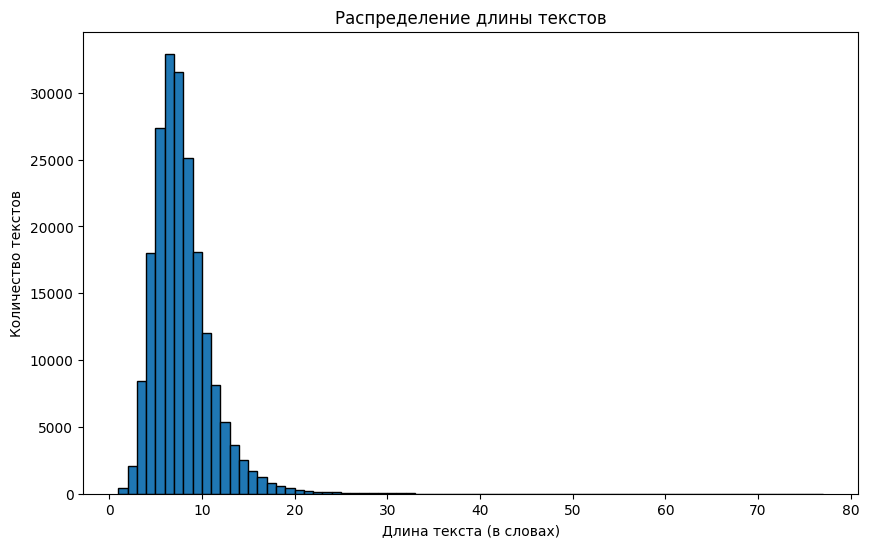

99%-–π –ø–æ—Ä–æ–≥ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞: 18.0 —Å–ª–æ–≤


In [36]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤
plt.figure(figsize=(10, 6))
plt.hist([len(desc.split()) for desc in descriptions], bins=range(1, maxSequenceLength + 1), edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤')
plt.xlabel('–î–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞ (–≤ —Å–ª–æ–≤–∞—Ö)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤')
plt.show()
print(f'99%-–π –ø–æ—Ä–æ–≥ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞: {np.percentile([len(desc.split()) for desc in descriptions], 99)} —Å–ª–æ–≤')

In [17]:
# –û–±—Ä–µ–∑–∫–∞ —Å—Ç—Ä–æ–∫ –¥–æ n —Å–ª–æ–≤
n = 20
descriptions_trimmed = []
for desc in descriptions:
    words = desc.split()
    # –ï—Å–ª–∏ –≤ —Å—Ç—Ä–æ–∫–µ –±–æ–ª—å—à–µ 63 —Å–ª–æ–≤, –æ–±—Ä–µ–∑–∞–µ–º –¥–æ 63 —Å–ª–æ–≤
    descriptions_trimmed.append(' '.join(words[:n]) if len(words) > n else desc)
descriptions = descriptions_trimmed.copy()
del descriptions_trimmed
descriptions = pd.Series(descriptions)

In [ ]:
pip install --upgrade numpy

In [ ]:
pip install tensorflow

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
max_words = 10000  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ
max_sequence_length = 50  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['title'])

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤
sequences = tokenizer.texts_to_sequences(df['title'])

# –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ category_code –≤ one-hot –≤–µ–∫—Ç–æ—Ä—ã
labels = to_categorical(df['category_code'])

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–æ–≤ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
data_padded.shape, labels.shape

((201970, 50), (201970, 228))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # –ò–∑–º–µ–Ω–µ–Ω–æ –∑–¥–µ—Å—å
model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(228, activation='softmax'))  # 228 - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.1)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
loss, accuracy = model.evaluate(X_test, y_test)
print("–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {:.2f}%".format(accuracy * 100))

Epoch 1/3
1137/1137 [==============================] - 2620s 2s/step - loss: 2.2952 - accuracy: 0.4537 - val_loss: 1.4375 - val_accuracy: 0.6075
Epoch 2/3
1137/1137 [==============================] - 2656s 2s/step - loss: 1.2388 - accuracy: 0.6478 - val_loss: 1.2346 - val_accuracy: 0.6539
Epoch 3/3
1263/1263 [==============================] - 291s 230ms/step - loss: 1.1496 - accuracy: 0.6689
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 66.89%


In [44]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
loss, accuracy = model.evaluate(X_test, y_test)
print("–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {:.2f}%".format(accuracy * 100))

1263/1263 [==============================] - 333s 263ms/step - loss: 1.1192 - accuracy: 0.6891
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 68.91%


In [29]:
df['theme'].value_counts() #–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–∂–¥–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme' –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∫–∞–∂–¥–æ–µ –∏–∑ –Ω–∏—Ö –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö

–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ—Ä–∫–∞ –∑–∏–º–Ω—è—è                 11916
–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤     9845
–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞                         8285
–°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ù–µ–ø—Ä–∏—è—Ç–Ω—ã–µ –∑–∞–ø–∞—Ö–∏                                     8185
–†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î                                           5981
                                                                         ...  
–†–µ–º–æ–Ω—Ç –∏ –ø–æ–º—ã–≤–∫–∞ –ø–∞–º—è—Ç–Ω–∏–∫–æ–≤                                                100
–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Ñ–æ–Ω—Ç–∞–Ω–æ–≤, —Ç–æ–Ω–Ω–µ–ª–µ–π, –º–æ—Å—Ç–æ–≤, –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ / –û—Å–≤–µ—â–µ–Ω–∏–µ               100
–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ

In [30]:
# –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–µ —Ç–µ–º—ã –≤ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–∏–æ–¥–∞—Ö –≤—Ä–µ–º–µ–Ω–∏, –∏—Å–ø–æ–ª—å–∑—É—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ –¥–ª–∏–Ω—ã –ø–µ—Ä–∏–æ–¥–æ–≤

total_counts = df['theme'].value_counts() #—Å–æ–¥–µ—Ä–∂–∏—Ç –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'theme'

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ –º–µ—Å—è—Ü–µ–≤ –∑–∞–¥–∞–Ω–Ω–æ–π –¥–ª–∏–Ω—ã
def get_month_period(start_month, length):
    return [(start_month + i - 1) % 12 + 1 for i in range(length)]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Å–ø–∏—Å–∫–∞ –º–µ—Å—è—Ü–µ–≤
def get_inverted_period(period):
    return [month % 12 + 1 for month in range(period[0] + len(period) - 1, period[0] + 11)]

def count_dominant_themes(df, months):
    df['is_in_period'] = df['date'].dt.month.isin(months)
    period_counts = df[df['is_in_period']]['theme'].value_counts()
    period_percentage = (period_counts / total_counts) * 100
    dominant_themes = period_percentage[period_percentage >= 95]
    return dominant_themes[dominant_themes.index.isin(total_counts[total_counts > 20].index)].index.tolist()

# –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –¥–ª–∏–Ω –ø–µ—Ä–∏–æ–¥–æ–≤
for length in range(1, 7):
    print(f"–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: {length} –º–µ—Å—è—Ü(–µ–≤)")

    # –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –Ω–∞—á–∞–ª—å–Ω—ã—Ö –º–µ—Å—è—Ü–µ–≤
    for start_month in range(1, 13):
        months = get_month_period(start_month, length)
        inverted_months = get_inverted_period(months)

        # –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏—Ö —Ç–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
        dominant_themes = count_dominant_themes(df, months)
        inverted_dominant_themes = count_dominant_themes(df, inverted_months)

        # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        print(f"{months} -> {len(dominant_themes)}")
        print(f"{' ' * (len(str(months)) + 4)}{len(inverted_dominant_themes)} <- {inverted_months}")

    print("---------------")

–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: 1 –º–µ—Å—è—Ü(–µ–≤)
[1] -> 0
       68 <- [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2] -> 0
       58 <- [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
[3] -> 0
       54 <- [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2]
[4] -> 0
       34 <- [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]
[5] -> 0
       36 <- [6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]
[6] -> 0
       28 <- [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
[7] -> 0
       18 <- [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
[8] -> 0
       16 <- [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]
[9] -> 0
       18 <- [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
[10] -> 0
        23 <- [11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[11] -> 0
        18 <- [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12] -> 0
        54 <- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
---------------
–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: 2 –º–µ—Å—è—Ü(–µ–≤)
[1, 2] -> 0
          32 <- [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 3] -> 0
          26 <- [4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
[3, 4] -> 0
          8 <- [5, 6, 7, 8, 9, 10, 11, 12, 1,

In [31]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø–µ—Ä–∏–æ–¥–æ–≤ –∏ –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º

def calculate_max_function(len1, len2):
    return len1 + len2 - abs(len1 - len2)

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
max_function_results = {}

# –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –¥–ª–∏–Ω –ø–µ—Ä–∏–æ–¥–æ–≤
for length in range(1, 12):
    # –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –Ω–∞—á–∞–ª—å–Ω—ã—Ö –º–µ—Å—è—Ü–µ–≤
    for start_month in range(1, 13):
        months = get_month_period(start_month, length)
        inverted_months = get_inverted_period(months)

        # –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏—Ö —Ç–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
        len1 = count_dominant_themes(df, months)
        len2 = count_dominant_themes(df, inverted_months)

        # –í—ã—á–∏—Å–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏–∏ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
        max_value = calculate_max_function(len1, len2)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ —Å–ª–æ–≤–∞—Ä–µ
        max_function_results[(tuple(months), tuple(inverted_months))] = max_value

# –ù–∞—Ö–æ–¥–∏–º –ø–µ—Ä–∏–æ–¥—ã —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏–∏
max_value = max(max_function_results.values())
max_periods = [period for period, value in max_function_results.items() if value == max_value]

# –í—ã–≤–æ–¥–∏–º –ø–µ—Ä–∏–æ–¥—ã –∏ –∏—Ö –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
max_periods, max_value

TypeError: ignored

In [32]:
import pandas as pd

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'data' –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã
# df['date2'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

months = [4, 5, 6, 7, 8, 9, 10]

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–µ—Ç–Ω–∏—Ö –º–µ—Å—è—Ü–µ–≤
df['period'] = df['date'].dt.month.isin(months)
# df['period'] = df['date'].dt.month.isin(get_inverted_period(months))

# –ü–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
total_counts = df['theme'].value_counts()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_counts = df[df['period']]['theme'].value_counts()

# –ü—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_percentage = (summer_counts / total_counts) * 100

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ç–µ–º, –≥–¥–µ –ø—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π >= 95%
summer_dominant_themes = summer_percentage[summer_percentage <= 10]
summer_dominant_themes = summer_dominant_themes[summer_dominant_themes.index.isin(total_counts[total_counts > 20].index)].index.tolist()

print(summer_dominant_themes)

['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–∞–¥–µ–Ω–∏–µ —Å–Ω–µ–≥–∞ –∏ —Å–æ—Å—É–ª–µ–∫', '–í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü–ª–∞–Ω–æ–≤–æ–µ —Ç–µ—Ö–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –ø—Ä–æ—Ñ–∏–ª–∞–∫—Ç–∏–∫–∞', '–í—ã–≤–æ–∑ –æ—Ç—Ö–æ–¥–æ–≤ –ú–ì–£', '–í—ã–Ω–æ—Å –∏ —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—è —Å–µ—Ç–µ–π –≥–∞–∑–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –Ω–∏–∑–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è', '–î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä—É–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è / –î–µ–º–æ–Ω—Ç–∞–∂ –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω–æ–≥–æ —Å–≤–µ—Ç–æ–≤–æ–≥–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è', '–î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä—É–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è / –î–µ–º–æ–Ω—Ç–∞–∂ –ª–∞–Ω–¥—à–∞—Ñ—Ç–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è', '–î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä—É–∂–Ω–æ–≥–æ –æ—Å–≤–µ—â–µ–Ω–∏—è / –†–µ–º–æ–Ω—Ç –∏–ª–ª—é–º–∏–Ω–∞—Ü–∏–∏ –∏ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω–æ–≥–æ —Å–≤–µ—Ç–æ–≤–æ–≥–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è', '–î–µ–º–æ–Ω—Ç–∞–∂,

In [35]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ –º–µ—Å—è—Ü–∞
df['month'] = df['date'].dt.month

month = 6
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–µ–º–µ –∏ –º–µ—Å—è—Ü—É
specific_theme = '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞'
june_records = df[(df['theme'] == specific_theme) & (df['month'] == month)]

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π
count = june_records.shape[0]

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–Ω–∏–π —Ç–µ–º—ã –≤ –∏—é–Ω–µ: {count}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–Ω–∏–π —Ç–µ–º—ã –≤ –∏—é–Ω–µ: 490


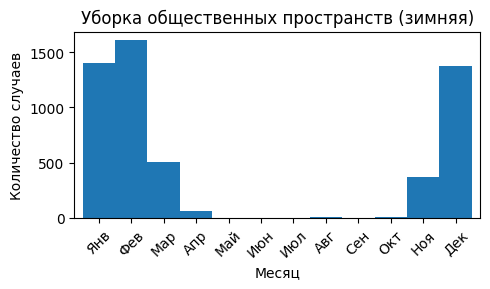

In [36]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ –∑–∞–¥–∞–Ω–Ω–æ–π —Ç–µ–º–µ
theme = '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–∑–∏–º–Ω—è—è)'
temp_df = df[df['theme'] == theme].copy()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –ø–æ –º–µ—Å—è—Ü–∞–º
df['month'] = df['date'].dt.month
monthly_counts = temp_df['month'].value_counts().sort_index()

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∏–Ω–¥–µ–∫—Å —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –º–µ—Å—è—Ü—ã
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(5, 3))
monthly_counts.plot(kind='bar', width=1) # –£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ —à–∏—Ä–∏–Ω—É –º–µ–Ω—å—à–µ, —á—Ç–æ–±—ã —Å—Ç–æ–ª–±—Ü—ã –Ω–µ —Å–ª–∏–ø–∞–ª–∏—Å—å
plt.title(theme)
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª—É—á–∞–µ–≤')
plt.xticks(ticks=range(12), labels=['–Ø–Ω–≤', '–§–µ–≤', '–ú–∞—Ä', '–ê–ø—Ä', '–ú–∞–π', '–ò—é–Ω', '–ò—é–ª', '–ê–≤–≥', '–°–µ–Ω', '–û–∫—Ç', '–ù–æ—è', '–î–µ–∫'], rotation=45)
plt.tight_layout() # –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –ª—É—á—à–µ —É–º–µ—Å—Ç–∏—Ç—å –ø–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π
plt.show()
del temp_df, monthly_counts

In [37]:
df

date      time  \
0      2021-07-25       NaN   
1      2021-08-05  17:49:38   
2      2021-10-12  04:17:26   
3      2022-04-12  14:32:59   
4      2022-03-17  20:38:10   
...           ...       ...   
201965 2021-11-19       NaN   
201966 2021-06-11  16:06:45   
201967 2022-09-01  09:32:32   
201968 2021-08-21       NaN   
201969 2020-11-30       NaN   

                                                    theme  \
0                                      –ù–µ–ª–µ–≥–∞–ª—å–Ω—ã–µ —Å–≤–∞–ª–∫–∏   
1       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –î–µ—Ç...   
2                   –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ù–µ–ø—Ä–∏—è—Ç–Ω—ã–µ –∑–∞–ø–∞—Ö–∏   
3       –†–µ–º–æ–Ω—Ç –¥–æ—Ä–æ–≥ / –ü–ª–æ—Ö–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–æ–∫—Ä—ã—Ç–∏—è –∏ —è–º–æ...   
4                   –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ù–µ–ø—Ä–∏—è—Ç–Ω—ã–µ –∑–∞–ø–∞—Ö–∏   
...                                                   ...   
201965  –¢–µ–ø–ª–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ (—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ –æ—Ç–æ–ø–ª–µ–Ω–∏–µ) / –ù–µ—Å–æ–æ...   
201966  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –î–µ—Ç...   
201967  –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
201968  –ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –ø–æ–¥—ä–µ–∑–¥–∞ –∏ –≤—Ö–æ...   
201969       –†–µ–º–æ–Ω—Ç –¥–æ—Ä–æ–≥ / –¢–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –º–∞–ª—ã–º–∏ –∫–∞—Ä—Ç–∞–º–∏   

                                                    title  \
0       –ø–∞—Ä–∫ –ø–æ–π–º–∞ —Ä–µ–∫–∞ –ª–µ—Å–Ω–æ–π –º–∞—Å—Å–∏–≤ –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å –º–∞—Å—Å–∏...   
1       –∫—Ä–∏—Ç–∏–∫–∞ –∞–¥—Ä–µ—Å —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –≥–±—É –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Ä–∞...   
2        –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∫–∞—á–µ—Å—Ç–≤–æ –≤–æ–∑–¥—É—Ö —Ä–∞–π–æ–Ω —É–ª–∏—Ü–∞   
3           —Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è —Ä–µ–º–æ–Ω—Ç –∞—Å—Ñ–∞–ª—å—Ç–æ–≤—ã–π –ø–æ–∫—Ä—ã—Ç–∏–µ —É–ª–∏—Ü–∞   
4       –µ–≤–≥–µ–Ω–∏–π –Ω–∞–ø—Ä–∞–≤–∏—Ç—å –∑–∞–ø—Ä–æ—Å –ø—Ä–æ–∫—É—Ä–∞—Ç—É—Ä–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ ...   
...                                                   ...   
201965  –∂–∏—Ç–µ–ª—å –ø—Ä–æ–∂–∏–≤–∞—Ç—å –∞–¥—Ä–µ—Å –¥–æ–º –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å—Å—è –ø–µ—Ä–µ–±–æ...   
201966  –∂–∏—Ç–µ–ª—å —Ä–∞–π–æ–Ω –ø—Ä–æ—Å–∏—Ç—å –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –Ω–æ–≤—ã–π –¥–µ—Ç—Å–∫–∏–π –ø...   
201967  –∂–∞–ª–æ–±–∞ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π —É—Ö–æ–¥ –∑–µ–ª—ë–Ω—ã–π –Ω–∞—Å–∞–∂...   
201968  –∂–∏—Ç–µ–ª—å –Ω–µ–¥–æ–≤–æ–ª—å–Ω—ã–π –∫–∞—á–µ—Å—Ç–≤–æ –∫–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç...   
201969             –º–∞–ª—ã–π –≥–æ–¥ —Ç—Ä–µ—Ç–∏–π –ø–µ—Ä–µ–∫–ª–∞–¥—ã–≤–∞—Ç—å –∞—Å—Ñ–∞–ª—å—Ç   

                                                     post  \
0       –Ω–∞—à –ø–æ–¥–ø–∏—Å—á–∏–∫ –ø–∏—Å–∞—Ç—å –≥—Ä–∞–Ω–∏—Ü–∞ –ø–∞—Ä–∫ –ø–æ–π–º–∞ —Ä–µ–∫–∞ –ø...   
1       –¥–∏—Ä–µ–∫—Ç–æ—Ä –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Ä–∞–π–æ–Ω –ø–µ—Ä–µ–ª–æ–∂–∏—Ç—å –æ—Ç–≤–µ—Ç—Å—Ç...   
2       –Ω–∞—Ç–∞–ª—å—è —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–π –Ω–∞–ø–∏—Å–∞—Ç—å —ç—Ç–æ —É–∂–∞—Å —É–ª–∏—Ü...   
3       –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –ø—Ä–æ–≤–∞–ª —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –ø–æ–∫–∞ —Å–≤–æ–π –∫–æ–ª–µ—Å–æ...   
4       —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Å–≤–æ–π –æ–±—Ä–∞—â–µ–Ω–∏–µ –Ω–µ—Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–π –∂–∏—Ç–µ–ª—å...   
...                                                   ...   
201965  –¥–æ–±—ã–π –≤–µ—á–µ—Ä –≤–µ—Å—å —É—á–∞—Å—Ç–Ω–∏–∫ —Ä–µ–Ω–æ–≤–∞—Ü–∏—è –Ω–æ–≤–æ—Å—Ç—Ä–æ–π–∫...   
201966  –ø—Ä–æ—Å–∏—Ç—å –ø–æ–º–æ—á—å –≤–µ—Ä–Ω—É—Ç—å –¥–µ—Ç—Å–∫–∏–π –ø–ª–æ—â–∞–¥–∫–∞ –Ω–∞–∑–∞–¥ ...   
201967  –∞–∫—Ç–∏–≤–∏—Å—Ç –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ –Ω–∞—à —É–ª–∏—Ü–∞ –Ω–∞—à ...   
201968  —Ñ–æ—Ç–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ª–µ—Å—Ç–Ω–∏—Ü–∞ —Ç–µ–∫—É—â–∏–π –º–æ–º–µ–Ω—Ç —Å—Ç–∞—Ç—å –ø...   
201969  –º–∞–ª—ã–π –≥–æ–¥ —Ç—Ä–µ—Ç–∏–π –ø–µ—Ä–µ–∫–ª–∞–¥—ã–≤–∞—Ç—å –∞—Å—Ñ–∞–ª—å—Ç –ø–æ–Ω–∏–º–∞—Ç...   

                                           title_original  \
0        –ù–∞–≥—Ä–∞–Ω–∏—Ü–µ –ø–∞—Ä–∫–∞ –≤ –ø–æ–π–º–µ —Ä–µ–∫–∏ –ì–æ—Ä–æ–¥–Ω–∏ –≤ –ª–µ—Å–Ω–æ–º...   
1       –ö—Ä–∏—Ç–∏–∫–∞ –≤ –∞–¥—Ä–µ—Å —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—è –ì–ë–£ "–ñ–∏–ª–∏—â–Ω–∏–∫" —Ä–∞...   
2        –ñ–∞–ª–æ–±–∞ 

In [52]:
!pip install tensorflow

In [ ]:
!pip install keras==2.3.1

In [54]:
from keras.utils import to_categorical

Epoch 1/15
1136/1137 [============================>.] - ETA: 0s - loss: 3.1189 - accuracy: 0.2986
Epoch 1: val_accuracy improved from -inf to 0.51912, saving model to models/GRU/model.h5
1137/1137 [==============================] - 224s 180ms/step - loss: 3.1188 - accuracy: 0.2987 - val_loss: 1.9432 - val_accuracy: 0.5191
Epoch 2/15
   1/1137 [..............................] - ETA: 2:23 - loss: 2.4400 - accuracy: 0.4531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


1137/1137 [==============================] - ETA: 0s - loss: 1.8838 - accuracy: 0.5266
Epoch 2: val_accuracy improved from 0.51912 to 0.59611, saving model to models/GRU/model.h5
1137/1137 [==============================] - 213s 188ms/step - loss: 1.8838 - accuracy: 0.5266 - val_loss: 1.5516 - val_accuracy: 0.5961
Epoch 3/15
1136/1137 [============================>.] - ETA: 0s - loss: 1.6336 - accuracy: 0.5712
Epoch 3: val_accuracy improved from 0.59611 to 0.62334, saving model to models/GRU/model.h5
1137/1137 [==============================] - 189s 167ms/step - loss: 1.6335 - accuracy: 0.5713 - val_loss: 1.4203 - val_accuracy: 0.6233
Epoch 4/15
1137/1137 [==============================] - ETA: 0s - loss: 1.4882 - accuracy: 0.6006
Epoch 4: val_accuracy improved from 0.62334 to 0.63473, saving model to models/GRU/model.h5
1137/1137 [==============================] - 187s 164ms/step - loss: 1.4882 - accuracy: 0.6006 - val_loss: 1.3564 - val_accuracy: 0.6347
Epoch 5/15
1136/1137 [========

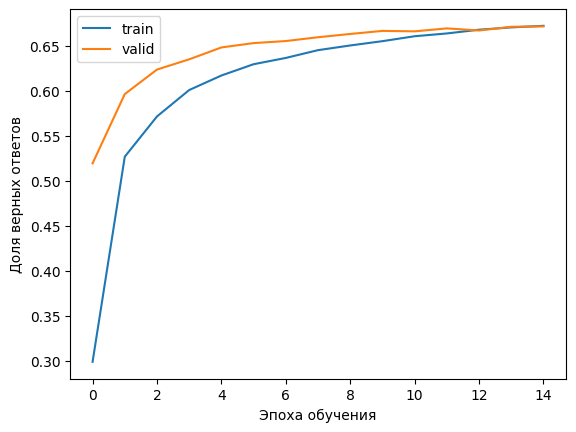

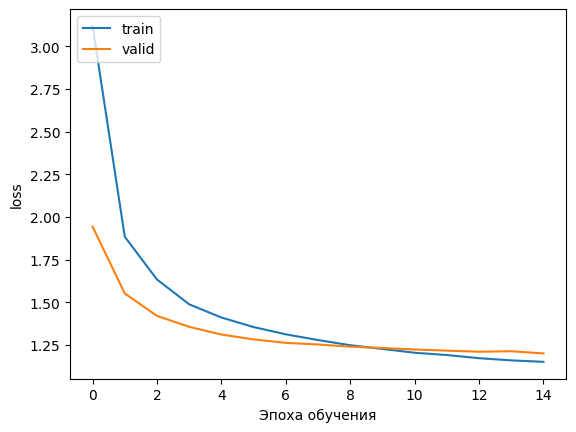

In [56]:
import pandas as pd
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GRU
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
x_train, x_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# –°–µ—Ç—å GRU ######################################################
model = Sequential()
num_words = 10000
max_sequence_length = 50
nb_classes = 228
model.add(Embedding(num_words, 64, input_length=max_sequence_length))
model.add(Dropout(0.5))
model.add(GRU(128))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_save_path = 'models/GRU/model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

print()
print("–û—Ü–µ–Ω–∫–∞ —Ç–µ—Å—Ç–∞: {}".format(score[0]))
print("–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: {}".format(score[1]))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'valid'], loc='upper left')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–î–æ–ª—è –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤')
plt.show()

# –ì—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [60]:
history = model.fit(x_train,
                    y_train,
                    epochs=7,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

print()
print("–û—Ü–µ–Ω–∫–∞ —Ç–µ—Å—Ç–∞: {}".format(score[0]))
print("–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: {}".format(score[1]))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'valid'], loc='upper left')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–î–æ–ª—è –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤')
plt.show()

# –ì—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Epoch 1/7
1137/1137 [==============================] - ETA: 0s - loss: 1.1367 - accuracy: 0.6761
Epoch 1: val_accuracy improved from 0.67125 to 0.67397, saving model to models/GRU/model.h5
1137/1137 [==============================] - 223s 196ms/step - loss: 1.1367 - accuracy: 0.6761 - val_loss: 1.2010 - val_accuracy: 0.6740
Epoch 2/7
   1/1137 [..............................] - ETA: 2:38 - loss: 1.0509 - accuracy: 0.7031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


1137/1137 [==============================] - ETA: 0s - loss: 1.1281 - accuracy: 0.6776
Epoch 2: val_accuracy did not improve from 0.67397
1137/1137 [==============================] - 215s 189ms/step - loss: 1.1281 - accuracy: 0.6776 - val_loss: 1.1957 - val_accuracy: 0.6727
Epoch 3/7
 759/1137 [===================>..........] - ETA: 1:03 - loss: 1.1097 - accuracy: 0.6816

KeyboardInterrupt: ignored

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


# –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä ##############################
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
               ])
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(X_test[0])
print(y_test[0])
print(y_pred[0])

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

NameError: ignored

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä ##############################
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
               ])
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(X_test[0])
print(y_test[0])
print(y_pred[0])

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # –ò–∑–º–µ–Ω–µ–Ω–æ –∑–¥–µ—Å—å
model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(227, activation='softmax'))  # 227 - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.fit(X_train, y_train, batch_size=128, epochs=2, validation_split=0.1)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
loss, accuracy = model.evaluate(X_test, y_test)
print("–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {:.2f}%".format(accuracy * 100))

Epoch 1/2


1153/1153 [==============================] - 2622s 2s/step - loss: 1.9864 - accuracy: 0.5282 - val_loss: 1.2164 - val_accuracy: 0.6685
Epoch 2/2
1282/1282 [==============================] - 148s 115ms/step - loss: 1.0373 - accuracy: 0.7059
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 70.59%


In [ ]:
total_counts = df['theme'].value_counts()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ –º–µ—Å—è—Ü–µ–≤ –∑–∞–¥–∞–Ω–Ω–æ–π –¥–ª–∏–Ω—ã
def get_month_period(start_month, length):
    return [(start_month + i - 1) % 12 + 1 for i in range(length)]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Å–ø–∏—Å–∫–∞ –º–µ—Å—è—Ü–µ–≤
def get_inverted_period(period):
    return [month % 12 + 1 for month in range(period[0] + len(period) - 1, period[0] + 11)]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏—Ö —Ç–µ–º
# def count_dominant_themes(df, months):
#     df['is_in_period'] = df['date'].dt.month.isin(months)
#     period_counts = df[df['is_in_period']]['theme'].value_counts()
#     period_percentage = (period_counts / total_counts) * 100
#     return period_percentage[period_percentage >= 95].index.tolist()

def count_dominant_themes(df, months):
    df['is_in_period'] = df['date'].dt.month.isin(months)
    period_counts = df[df['is_in_period']]['theme'].value_counts()
    period_percentage = (period_counts / total_counts) * 100
    dominant_themes = period_percentage[period_percentage >= 95]
    return dominant_themes[dominant_themes.index.isin(total_counts[total_counts > 20].index)].index.tolist()

# –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –¥–ª–∏–Ω –ø–µ—Ä–∏–æ–¥–æ–≤
for length in range(1, 7):
    print(f"–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: {length} –º–µ—Å—è—Ü(–µ–≤)")

    # –ü–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö –≤–æ–∑–º–æ–∂–Ω—ã—Ö –Ω–∞—á–∞–ª—å–Ω—ã—Ö –º–µ—Å—è—Ü–µ–≤
    for start_month in range(1, 13):
        months = get_month_period(start_month, length)
        inverted_months = get_inverted_period(months)

        # –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏—Ö —Ç–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞
        dominant_themes = count_dominant_themes(df, months)
        inverted_dominant_themes = count_dominant_themes(df, inverted_months)

        # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        print(f"{months} -> {len(dominant_themes)}")
        print(f"{' ' * (len(str(months)) + 4)}{len(inverted_dominant_themes)} <- {inverted_months}")

    print("---------------")

–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: 1 –º–µ—Å—è—Ü(–µ–≤)
[1] -> 0
       89 <- [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2] -> 0
       73 <- [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
[3] -> 0
       75 <- [4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2]
[4] -> 0
       47 <- [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3]
[5] -> 0
       54 <- [6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]
[6] -> 0
       39 <- [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
[7] -> 0
       38 <- [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
[8] -> 0
       46 <- [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]
[9] -> 0
       56 <- [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
[10] -> 0
        59 <- [11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[11] -> 0
        45 <- [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12] -> 0
        70 <- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
---------------
–î–ª–∏–Ω–∞ –ø–µ—Ä–∏–æ–¥–∞: 2 –º–µ—Å—è—Ü(–µ–≤)
[1, 2] -> 0
          40 <- [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 3] -> 0
          34 <- [4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
[3, 4] -> 0
          21 <- [5, 6, 7, 8, 9, 10, 11, 12, 1

In [ ]:
df

date      time  \
0      2021-04-22  14:41:09   
1      2023-07-08  21:29:54   
2      2021-10-01  09:08:31   
3      2023-01-30  14:55:57   
4      2023-07-19  18:17:30   
...           ...       ...   
204956        NaT       NaN   
204957 2021-05-23  19:18:42   
204958 2020-10-12       NaN   
204959 2021-07-15       NaN   
204960 2023-01-24  16:55:19   

                                                    theme  \
0       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
1       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ  –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –í–Ω...   
2       –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
3       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
4       –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
...                                                   ...   
204956                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
204957                              –ö–æ–Ω—Ç–µ–π–Ω–µ—Ä–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏   
204958  –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
204959       –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ—Ä—ã–≤ —Å–∏—Å—Ç–µ–º –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è   
204960                   –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞   

                                                    title  \
0       –ø—Ä–æ—Å—å–±–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–≤–µ—Ç–æ–≤–æ...   
1       –∂–∏—Ç–µ–ª—å –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π ...   
2       –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ —Ç—Ä–æ—Ç—É–∞—Ä...   
3       –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ç–≤–∞–ª–∏—Ç—å—Å—è —à—Ç—É–∫–∞—Ç—É—Ä–∫–∞ —Ñ–∞—Å–∞–¥ –¥...   
4       –∂–∏—Ç–µ–ª—å –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å—Å—è –Ω–∞—á–∞—Ç—å –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–≤–æ—Ä —É...   
...                                                   ...   
204956  –∂–∞–ª–æ–±–∞ –∑–µ–º–µ–ª—å–Ω—ã–π —Ä–∞–±–æ—Ç–∞ —É–ª–∏—Ü–∞ –¥–æ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–∞...   
204957  –≤–º–µ—Å—Ç–æ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –ø–ª–æ—â–∞–¥–∫–∞ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∫—Ä—ã—Ç –∫–æ...   
204958  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —É–ª–∏—Ü–∞ —É–ª–∏—Ü–∞ —Å–ª–æ–º–∞—Ç—å –∫–ª—É–º–±–∞ –∂–∏–ª–∏—â–Ω–∏...   
204959            –ø—Ä–æ—Ä—ã–≤ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏—è –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ —É–ª–∏—Ü–∞   
204960            —Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è –ø–≥–º –æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç—Ä–æ—Ç—É–∞—Ä —à–∫–æ–ª–∞   

                                                     post  \
0       –Ω–∞—Ä–æ–¥ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≥–æ—Ä–æ–¥ –ø—Ä–∏—Å–æ–µ–¥–∏–Ω—è—Ç—å—Å—è –∑–∞—è–≤–∫–∞ —á...   
1                                     –Ω–æ–≤—ã–π —Ç—Ä–æ—Ç—É–∞—Ä —É–ª–∏—Ü–∞   
2       –∏–∑–≤–∏–Ω–∏—Ç—å –ø—Ä–∏—Å—ã–ª–∞—Ç—å —Ñ–æ—Ç–æ –Ω–æ–≤—ã–π –∑–∞—É–∑–∏—Ç—å –¥–æ—Ä–æ–≥–∞ –ø...   
3       –ø—Ä–æ–∏–∑–æ–π—Ç–∏ —Ñ–∞—Å–∞–¥ —Ç–∞–∫–æ–π –≤–∏–¥ –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å –æ–±—Ä–∞—Ç–∏—Ç...   
4       –ø—Ä–æ—Å–∏—Ç—å —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –¥–≤–æ—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–æ–ª–∂–Ω—ã–π –Ω–∞...   
...                                                   ...   
204956  —Ä–∞—Å–∫–æ–ø–∫–∞ –¥–æ–º –ø–µ—Ä–µ–∫—Ä—ã—Ç—å –ø—Ä–æ—Ö–æ–¥ —Å–∫–æ–ª—å–∫–æ –∏–∑–¥–µ–≤–∞—Ç—å...   
204957  –≤–º–µ—Å—Ç–æ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –ø–ª–æ—â–∞–¥–∫–∞ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –æ–≥—Ä–æ–º–Ω—ã–π ...   
204958  –æ—Ç—Ä–µ–º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –º–∞—Å—Ç–µ—Ä —Å—Ä–µ–¥–Ω–∏–π –∫–ª—É–º–±–∞ —Å–æ–±—Ä–∞—Ç—å ...   
204959                      –ø–∏—Å–∞—Ç—å –¥–æ–º –ø—Ä–æ—Ä–≤–∞—Ç—å —Ç–µ—á—å –≤–æ–¥–∞   
204960  —Ç–∞—Ç—å—è–Ω–∞ –ø–∏—Å–∞—Ç—å —á—É–¥–µ—Å–Ω—ã–π –¥–æ—Ä–æ–∂–∫–∞ —à–∫–æ–ª—å–Ω–∏–∫ —à–∫–æ–ª–∞...   

                                           title_original  \
0       –ü—Ä–æ—Å—å–±–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–≤–µ—Ç–æ–≤–æ...   
1       –ñ–∏—Ç–µ–ª–∏ –æ–±—Ä–∞—â–∞—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω...   
2       –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –∫–∞—á–µ—Å—Ç–

In [ ]:
import pandas as pd

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'data' –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã
# df['date2'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

months = [4, 5, 6, 7, 8, 9, 10]

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–µ—Ç–Ω–∏—Ö –º–µ—Å—è—Ü–µ–≤
df['period'] = df['date'].dt.month.isin(months)
# df['period'] = df['date'].dt.month.isin(get_inverted_period(months))

# –ü–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
total_counts = df['theme'].value_counts()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_counts = df[df['period']]['theme'].value_counts()

# –ü—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_percentage = (summer_counts / total_counts) * 100

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ç–µ–º, –≥–¥–µ –ø—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π >= 95%
summer_dominant_themes = summer_percentage[summer_percentage <= 10]
summer_dominant_themes = summer_dominant_themes[summer_dominant_themes.index.isin(total_counts[total_counts > 20].index)].index.tolist()

print(summer_dominant_themes)

['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–∞–¥–µ–Ω–∏–µ —Å–Ω–µ–≥–∞ –∏ —Å–æ—Å—É–ª–µ–∫', '–°–Ω–µ–≥ –∏ —Å–Ω–µ–≥–æ—Å–ø–ª–∞–≤–Ω—ã–µ –ø—É–Ω–∫—Ç—ã', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —É–±–æ—Ä–∫–∞ –∫—Ä–æ–≤–ª–∏', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ—Ä–∫–∞ –∑–∏–º–Ω—è—è', '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–ü–ì–ú)', '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–∑–∏–º–Ω—è—è)']


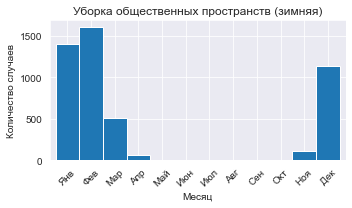

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ –∑–∞–¥–∞–Ω–Ω–æ–π —Ç–µ–º–µ
theme = '–£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–∑–∏–º–Ω—è—è)'
temp_df = df[df['theme'] == theme].copy()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –ø–æ –º–µ—Å—è—Ü–∞–º
df['month'] = df['date'].dt.month
monthly_counts = temp_df['month'].value_counts().sort_index()

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∏–Ω–¥–µ–∫—Å —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –º–µ—Å—è—Ü—ã
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(5, 3))
monthly_counts.plot(kind='bar', width=1) # –£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ —à–∏—Ä–∏–Ω—É –º–µ–Ω—å—à–µ, —á—Ç–æ–±—ã —Å—Ç–æ–ª–±—Ü—ã –Ω–µ —Å–ª–∏–ø–∞–ª–∏—Å—å
plt.title(theme)
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª—É—á–∞–µ–≤')
plt.xticks(ticks=range(12), labels=['–Ø–Ω–≤', '–§–µ–≤', '–ú–∞—Ä', '–ê–ø—Ä', '–ú–∞–π', '–ò—é–Ω', '–ò—é–ª', '–ê–≤–≥', '–°–µ–Ω', '–û–∫—Ç', '–ù–æ—è', '–î–µ–∫'], rotation=45)
plt.tight_layout() # –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –ª—É—á—à–µ —É–º–µ—Å—Ç–∏—Ç—å –ø–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π
plt.show()
del temp_df, monthly_counts

In [ ]:
import pandas as pd

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'data' –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã
df['date2'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–µ—Ç–Ω–∏—Ö –º–µ—Å—è—Ü–µ–≤
df['is_summer'] = df['date2'].dt.month.isin([4, 5, 6, 7, 8, 9])
# df['is_summer'] = df['date2'].dt.month.isin([1, 2, 3, 10, 11, 12])

# –ü–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
total_counts = df['theme'].value_counts()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_counts = df[df['is_summer']]['theme'].value_counts()

# –ü—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∑–∞–ø–∏—Å–µ–π –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
summer_percentage = (summer_counts / total_counts) * 100

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ç–µ–º, –≥–¥–µ –ø—Ä–æ—Ü–µ–Ω—Ç –ª–µ—Ç–Ω–∏—Ö –∑–∞–ø–∏—Å–µ–π >= 90%
summer_dominant_themes = summer_percentage[summer_percentage >= 90].index.tolist()

print(summer_dominant_themes)

['–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ', '–ü–æ–ª–∏—Ç–∏—á–µ—Å–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è / –í—ã–±–æ—Ä—ã', '–ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–¥–∞—Ä –º–æ–ª–Ω–∏–µ–π', '–†–∞—Å—Ç–µ–Ω–∏—è / –ë–æ—Ä—â–µ–≤–∏–∫', '–†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è', '–†–∞—Å—Ç–µ–Ω–∏—è / –ö—Ä–∞—Å–Ω–æ–∫–Ω–∏–∂–Ω—ã–µ —Ä–∞—Å—Ç–µ–Ω–∏—è', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–∞']


In [ ]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ –º–µ—Å—è—Ü–∞
df['month'] = df['date'].dt.month

month = 6
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ —Ç–µ–º–µ –∏ –º–µ—Å—è—Ü—É
specific_theme = '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞'
june_records = df[(df['theme'] == specific_theme) & (df['month'] == month)]

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π
count = june_records.shape[0]

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–Ω–∏–π —Ç–µ–º—ã –≤ –∏—é–Ω–µ: {count}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Å—Ç—Ä–µ—á–∞–Ω–∏–π —Ç–µ–º—ã –≤ –∏—é–Ω–µ: 490


In [ ]:
df

date      time  \
0      2021-04-22  14:41:09   
1      2023-07-08  21:29:54   
2      2021-10-01  09:08:31   
3      2023-01-30  14:55:57   
4      2023-07-19  18:17:30   
...           ...       ...   
204956        NaT       NaN   
204957 2021-05-23  19:18:42   
204958 2020-10-12       NaN   
204959 2021-07-15       NaN   
204960 2023-01-24  16:55:19   

                                                    theme  \
0       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
1       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ  –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –í–Ω...   
2       –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
3       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
4       –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
...                                                   ...   
204956                        –°–æ–ø—Ä—è–∂–µ–Ω–Ω—ã–µ –∑–µ–º–ª—è–Ω—ã–µ —Ä–∞–±–æ—Ç—ã   
204957                              –ö–æ–Ω—Ç–µ–π–Ω–µ—Ä–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏   
204958  –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
204959       –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ—Ä—ã–≤ —Å–∏—Å—Ç–µ–º –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è   
204960                   –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –ü–ì–ú-–æ–±—Ä–∞–±–æ—Ç–∫–∞   

                                                    title  \
0       –ø—Ä–æ—Å—å–±–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–≤–µ—Ç–æ–≤–æ...   
1       –∂–∏—Ç–µ–ª—å –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π ...   
2       –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ —Ç—Ä–æ—Ç—É–∞—Ä...   
3       –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ç–≤–∞–ª–∏—Ç—å—Å—è —à—Ç—É–∫–∞—Ç—É—Ä–∫–∞ —Ñ–∞—Å–∞–¥ –¥...   
4       –∂–∏—Ç–µ–ª—å –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å—Å—è –Ω–∞—á–∞—Ç—å –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–≤–æ—Ä —É...   
...                                                   ...   
204956  –∂–∞–ª–æ–±–∞ –∑–µ–º–µ–ª—å–Ω—ã–π —Ä–∞–±–æ—Ç–∞ —É–ª–∏—Ü–∞ –¥–æ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–∞...   
204957  –≤–º–µ—Å—Ç–æ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –ø–ª–æ—â–∞–¥–∫–∞ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ç–∫—Ä—ã—Ç –∫–æ...   
204958  –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —É–ª–∏—Ü–∞ —É–ª–∏—Ü–∞ —Å–ª–æ–º–∞—Ç—å –∫–ª—É–º–±–∞ –∂–∏–ª–∏—â–Ω–∏...   
204959            –ø—Ä–æ—Ä—ã–≤ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏—è –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ —É–ª–∏—Ü–∞   
204960            —Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è –ø–≥–º –æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç—Ä–æ—Ç—É–∞—Ä —à–∫–æ–ª–∞   

                                                     post  \
0       –Ω–∞—Ä–æ–¥ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –≥–æ—Ä–æ–¥ –ø—Ä–∏—Å–æ–µ–¥–∏–Ω—è—Ç—å—Å—è –∑–∞—è–≤–∫–∞ —á...   
1                                     –Ω–æ–≤—ã–π —Ç—Ä–æ—Ç—É–∞—Ä —É–ª–∏—Ü–∞   
2       –∏–∑–≤–∏–Ω–∏—Ç—å –ø—Ä–∏—Å—ã–ª–∞—Ç—å —Ñ–æ—Ç–æ –Ω–æ–≤—ã–π –∑–∞—É–∑–∏—Ç—å –¥–æ—Ä–æ–≥–∞ –ø...   
3       –ø—Ä–æ–∏–∑–æ–π—Ç–∏ —Ñ–∞—Å–∞–¥ —Ç–∞–∫–æ–π –≤–∏–¥ –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å –æ–±—Ä–∞—Ç–∏—Ç...   
4       –ø—Ä–æ—Å–∏—Ç—å —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –¥–≤–æ—Ä –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–æ–ª–∂–Ω—ã–π –Ω–∞...   
...                                                   ...   
204956  —Ä–∞—Å–∫–æ–ø–∫–∞ –¥–æ–º –ø–µ—Ä–µ–∫—Ä—ã—Ç—å –ø—Ä–æ—Ö–æ–¥ —Å–∫–æ–ª—å–∫–æ –∏–∑–¥–µ–≤–∞—Ç—å...   
204957  –≤–º–µ—Å—Ç–æ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –ø–ª–æ—â–∞–¥–∫–∞ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –æ–≥—Ä–æ–º–Ω—ã–π ...   
204958  –æ—Ç—Ä–µ–º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –º–∞—Å—Ç–µ—Ä —Å—Ä–µ–¥–Ω–∏–π –∫–ª—É–º–±–∞ —Å–æ–±—Ä–∞—Ç—å ...   
204959                      –ø–∏—Å–∞—Ç—å –¥–æ–º –ø—Ä–æ—Ä–≤–∞—Ç—å —Ç–µ—á—å –≤–æ–¥–∞   
204960  —Ç–∞—Ç—å—è–Ω–∞ –ø–∏—Å–∞—Ç—å —á—É–¥–µ—Å–Ω—ã–π –¥–æ—Ä–æ–∂–∫–∞ —à–∫–æ–ª—å–Ω–∏–∫ —à–∫–æ–ª–∞...   

                                           title_original  \
0       –ü—Ä–æ—Å—å–±–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–≤–µ—Ç–æ–≤–æ...   
1       –ñ–∏—Ç–µ–ª–∏ –æ–±—Ä–∞—â–∞—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω...   
2       –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –∫–∞—á–µ—Å—Ç–

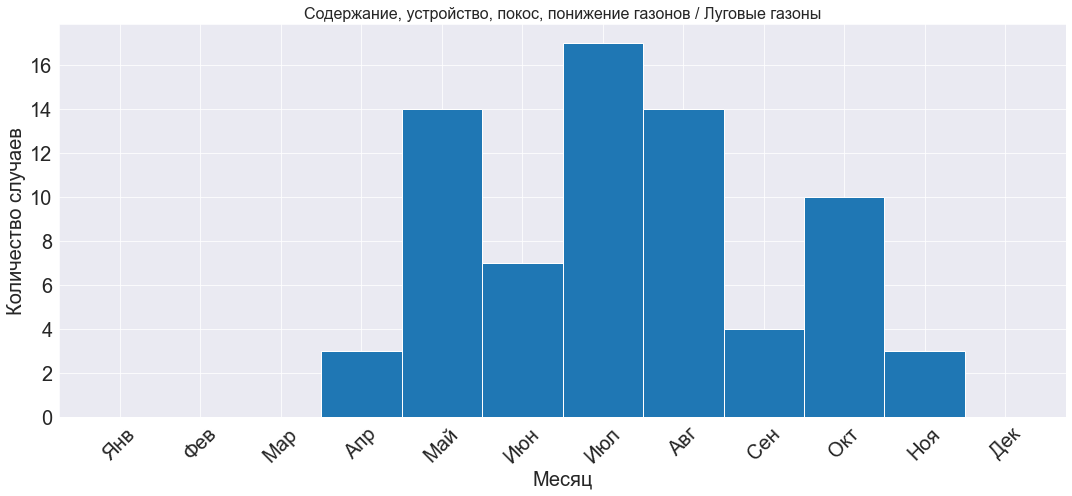

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ –∑–∞–¥–∞–Ω–Ω–æ–π —Ç–µ–º–µ
theme = '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –õ—É–≥–æ–≤—ã–µ –≥–∞–∑–æ–Ω—ã'
temp_df = df[df['theme'] == theme].copy()

# –ü–æ–¥—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–ø–∏—Å–µ–π –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_counts = temp_df['month'].value_counts().sort_index()

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∏–Ω–¥–µ–∫—Å —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –º–µ—Å—è—Ü—ã
monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(15, 7))
monthly_counts.plot(kind='bar', width=1) # –£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ —à–∏—Ä–∏–Ω—É –º–µ–Ω—å—à–µ, —á—Ç–æ–±—ã —Å—Ç–æ–ª–±—Ü—ã –Ω–µ —Å–ª–∏–ø–∞–ª–∏—Å—å
plt.title(theme, fontsize=16) # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('–ú–µ—Å—è—Ü', fontsize=20) # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –ø–æ–¥–ø–∏—Å–∏ –æ—Å–∏ X
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª—É—á–∞–µ–≤', fontsize=20) # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –ø–æ–¥–ø–∏—Å–∏ –æ—Å–∏ Y
plt.xticks(ticks=range(12), labels=['–Ø–Ω–≤', '–§–µ–≤', '–ú–∞—Ä', '–ê–ø—Ä', '–ú–∞–π', '–ò—é–Ω', '–ò—é–ª', '–ê–≤–≥', '–°–µ–Ω', '–û–∫—Ç', '–ù–æ—è', '–î–µ–∫'], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout() # –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –ª—É—á—à–µ —É–º–µ—Å—Ç–∏—Ç—å –ø–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π
plt.show()
del temp_df, monthly_counts

In [ ]:
df

date      time  \
0      2023-07-17  10:26:28   
1      2021-09-08       NaN   
2      2022-01-11       NaN   
3      2022-11-19  00:15:05   
4      2022-12-13  11:20:26   
...           ...       ...   
204956 2020-10-11       NaN   
204957 2021-02-24  21:01:43   
204958        NaT       NaN   
204959 2022-06-26  14:20:35   
204960 2022-05-27  17:48:54   

                                                    theme  \
0       –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
1                          –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ö—Ä—É–ø–Ω—ã–µ –î–¢–ü   
2                –£–±–æ—Ä–∫–∞ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ (–∑–∏–º–Ω—è—è)   
3                    –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –û–û–ü–¢: –æ–±—â–µ–µ –∏ –ø—Ä–æ—á–µ–µ   
4                      –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)   
...                                                   ...   
204956  –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∑–∞–≥—Ä—è–∑–Ω–µ–Ω–∏—è –≤–æ–∑...   
204957  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ...   
204958         –ü–ª–∞—Ç–µ–∂–∏, –≤–∑–Ω–æ—Å—ã –∏ —Å—É–±—Å–∏–¥–∏–∏ / –ü—Ä–∏–±–æ—Ä—ã —É—á–µ—Ç–∞   
204959                    –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
204960  –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∑–∞–≥—Ä—è–∑–Ω–µ–Ω–∏—è –≤–æ–∑...   

                                                    title  \
0       –∂–∞–ª–æ–±–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —É—Ö–æ–¥ –≤—ã—Ä—É–±–∫–∞ –∑–µ–ª—ë–Ω—ã–π –Ω–∞—Å–∞–∂–¥–µ...   
1                   —à–æ—Å—Å–µ –≥—Ä—É–∑–æ–≤–∏–∫ –ø–æ–ø–∞—Å—Ç—å –¥—Ç–ø –∑–∞–≥–æ—Ä–µ—Ç—å—Å—è   
2       –∂–∏—Ç–µ–ª—å –Ω–µ–≥–æ–¥–æ–≤–∞—Ç—å —Å–≤—è–∑—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —É–±–æ—Ä–∫–∞ —Å–Ω–µ–≥...   
3       –¥–µ–ø—É—Ç–∞—Ç –¥–µ–ø—É—Ç–∞—Ç –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω—ã–π –æ–∫—Ä—É–≥ –≥–æ—Ä–æ–¥ —Å–æ–æ–±...   
4                                              –≤–∏–¥–µ–æ—Ä–æ–ª–∏–∫   
...                                                   ...   
204956  –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞—Ç—å –ø–æ–∫–∞–∑–∞–Ω–∏–µ –¥–∞—Ç—á–∏–∫ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π ...   
204957             –∂–∞–ª–æ–±–∞ –Ω–µ—É–±—Ä–∞–Ω–Ω—ã–π –∫—É—á–∞ —Å–Ω–µ–≥ –¥–æ–º –ø—Ä–æ–µ–∑–¥   
204958  –∂–∏—Ç–µ–ª—å –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å—Å—è –∫–æ–º–ø–∞–Ω–∏—è —Å–≤—è–∑—å –∑–∞—Ç—è–Ω—É—Ç—å—Å—è ...   
204959  –∫—Ä–∏—Ç–∏–∫–∞ –∞–¥—Ä–µ—Å –≥–±—É –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Ä–∞–π–æ–Ω –ø–æ–≤–æ–¥ —Ä–∞–∑...   
204960  –∞–ª–µ–∫—Å–µ–π –ø–æ—Å–µ—Ç–∏—Ç—å –ø–æ–≤–æ–¥ –≤–≤–µ–¥–µ–Ω–∏–µ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—è —Å...   

                                                     post  \
0       –±—ã—Ç—å –≥–æ–ª–æ—Å–æ–≤–∞—Ç—å –ø—Ä–æ—Ç–∏–≤ –º—ç—Ä –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è –ø–æ—Å–µ–ª...   
1                                          –∫–∏–µ–≤—Å–∫–∏–π —à–æ—Å—Å–µ   
2       –¥—É–±–ª—å —Å–∫–æ–ª—å–∫–æ —á–µ–ª–æ–≤–µ–∫ –¥–æ–ª–∂–Ω—ã–π —É–ø–∞—Å—Ç—å –æ—á–∏—Å—Ç–∏—Ç—å ...   
3       –º—É–Ω–¥–µ–ø—ã–∫—Ä—ã–ª–∞—Ç—Å–∫–∏–π –ø–∞—Ä–∫—Å–∫–∞–∑–∫–∞ –º–æ—Å–ø—Ä–∏—Ä–æ–¥–∞ –¥–ø–∏–æ–æ—Å...   
4                                                           
...                                                   ...   
204956  –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –ø–æ—Å—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –∫–æ—Ç–æ—Ä—ã–π –º...   
204957                                  –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ñ–µ–≤—Ä–∞–ª—å   
204958  –º–æ—Å—ç–Ω–µ—Ä–≥–æ—Å–±—ã—Ç –º–µ—Å—è—Ü –ø–æ–º–µ–Ω—è—Ç—å —Å—á—ë—Ç—á–∏–∫ —Å–ª–æ–º–∞—Ç—å—Å—è...   
204959  –≤—ã–±–æ—Ä—ã –Ω–∞—á–∞—Ç—å—Å—è –æ–¥–∏–Ω –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –∫–∞–Ω–¥–∏–¥–∞—Ç...   
204960  –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –ø—Ä–∏—ë–º —É—á–∞—Å—Ç–∏–µ –∑–∞–º–µ—Å—Ç–∏—Ç–µ–ª—å –ø—Ä–æ–∫—É...   

                                           title_original  \
0       –ñ–∞–ª–æ–±–∞ –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —É—Ö–æ–¥–∞ –∏ –≤—ã—Ä—É–±–∫—É –∑–µ–ª–µ–Ω—ã—Ö –Ω...   
1       –ù–∞ –ö–∏–µ–≤—Å–∫–æ–º —à–æ—Å—Å–µ –≥—Ä—É–∑–æ–≤–∏–∫ –ø–æ–ø–∞–ª –≤ –î–¢–ü –∏ –∑–∞–≥–æ—Ä...   
2       –ñ–∏—Ç–µ–ª—å –Ω–µ–≥–æ–¥—É–µ—Ç –≤ —Å–≤—è–∑–∏ —Å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ–º —É–±–æ—Ä–∫–∏ —Å...   
3       –î–µ–ø—É—Ç–∞—Ç –≤ –°–æ–≤–µ—Ç –¥–µ–ø—É—Ç–∞—Ç–æ–≤ –º—É–

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['title'])
y = df['theme']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, verbose=2)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
rf_classifier.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  7.5min


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    6.3s


                                                                                                                            precision    recall  f1-score   support

                                                                                                        –ê–¥—Ä–µ—Å–Ω—ã–µ —É–∫–∞–∑–∞—Ç–µ–ª–∏       0.85      0.77      0.81        30
                                                                                     –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ó–∏–º–Ω–∏–µ –≤–∏–¥—ã –æ—Ç–¥—ã—Ö–∞       0.65      0.54      0.59        28
                                                                                            –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ö—Ä—É–ø–Ω—ã–µ –î–¢–ü       0.87      0.95      0.91       770
                                                                           –ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ù–µ—Å—á–∞—Å—Ç–Ω—ã–µ —Å–ª—É—á–∞–∏ —Å —Ä–∞–±–æ—á–∏–º–∏       0.94      0.61      0.74        28
                                                                  

In [20]:
from joblib import dump

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ rf_classifier - —ç—Ç–æ –≤–∞—à–∞ –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
dump(rf_classifier, 'random_forest_model_v1.joblib')

['random_forest_model_v1.joblib']

In [ ]:
from joblib import load

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏
rf_classifier = load('random_forest_model_v1.joblib')

MemoryError: Unable to allocate 140. MiB for an array with shape (18388038,) and data type float64

In [ ]:
import pymorphy3
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞ pymorphy2
morph = pymorphy3.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –∏ —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç–æ–ø-—Å–ª–æ–≤
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_lemmatized_text = []
    for word in words:
        if word.lower() not in russian_stopwords:
            parsed_word = morph.parse(word)[0]
            filtered_lemmatized_text.append(parsed_word.normal_form)
    return ' '.join(filtered_lemmatized_text)

# –í–∞—à –≤—Ö–æ–¥–Ω–æ–π —Ç–µ–∫—Å—Ç
input_text = "–†–µ—Å—Ç–∞–≤—Ä–∏—Ä–æ–≤–∞—Ç—å –ø–æ–¥—ä–µ–∑–¥ –≤ –¥–æ–º–µ"

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
processed_text = preprocess_text(input_text)

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
input_vector = tfidf.transform([processed_text])

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏
prediction = rf_classifier.predict(input_vector)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ç–µ–º–∞:", prediction[0])

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ç–µ–º–∞: –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
def predict_classes(model, vectors):
    predictions = model.predict(vectors)
    return np.argmax(predictions, axis=1)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ 'vector' –≤ –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ñ–æ—Ä–º–∞—Ç (–µ—Å–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ)
vectors = np.array(df['vector'].tolist())

# –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
predicted_classes = predict_classes(model, vectors)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df['predicted_class'] = predicted_classes

KeyError: 'vector'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
encoder = LabelEncoder()
y = encoder.fit_transform(df['theme'])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = XGBClassifier(eval_metric='mlogloss', early_stopping_rounds=10, verbosity=1)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ eval_set –∏ early_stopping_rounds
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[0]	validation_0-mlogloss:3.26353
[1]	validation_0-mlogloss:6.69566
[2]	validation_0-mlogloss:6.30171
[3]	validation_0-mlogloss:6.66107
[4]	validation_0-mlogloss:5.71834
[5]	validation_0-mlogloss:6.21382
[6]	validation_0-mlogloss:5.34230
[7]	validation_0-mlogloss:5.69861
[8]	validation_0-mlogloss:4.83395
[9]	validation_0-mlogloss:5.22303
[10]	validation_0-mlogloss:4.47991
Accuracy: 0.6219598468031128


In [ ]:
del model

In [ ]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# MLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
encoder = LabelEncoder()
y = encoder.fit_transform(df['theme'])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –º–æ–¥–µ–ª–∏ MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(250,), max_iter=3, activation='relu', solver='adam', random_state=42, verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
mlp_model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred_mlp = mlp_model.predict(X_test)
print(f"Accuracy of MLP: {accuracy_score(y_test, y_pred_mlp)}")

Iteration 1, loss = 2.01446500
Iteration 2, loss = 0.95372387
Iteration 3, loss = 0.76178757


C:\Users\4793788\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP: 0.7388578537799136


In [ ]:
# MLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
encoder = LabelEncoder()
y = encoder.fit_transform(df['theme'])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –º–æ–¥–µ–ª–∏ MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(250,), max_iter=1, activation='relu', solver='adam', random_state=42, warm_start=True) # adam sgd lbfgs

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏
accuracy_train = []
accuracy_test = []

In [ ]:
# –ò—Ç–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
for i in range(8):
    mlp_model.fit(X_train, y_train)

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
    y_pred_train = mlp_model.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    y_pred_test = mlp_model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

    print(f"Iteration {i}, Train accuracy: {accuracy_train[-1]}, Test accuracy: {accuracy_test[-1]}")

C:\Users\4793788\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 0, Train accuracy: 0.7233423594847775, Test accuracy: 0.6973629644085576
Iteration 1, Train accuracy: 0.7694489168618267, Test accuracy: 0.7254897177566901
Iteration 2, Train accuracy: 0.7943196233411397, Test accuracy: 0.7345400434220477
Iteration 3, Train accuracy: 0.8137868364558938, Test accuracy: 0.7416144219744835
Iteration 4, Train accuracy: 0.8292349726775956, Test accuracy: 0.7464689093259825
Iteration 5, Train accuracy: 0.8422497072599532, Test accuracy: 0.7491522942941478
Iteration 6, Train accuracy: 0.8528249414519906, Test accuracy: 0.7518600736711146
Iteration 7, Train accuracy: 0.8622292154566745, Test accuracy: 0.7537384431488303


In [ ]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred_mlp = mlp_model.predict(X_test)
print(f"Accuracy of MLP: {accuracy_score(y_test, y_pred_mlp)}")

Accuracy of MLP: 0.7537384431488303


In [ ]:
from joblib import dump

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
dump(mlp_model, 'mlp_model_v1.joblib')

['mlp_model_v1.joblib']

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('CUDA:', torch.cuda.is_available())

# –ö–ª–∞—Å—Å –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.X = texts
        self.y = labels

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx]
        x = torch.FloatTensor(x.toarray().squeeze(0)).to(device)  # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –Ω–∞ GPU
        y = torch.tensor(self.y[idx], dtype=torch.long).to(device)  # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –Ω–∞ GPU
        return x, y

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['title'])
encoder = LabelEncoder()
y = encoder.fit_transform(df['theme'])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ Datasets –∏ DataLoaders
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.35):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1]
hidden_size = 350
num_classes = len(set(y))
model = MLP(input_size, hidden_size, num_classes).to(device) # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ GPU

# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏
def calculate_accuracy(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for texts, labels in data_loader:
            texts = texts.to(device)
            labels = labels.to(device)
            outputs = model(texts.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

CUDA: False


In [ ]:
# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (texts, labels) in enumerate(train_loader):
        texts = texts.to(device)
        labels = labels.to(device)
        outputs = model(texts.float())
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_accuracy = calculate_accuracy(model, train_loader, device)
    test_accuracy = calculate_accuracy(model, test_loader, device)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

Epoch [1/10], Loss: 0.7316545248031616, Train Accuracy: 0.7585565476190477, Test Accuracy: 0.7216354011660527
Epoch [2/10], Loss: 1.1207975149154663, Train Accuracy: 0.8144211065573771, Test Accuracy: 0.741931549288903
Epoch [3/10], Loss: 0.5382124185562134, Train Accuracy: 0.8493791471506635, Test Accuracy: 0.7521040177591296
Epoch [4/10], Loss: 0.5922040939331055, Train Accuracy: 0.8731032884465262, Test Accuracy: 0.7597394677139999
Epoch [5/10], Loss: 1.0135726928710938, Train Accuracy: 0.8932352654176424, Test Accuracy: 0.7663747469080087
Epoch [6/10], Loss: 0.43686622381210327, Train Accuracy: 0.905121731069477, Test Accuracy: 0.7680823555241139
Epoch [7/10], Loss: 0.45226454734802246, Train Accuracy: 0.9172704430132709, Test Accuracy: 0.774010196862879
Epoch [8/10], Loss: 0.6617400646209717, Train Accuracy: 0.9240949453551912, Test Accuracy: 0.774205352133291
Epoch [9/10], Loss: 0.45113369822502136, Train Accuracy: 0.9323892466822795, Test Accuracy: 0.777498597321494
Epoch [10/10

In [ ]:
# –ò—Ç–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
for i in range(2, 5):
    mlp_model.fit(X_train, y_train)

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
    y_pred_train = mlp_model.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    y_pred_test = mlp_model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

    print(f"Iteration {i}, Train accuracy: {accuracy_train[-1]}, Test accuracy: {accuracy_test[-1]}")

In [ ]:
del mlp_model

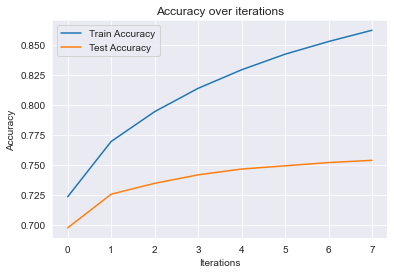

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.plot(accuracy_train, label='Train Accuracy')
plt.plot(accuracy_test, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over iterations')
plt.legend()
plt.show()

In [ ]:
from joblib import load

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏
mlp_model1 = load('mlp_model_period1_v1.joblib')
mlp_model2 = load('mlp_model_period2_v1.joblib')

C:\Users\4793788\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\4793788\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
"""# –û–±—É—á–µ–Ω–∏–µ vectorizer1 –Ω–∞ df_period1
vectorizer1 = TfidfVectorizer()
X1 = vectorizer1.fit_transform(df_period1['title'])

# –û–±—É—á–µ–Ω–∏–µ vectorizer2 –Ω–∞ df_period2
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(df_period2['title'])

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–µ–º—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ vectorizer –∏ –º–æ–¥–µ–ª–∏
predictions = []
for i in range(len(df)):
    if df['month'][i] in [4, 5, 6, 7, 8, 9, 10]:
        X_new = vectorizer1.transform([df['title'][i]])  # –ü—Ä–∏–º–µ–Ω—è–µ–º vectorizer1
        pred = mlp_model1.predict(X_new)
    else:
        X_new = vectorizer2.transform([df['title'][i]])  # –ü—Ä–∏–º–µ–Ω—è–µ–º vectorizer2
        pred = mlp_model2.predict(X_new)

    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤ —Å–ø–∏—Å–æ–∫
    predictions.append(pred[0])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ–±—Ä–∞—Ç–Ω–æ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è —Ç–µ–º
predicted_themes = encoder.inverse_transform(predictions)
"""

"# –û–±—É—á–µ–Ω–∏–µ vectorizer1 –Ω–∞ df_period1\nvectorizer1 = TfidfVectorizer()\nX1 = vectorizer1.fit_transform(df_period1['title'])\n\n# –û–±—É—á–µ–Ω–∏–µ vectorizer2 –Ω–∞ df_period2\nvectorizer2 = TfidfVectorizer()\nX2 = vectorizer2.fit_transform(df_period2['title'])\n\n# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–µ–º—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ vectorizer –∏ –º–æ–¥–µ–ª–∏\npredictions = []\nfor i in range(len(df)):\n    if df['month'][i] in [4, 5, 6, 7, 8, 9, 10]:\n        X_new = vectorizer1.transform([df['title'][i]])  # –ü—Ä–∏–º–µ–Ω—è–µ–º vectorizer1\n        pred = mlp_model1.predict(X_new)\n    else:\n        X_new = vectorizer2.transform([df['title'][i]])  # –ü—Ä–∏–º–µ–Ω—è–µ–º vectorizer2\n        pred = mlp_model2.predict(X_new)\n\n    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤ —Å–ø–∏—Å–æ–∫\n    predictions.append(pred[0])\n\n# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ–±—Ä–∞—Ç–Ω–æ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è —Ç–µ–º\npredicted_themes = encod

In [ ]:
"""predictions_combined = pd.Series(index=df_title.index, dtype='int')
predictions_combined[df_title_month.index] = predictions_month
predictions_combined[df_title_other.index] = predictions_other

# –†–∞—Å—á–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏
accuracy_overall = accuracy_score(y_true, predictions_combined)
print(f"Overall Accuracy: {accuracy_overall}")"""

'predictions_combined = pd.Series(index=df_title.index, dtype=\'int\')\npredictions_combined[df_title_month.index] = predictions_month\npredictions_combined[df_title_other.index] = predictions_other\n\n# –†–∞—Å—á–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏\naccuracy_overall = accuracy_score(y_true, predictions_combined)\nprint(f"Overall Accuracy: {accuracy_overall}")'

In [ ]:
"""
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–µ–º –¥–ª—è –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_all = mlp_model.predict(X)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –º–µ—Ç–∫–∏
predicted_themes = encoder.inverse_transform(y_pred_all)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ç–µ–º –≤ DataFrame
df['predicted_theme'] = predicted_themes
"""

In [ ]:
df

date      time  \
0      2022-04-21  00:31:06   
1      2022-05-03  11:52:51   
2      2023-01-20  13:47:04   
3      2021-03-03  15:02:36   
4      2023-03-26  07:21:47   
...           ...       ...   
204956 2021-05-27  00:45:11   
204957 2021-12-04       NaN   
204958 2022-02-25       NaN   
204959 2021-11-23  07:25:28   
204960 2022-07-13  17:10:36   

                                                    theme  \
0                         –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
1                                   –ö–æ–Ω—Ç–µ–π–Ω–µ—Ä–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏   
2                         –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
3       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ...   
4             –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
...                                                   ...   
204956              –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–∑–¥—É—Ö–∞ / –ù–µ–ø—Ä–∏—è—Ç–Ω—ã–µ –∑–∞–ø–∞—Ö–∏   
204957  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
204958              –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø–æ–¥—ä–µ–∑–¥–æ–≤   
204959  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
204960        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   

                                                    title  \
0       —Å–æ–æ–±—â–∞—Ç—å—Å—è –∂–∏—Ç–µ–ª—å –∏–∑–±—Ä–∞—Ç—å —É–ø—Ä–∞–≤–ª—è—Ç—å –∫–æ–º–ø–∞–Ω–∏—è –≥...   
1                          –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤—ã–≤–æ–∑ –º—É—Å–æ—Ä –¥–µ—Ä–µ–≤–Ω—è   
2       –¥–∏—Ä–µ–∫—Ç–æ—Ä –≥–±—É –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Ä–∞–π–æ–Ω —Å—É–¥ –ø—Ä–∏–∑–Ω–∞—Ç—å—Å—è...   
3       —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–π —Å–ª—É–∂–±–∞ —Å–∫–∏–¥—ã–≤–∞—Ç—å —Å–Ω–µ–≥ –∫...   
4                                  –∂–∞–ª–æ–±–∞ –Ω–∞–≤–∏—Å–∞—Ç—å –¥–µ—Ä–µ–≤–æ   
...                                                   ...   
204956                –∂–∞–ª–æ–±–∞ –Ω–µ–ø—Ä–∏—è—Ç–Ω—ã–π –µ–¥–∫–∏–π –∑–∞–ø–∞—Ö —É–ª–∏—Ü–∞   
204957  –∂–∞–ª–æ–±–∞ –ø–ª–æ—Ö–æ–π —Å–æ—Å—Ç–æ—è–Ω–∏–µ –≥–∞–∑–æ–Ω —É–ª–∏—Ü–∞ –¥–æ–º —É–ª–∏—Ü–∞ –¥–æ–º   
204958    —Å–æ–æ–±—â–∞—Ç—å—Å—è –º—É—Å–æ—Ä –ø–æ–¥—ä–µ–∑–¥ –¥–æ–º —É–ª–∏—Ü–∞ –¥–æ–º –∫–≤–∞—Ä—Ç–∏—Ä–∞   
204959  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Å–æ—Å—Ç–æ—è–Ω–∏...   
204960               –ø–æ–≤–∞–ª–∏—Ç—å –¥–µ—Ä–µ–≤–æ –±–µ—Ä–µ–≥ —Ä–µ–∫–∞ —è—É–∑ —Ä–∞–π–æ–Ω   

                                                     post  \
0       —Å—Ñ–µ—Ä–∞ –∂–∫—Ö –∑–∞—Ö–≤–∞—Ç –¥–æ–º —Ä–∞–π–æ–Ω –Ω–µ—Å–º–æ—Ç—Ä—è –∂–∏—Ç–µ–ª—å –∏–∑–±...   
1          –ø–æ–º–æ–π–∫–∞ –¥–æ–º –æ–∫–æ–ª–æ –¥–∏–∫—Å–∏ –º–∞–π –º–∞–π –≤—ã–≤–æ–∑–∏—Ç—å –º—É—Å–æ—Ä   
2       –¥–∏—Ä–µ–∫—Ç–æ—Ä –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å—É–¥ –ø—Ä–∏–∑–Ω–∞—Ç—å—Å—è –∑–∞–∫—Ä—ã—Ç—å –ø...   
3                             –º–¥–∞ —É—à–∫–æ–º–º—É–Ω–∞–ª—å—â–∏–∫ —Ä–∞–±–æ—Ç–∞—Ç—å   
4       –≤—Ç–æ—Ä–æ–µ —Ç–∞–∫–æ–π –¥–µ—Ä–µ–≤–æ —Ä–∏—Å–∫–æ–≤–∞—Ç—å —É–ø–∞—Å—Ç—å —Ä—è–¥–æ–º –æ—Å—Ç...   
...                                                   ...   
204956  —Å–µ–≥–æ–¥–Ω—è —É—Ç—Ä–æ–º –æ–∫–æ–ª–æ –Ω–∞–∫—Ä—ã—Ç—å –µ–¥–∫–∏–π —É–¥—É—à–ª–∏–≤—ã–π —Ö–∏...   
204957  –≥–∞–∑–æ–Ω –≤–¥–æ–ª—å –∂–µ–ª–µ–∑–∫–∞ –≤–µ—Å—å –∑–∞–±–æ–æ—á–Ω—ã–π —Ç—Ä–∞–≤–∞ —Å–≥–Ω–∏—Ç...   
204958  —É–ø—Ä–∞–≤–∞ –¥–æ—Ä–æ–≥–∞ –≥–±—É –ø—Ä–æ—Å—å–±–∞ –ø—Ä–∏—Å–ª–∞—Ç—å —É–±–æ—Ä—â–∏—Ü–∞ –Ω–∞...   
204959  –¥–æ–º –∂–∏—Ç—å —ç—Ç–æ –ø–æ—Ä—è–¥–æ–∫ –∑–¥–∞–Ω–∏–µ –¥–æ–º –ø–æ–¥—Å–≤–µ—Ç–∫–∞ —Ä–µ–º–æ...   
204960  –±–µ—Ä–µ–≥ —Ä–µ–∫–∞ —è—É–∑ —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–≥—Ä—ã–∑—Ç—å...   

                                           title_original  \
0       –°–æ–æ–±—â–∞–µ—Ç—Å—è —á—Ç–æ –∂–∏—Ç–µ–ª–∏ –∏–∑–±—Ä–∞–ª–∏ —É–ø—Ä–∞–≤–ª—è—é—â—É—é –∫–æ–º–ø...   
1             –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤—ã–≤–æ–∑–∞ –º—É—Å–æ—Ä–∞ –≤ –¥–µ—Ä–µ–≤–Ω–µ –®–∞—Ä–∞–ø–æ–≤–æ   
2       –î–∏—Ä–µ–∫—Ç–æ—Ä –ì–ë–£ "–ñ–∏–ª–∏—â–Ω–∏–∫–∞ —Ä–∞–π–æ–Ω–∞ –•–æ—Ä–æ—à–µ–≤–æ-–ú–Ω–µ–≤–Ω–∏...   
3     

In [ ]:
df[['theme', 'predicted_theme', 'title', 'title_original']]

theme  \
0                         –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
1                      –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)   
2              –î–æ—Ä–æ–∂–Ω–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞ / –ò–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —Ä–∞–∑–º–µ—Ç–∫–∏   
3       –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∏ —Ç–µ–∫—É—â–∏–π —Ä–µ–º–æ–Ω—Ç –¥–æ–º–∞   
4                            –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –î–µ—Ä–∞—Ç–∏–∑–∞—Ü–∏—è   
...                                                   ...   
160163                             –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–æ–∂–∞—Ä   
160164  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ...   
160165                 –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)   
160166             –†–∞—Å—Ç–µ–Ω–∏—è / –í–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è   
160167  –î–µ–º–æ–Ω—Ç–∞–∂, —Ä–µ–º–æ–Ω—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –Ω–∞—Ä...   

                                          predicted_theme  \
0                         –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
1                      –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)   
2              –î–æ—Ä–æ–∂–Ω–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞ / –ò–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —Ä–∞–∑–º–µ—Ç–∫–∏   
3                   –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø–æ–¥—ä–µ–∑–¥–æ–≤   
4                            –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –î–µ—Ä–∞—Ç–∏–∑–∞—Ü–∏—è   
...                                                   ...   
160163                             –¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–æ–∂–∞—Ä   
160164  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–π, –¥–≤–æ—Ä–æ–≤ / –£–±–æ...   
160165                 –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –¥–æ—Ä–æ–≥ / –£–±–æ—Ä–∫–∞ (–∑–∏–º–Ω—è—è)   
160166  –ü–æ—Å–∞–¥–∫–∞, —É—Ö–æ–¥, –ø–µ—Ä–µ—Å–∞–¥–∫–∞ –∑–µ–ª–µ–Ω—ã—Ö –∏ —Ü–≤–µ—Ç–æ—á–Ω—ã—Ö –Ω...   
160167      –ù–∞–ª–∏—á–∏–µ –æ–ø–∞—Å–Ω–æ –≤—ã—Å—Ç—É–ø–∞—é—â–∏—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–æ –¥–≤–æ—Ä–µ   

                                                    title  \
0       –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ ...   
1                                              –≤–∏–¥–µ–æ—Ä–æ–ª–∏–∫   
2       –Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –ø–æ–≤–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–∑–º–µ—Ç–∫–∞ –ø–∞—Ä–∫–æ–≤–æ—á–Ω...   
3       —É–ª–∏—Ü–∞ –¥–æ–º –ø–æ–¥—ä–µ–∑–¥ –ø–æ–ª–æ–º–∞—Ç—å –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥ –∏—Å–ø–æ—Ä—Ç...   
4       –∂–∏—Ç–µ–ª—å –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞–ª–∏—á–∏–µ –∫—Ä—ã—Å–∞ –ø–æ–¥—ä–µ–∑–¥...   
...                                                   ...   
160163                      –≤–æ–∑–≥–æ—Ä–∞–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä–∞ –¥–æ–º —É–ª–∏—Ü–∞   
160164       –∂–∞–ª–æ–±–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —É–±–æ—Ä–∫–∞ —Å–Ω–µ–≥ –ª—ë–¥ –¥–≤–æ—Ä —à–æ—Å—Å–µ   
160165                                         –≤–∏–¥–µ–æ—Ä–æ–ª–∏–∫   
160166    —É–ª–∏—Ü–∞ –¥–æ–º –¥–µ—Ä–µ–≤–æ –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Å–æ—Å—Ç–æ—è–Ω–∏–µ   
160167  —Ç–æ—Ä—á–∞—Ç—å —à—Ç—ã—Ä—å –∫—Ä—é–∫ —Å—Ç–æ–ª–± –ø–µ—Ä–µ—É–ª–æ–∫ –æ–∫–æ–ª–æ –¥–æ–º –≥–∞—Ä–∞–∂   

                                           title_original  
0       –ö—Ä–∏—Ç–∏–∫–∞ –ø–æ –ø–æ–≤–æ–¥—É –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Å–æ–¥–µ—Ä–∂...  
1                                            –í–∏–¥–µ–æ—Ä–æ–ª–∏–∫ –≤  
2       –ù–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ –ø–æ –ø–æ–≤–æ–¥—É –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–∑–º–µ—Ç–∫–∏ –ø–∞—Ä–∫–æ...  
3       –£–ª. –ù–∏–∫–æ–ª–∞—è –•–∏–º—É—à–∏–Ω–∞, –¥. 1, 3-–π –ø–æ–¥—ä–µ–∑–¥, –ø–æ–ª–æ–º...  
4       –ñ–∏—Ç–µ–ª–∏ –æ–±—Ä–∞—â–∞—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –∫—Ä—ã—Å –≤ –ø–æ–¥...  
...                                                   ...  
160163  –í–æ–∑–≥–æ—Ä–∞–Ω–∏–µ –≤ –∫–≤–∞—Ä—Ç–∏—Ä–µ –¥–æ–º–∞ –Ω–∞ —É–ª–∏—Ü–µ –ê—Ç–ª–∞—Å–æ–≤–∞, ...  
160164  –ñ–∞–ª–æ–±–∞ –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —É–±–æ—Ä–∫–∏ —Å–Ω–µ–≥–∞ –∏ –ª—å–¥–∞ –≤–æ –¥–≤...  
160165                                       –í–∏–¥–µ–æ—Ä–æ–ª–∏–∫ –≤  
160166  –ù–∞ —É–ª. –ü–æ–ª–∏–Ω—ã –û—Å–∏–ø–µ–Ω

In [ ]:
# –í–∞—à –≤—Ö–æ–¥–Ω–æ–π —Ç–µ–∫—Å—Ç
input_text = "–í–∏—Å—è—Ç —Å–æ—Å—É–ª—å–∫–∏, –Ω–∏–∫—Ç–æ –Ω–µ —Å–±–∏–≤–∞–µ—Ç"

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
processed_text = preprocess_text(input_text)

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
input_vector = vectorizer.transform([processed_text])

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ MLP
prediction = mlp_model.predict(input_vector)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ç–µ–∫—Å—Ç–æ–≤—É—é –º–µ—Ç–∫—É
predicted_theme = encoder.inverse_transform(prediction)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ç–µ–º–∞:", predicted_theme[0])

NotFittedError: Vocabulary not fitted or provided

In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –∏–Ω–¥–µ–∫—Å–æ–≤
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, range(df.shape[0]), test_size=0.2, stratify=y, random_state=42
)

# –¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ indices_test –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è test_df
test_df = df.iloc[indices_test]

# –°–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏ –æ—Å—Ç–∞—é—Ç—Å—è –Ω–µ–∏–∑–º–µ–Ω–Ω—ã–º–∏
y_pred_test = mlp_model.predict(X_test)
predicted_themes_test = encoder.inverse_transform(y_pred_test)
test_df['predicted_theme'] = predicted_themes_test

test_df[['theme', 'predicted_theme', 'title', 'title_original']]

ValueError: Found input variables with inconsistent numbers of samples: [25500, 25500, 204961]

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–∫ –∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ
actual_themes_test = encoder.inverse_transform(y_test)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–∫ –≤ DataFrame —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
test_df['actual_theme'] = actual_themes_test

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–ª—è –≤—ã–≤–æ–¥–∞ —Ç–æ–ª—å–∫–æ –Ω–µ–≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
incorrect_predictions_df = test_df[test_df['actual_theme'] != test_df['predicted_theme']]

# –í—ã–≤–æ–¥ –Ω–µ–≤–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Å—Ç—Ä–æ–∫
incorrect_predictions_df[['theme', 'predicted_theme', 'title', 'title_original']]

ValueError: y contains previously unseen labels: ['103' '106' '11' '112' '116' '118' '12' '120' '121' '124' '130' '131'
 '132' '138' '14' '140' '142' '143' '144' '146' '148' '15' '152' '153'
 '154' '155' '156' '157' '16' '160' '161' '163' '165' '166' '169' '170'
 '171' '172' '173' '174' '175' '176' '18' '186' '188' '189' '190' '191'
 '192' '197' '198' '199' '200' '205' '207' '21' '212' '213' '214' '222'
 '223' '226' '23' '24' '25' '3' '33' '34' '39' '5' '50' '51' '62' '63'
 '65' '67' '74' '79' '8' '81' '82' '83' '88' '89' '91']

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
from keras.preprocessing.text import Tokenizer

# –°–æ–∑–¥–∞–µ–º –µ–¥–∏–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å (—Å–ª–æ–≤–æ -> —á–∏—Å–ª–æ) –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions.tolist())

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –æ–ø–∏—Å–∞–Ω–∏—è –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –∑–∞–º–µ–Ω—è—è —Å–ª–æ–≤–∞ –Ω–∞ —á–∏—Å–ª–∞ –ø–æ —Å–ª–æ–≤–∞—Ä—é.
textSequences = tokenizer.texts_to_sequences(descriptions.tolist())

In [ ]:
def load_data_from_arrays(strings, labels, train_test_split=0.9):
    data_size = len(strings)
    test_size = int(data_size - round(data_size * train_test_split))
    print("Test size: {}".format(test_size))

    print("\nTraining set:")
    x_train = strings[test_size:]
    print("\t - x_train: {}".format(len(x_train)))
    y_train = labels[test_size:]
    print("\t - y_train: {}".format(len(y_train)))

    print("\nTesting set:")
    x_test = strings[:test_size]
    print("\t - x_test: {}".format(len(x_test)))
    y_test = labels[:test_size]
    print("\t - y_test: {}".format(len(y_test)))

    return x_train, y_train, x_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_data_from_arrays(textSequences, categories, train_test_split=0.8)

Test size: 40992

Training set:
	 - x_train: 163969
	 - y_train: 163969

Testing set:
	 - x_test: 40992
	 - y_test: 40992


In [ ]:
# –°–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ
total_words = len(tokenizer.word_index)
print(f'–í —Å–ª–æ–≤–∞—Ä–µ {total_words} —Å–ª–æ–≤')

–í —Å–ª–æ–≤–∞—Ä–µ 17966 —Å–ª–æ–≤


In [ ]:
import keras
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö —Å–ª–æ–≤
num_words = 1500

print('–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ–ø–∏—Å–∞–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –≤–µ–∫—Ç–æ—Ä—ã —á–∏—Å–µ–ª...')
tokenizer = Tokenizer(num_words=num_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_train:', X_train.shape)
print('–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_test:', X_test.shape)

print('–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –º–∞—Ç—Ä–∏—Ü—É –¥–≤–æ–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª '
      '(–¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, total_categories)
y_test = keras.utils.to_categorical(y_test, total_categories)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ–ø–∏—Å–∞–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –≤–µ–∫—Ç–æ—Ä—ã —á–∏—Å–µ–ª...
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_train: (163969, 1500)
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_test: (40992, 1500)
–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –º–∞—Ç—Ä–∏—Ü—É –¥–≤–æ–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª (–¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è categorical_crossentropy)
y_train shape: (163969, 227)
y_test shape: (40992, 227)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

print(u'–°–æ–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å...')
model = Sequential()
model.add(Dense(512, input_shape=(num_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(total_categories))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

–°–æ–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               768512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 227)               116451    
                                                                 
 activation_1 (Activation)   (None, 227)               0         
                                                                 
Total params: 884963 (3.38 MB)
Trainable params: 884963 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________________

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=3,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/3


2563/2563 [==============================] - 41s 15ms/step - loss: 1.3714 - accuracy: 0.6592 - val_loss: 1.0307 - val_accuracy: 0.7106
Epoch 2/3
2563/2563 [==============================] - 34s 13ms/step - loss: 0.9169 - accuracy: 0.7335 - val_loss: 0.9640 - val_accuracy: 0.7250
Epoch 3/3
2563/2563 [==============================] - 34s 13ms/step - loss: 0.7915 - accuracy: 0.7636 - val_loss: 0.9368 - val_accuracy: 0.7343


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=1)
print()
print(f'–û—Ü–µ–Ω–∫–∞ —Ç–µ—Å—Ç–∞: {score[0]}')
print(f'–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: {score[1]}')

1281/1281 [==============================] - 5s 4ms/step - loss: 0.9368 - accuracy: 0.7343

–û—Ü–µ–Ω–∫–∞ —Ç–µ—Å—Ç–∞: 0.9368072152137756
–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: 0.7342652082443237


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

# –ò–º–∏—Ç–∞—Ü–∏—è –º–Ω–æ–≥–æ–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ y_pred
y_pred = np.random.rand(32033, 227)  # —ç—Ç–æ –±—É–¥–µ—Ç –∑–∞–º–µ–Ω–µ–Ω–æ —Ä–µ–∞–ª—å–Ω—ã–º –º–∞—Å—Å–∏–≤–æ–º y_pred –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—è, —á—Ç–æ —ç—Ç–æ –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞)
y_pred_max_index = np.argmax(y_pred, axis=1)

y_pred_max_index[:10]  # –ü–æ–∫–∞–∑–∞—Ç—å –ø–µ—Ä–≤—ã–µ 10 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏

array([ 76, 143, 127, 224, 113,  96,   2, 153,  59,  78], dtype=int64)

In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = model.predict(X_test)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—è, —á—Ç–æ —ç—Ç–æ –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞)
# y_pred = np.argmax(y_pred, axis=1)
# y_test = np.argmax(y_test, axis=1)

# –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏: —Ç–µ–∫—Å—Ç, –æ–∂–∏–¥–∞–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
df = pd.DataFrame({'–¢–µ–∫—Å—Ç': X_test, '–û–∂–∏–¥–∞–µ–º–æ–µ': y_test, '–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ': y_pred})

1281/1281 [==============================] - 5s 3ms/step


ValueError: Per-column arrays must each be 1-dimensional

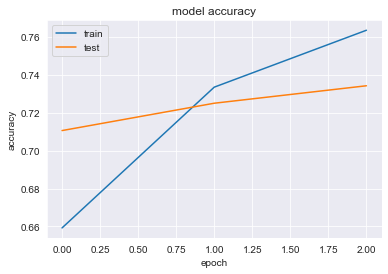

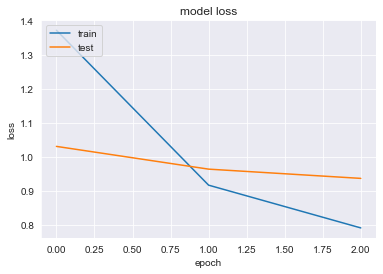

In [ ]:
# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# –ì—Ä–∞—Ñ–∏–∫ –æ—Ü–µ–Ω–∫–∏ loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

================================================================================================================================================
LSTM (long short-term memory) –º–æ–¥–µ–ª—å
================================================================================================================================================

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
from keras.preprocessing.text import Tokenizer

# –°–æ–∑–¥–∞–µ–º –µ–¥–∏–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å (—Å–ª–æ–≤–æ -> —á–∏—Å–ª–æ) –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions.tolist())

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –æ–ø–∏—Å–∞–Ω–∏—è –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –∑–∞–º–µ–Ω—è—è —Å–ª–æ–≤–∞ –Ω–∞ —á–∏—Å–ª–∞ –ø–æ —Å–ª–æ–≤–∞—Ä—é.
textSequences = tokenizer.texts_to_sequences(descriptions.tolist())

In [ ]:
X_train, y_train, X_test, y_test = load_data_from_arrays(textSequences, categories, train_test_split=0.8)
# –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–∞–º–æ–º –¥–ª–∏–Ω–Ω–æ–º –æ–ø–∏—Å–∞–Ω–∏–∏ –∑–∞—è–≤–∫–∏
max_words = 0
for desc in descriptions.tolist():
    words = len(desc.split())
    if words > max_words:
        max_words = words
print(f'–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–∞–º–æ–º –¥–ª–∏–Ω–Ω–æ–º –æ–ø–∏—Å–∞–Ω–∏–∏ –∑–∞—è–≤–∫–∏: {max_words} —Å–ª–æ–≤')

total_unique_words = len(tokenizer.word_counts)
print(f'–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ: {total_unique_words}')

maxSequenceLength = max_words

Test size: 40992

Training set:
	 - x_train: 163969
	 - y_train: 163969

Testing set:
	 - x_test: 40992
	 - y_test: 40992
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Å–∞–º–æ–º –¥–ª–∏–Ω–Ω–æ–º –æ–ø–∏—Å–∞–Ω–∏–∏ –∑–∞—è–≤–∫–∏: 20 —Å–ª–æ–≤
–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ä–µ: 0


In [ ]:
vocab_size = round(total_unique_words/10) #–±—É–¥–µ—Ç —Ä–∞–≤–µ–Ω –¥–µ—Å—è—Ç–æ–π —á–∞—Å—Ç–∏ (–æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ–π) –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ (–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ —Å–ª–æ–≤–∞—Ä—è (vocab_size) –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ —Ç–µ–∫—Å—Ç–∞ –∏–ª–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏)

In [ ]:
from keras.preprocessing import sequence
import keras

print(u'–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ–ø–∏—Å–∞–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –≤–µ–∫—Ç–æ—Ä—ã —á–∏—Å–µ–ª...')
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(descriptions)

# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxSequenceLength)
X_test = sequence.pad_sequences(X_test, maxlen=maxSequenceLength)

print('–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_train:', X_train.shape)
print('–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_test:', X_test.shape)

print(u'–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –º–∞—Ç—Ä–∏—Ü—É –¥–≤–æ–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª '
      u'(–¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è categorical_crossentropy)')
# y_train = keras.utils.to_categorical(y_train, total_categories)
# y_test = keras.utils.to_categorical(y_test, total_categories)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ–ø–∏—Å–∞–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –≤–µ–∫—Ç–æ—Ä—ã —á–∏—Å–µ–ª...
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_train: (163969, 20)
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å X_test: (40992, 20)
–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –º–∞—Ç—Ä–∏—Ü—É –¥–≤–æ–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª (–¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è categorical_crossentropy)
y_train shape: (163969,)
y_test shape: (40992,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(np.concatenate([y_train, y_test]))
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

num_classes = len(encoder.classes_) + 1
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {num_classes}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 227


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

# –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
max_features = vocab_size
max_features = 7306
num_classes = total_categories
print(u'–°–æ–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å...')
model = Sequential()
model.add(Embedding(input_dim=7307, output_dim=256, input_length=63))

# –î–æ–±–∞–≤–ª—è–µ–º —Å–ª–æ–π LSTM
# –í—ã –º–æ–∂–µ—Ç–µ –∏–∑–º–µ–Ω—è—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ (units) –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∑–∞–¥–∞—á–∏
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Å–ª–æ—è LSTM –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –Ω–æ —ç—Ç–æ —É–≤–µ–ª–∏—á–∏—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
model.add(Dense(units=100, activation='relu'))

# –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å softmax –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
model.add(Dense(units=227, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

–°–æ–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 256)           1870592   
                                                                 
 lstm (LSTM)                 (None, 63, 100)           142800    
                                                                 
 dropout (Dropout)           (None, 63, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 100)               5100      
                                                                 
 dense_1 (Dense)     

In [ ]:
X_train = list(X_train)
X_test = list(X_test)
y_train = list(y_train)
y_test = list(y_test)

In [ ]:
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å –≤ X_train:", np.max(X_train))
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å –≤ X_test:", np.max(X_test))
print('max_features:', max_features)

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å –≤ X_train: 17966
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å –≤ X_test: 12934
max_features: 7306


In [ ]:
import numpy as np
from collections import Counter

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ max_features —É–∂–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ
max_features = 6616  # –ü—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤–∞—à–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ

# 1. –°—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –∫–∞–∂–¥–æ–≥–æ –∏–Ω–¥–µ–∫—Å–∞ –≤ X_train
all_indices = np.concatenate(X_train)
index_counts = Counter(all_indices)

# 2. –í—ã–±–∏—Ä–∞–µ–º max_features –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è –∏–Ω–¥–µ–∫—Å–æ–≤
most_common_indices = {index for index, _ in index_counts.most_common(max_features)}

# 3. –ó–∞–º–µ–Ω—è–µ–º –≤—Å–µ –Ω–µ—á–∞—Å—Ç—ã–µ –∏–Ω–¥–µ–∫—Å—ã –Ω–∞ 0 –≤ X_train –∏ X_test
X_train = np.array([[index if index in most_common_indices else 0 for index in sequence] for sequence in X_train])
X_test = np.array([[index if index in most_common_indices else 0 for index in sequence] for sequence in X_test])

In [ ]:
X_train

array([[  0,   0,   0, ...,  15,  10,   6],
       [  0,   0,   0, ..., 340, 662,   1],
       [  0,   0,   0, ..., 104,  17,   1],
       ...,
       [  0,   0,   0, ...,   1,   2,  30],
       [  0,   0,   0, ...,   2,   1,  35],
       [  0,   0,   0, ..., 120, 423,   6]])

In [ ]:
a = []
for i in y_test:
    a.append(len(i))
print(set(a))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

TypeError: object of type 'int' has no len()

In [ ]:
max_features = 7306
X_train = np.clip(X_train, 0, max_features-1) #–¥–ª—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏, —á—Ç–æ –≤—Å–µ –∏–Ω–¥–µ–∫—Å—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –¥–æ–ø—É—Å—Ç–∏–º–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞
X_test = np.clip(X_test, 0, max_features-1)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
batch_size = 32
epochs = 3

print(u'–¢—Ä–µ–Ω–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å...')
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

–¢—Ä–µ–Ω–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å...
Epoch 1/3


ValueError: in user code:

    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 63), found shape=(None, 20)


In [ ]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print()
print(u'–û—Ü–µ–Ω–∫–∞ —Ç–µ—Å—Ç–∞: {}'.format(score[0]))
print(u'–û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: {}'.format(score[1]))

ValueError: in user code:

    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\4793788\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 63), found shape=(None, 20)


KeyError: 'acc'

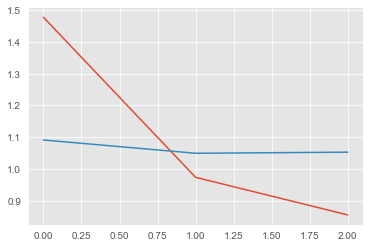

In [ ]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è")
plt.xlabel("–ü–æ–≤—Ç–æ—Ä–µ–Ω–∏—è #")
plt.ylabel("–û—à–∏–±–∫–∏")
plt.legend(loc="lower left")

In [ ]:
prod = pd.read_csv(r'C:\Users\4793788\PycharmProjects\pythonProject2\TextClassifier\prod_clean_lemm.csv', encoding='utf-8', delimiter=';')
prod

date                                              theme  \
0       2020-06-02                      –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –°–∫–æ–ø–ª–µ–Ω–∏—è –≤–æ–¥—ã   
1       2020-06-02         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2       2020-06-03        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3       2020-06-03  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4       2020-06-03  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
...            ...                                                ...   
132465  2023-07-21              –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ / –ì–æ—Ä—è—á–µ–µ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ   
132466  2023-07-21  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   
132467  2023-07-21  –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–ª–µ—Ç–Ω—ã—Ö –º–∞–≥–∏—Å—Ç—Ä–∞–ª–µ–π, —É–ª–∏—Ü –∏ –æ...   
132468  2023-07-21                    –†–∞–±–æ—Ç–∞ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ú–ö–î   
132469  2023-07-21                       –ü—Ä—É–¥—ã / –°–æ—Å—Ç–æ—è–Ω–∏–µ –≤–æ–¥—ã –ø—Ä—É–¥–∞   

                                                     text  
0                                   –∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç  
1       –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π –Ω–∞—Ä–æ–¥–Ω—ã–π —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...  
2       —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥...  
3       –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å–¥–µ—Ä–∂–∞—Ç—å –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...  
4       –ª–∏–≤–Ω–µ–≤–∫–∞ –≥–æ—Ä–æ–¥ –Ω—É–∂–¥–∞—Ç—å—Å—è –∑–∞–º–µ–Ω–∞ —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞...  
...                                                   ...  
132465  –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ —Å–æ–±–ª—é–¥–µ–Ω–∏–µ —Å—Ä–æ–∫ –ø–æ–¥–∞—á–∞ –≥–≤—Å –∫–æ—Ä–ø—É...  
132466  –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç–∞ —É–∫–ª–∞–¥–∫–∞ –∞—Å—Ñ–∞–ª—å—Ç ...  
132467  —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–≤–æ—Ä –∞–¥—Ä–µ—Å —É–ª –∞–∫–∞–¥–µ–º...  
132468  –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –ø–æ–º—ã–≤–∫–∞ –º—É—Å–æ—Ä–Ω—ã–π –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä —Ç–µ—Ä—Ä–∏...  
132469  —Å–æ–æ–±—â–∞—Ç—å—Å—è —Å–ª–∏–≤ —Ö–∏–º–∏–∫–∞—Ç –ø—Ä—É–¥ –æ–∫–æ–ª–æ –º–≥—Å —Ä–∞–π–æ–Ω —è...  

[132470 rows x 3 columns]

In [ ]:
prod.to_csv(r'C:\Users\4793788\PycharmProjects\pythonProject2\TextClassifier\prod_clean_lemm_vector.csv', sep=';', index=False, encoding='utf-8-sig')

In [ ]:
import re

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö —Å–ª–æ–≤ –∏–∑ —Å—Ç—Ä–æ–∫–∏
def remove_english_words(text):
    # –†–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö —Å–ª–æ–≤
    # \b –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç –≥—Ä–∞–Ω–∏—Ü—É —Å–ª–æ–≤–∞, [a-zA-Z] —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –±—É–∫–≤–∞–º –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞
    pattern = r'\b[a-zA-Z]+\b'
    # –ó–∞–º–µ–Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö —Å–ª–æ–≤ –Ω–∞ –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É
    return re.sub(pattern, '', text)

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫ –∫–∞–∂–¥–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É –≤ –∫–æ–ª–æ–Ω–∫–µ 'text'
prod['text'] = prod['text'].apply(remove_english_words)
prod.head()

date                                              theme  \
0  2020-06-02                      –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –°–∫–æ–ø–ª–µ–Ω–∏—è –≤–æ–¥—ã   
1  2020-06-02         –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ú–ö–î / –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥–æ–≤   
2  2020-06-03        –ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –£–ø–∞–≤—à–∏–µ –∏ –ø–æ–≤–∞–ª–µ–Ω–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è   
3  2020-06-03  –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω...   
4  2020-06-03  –í–æ–¥–æ–æ—Ç–≤–µ–¥–µ–Ω–∏–µ / –ü—Ä–∏–µ–º –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å—Ç–æ—á–Ω—ã...   

                                                text  
0                              –∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç  
1  –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π –Ω–∞—Ä–æ–¥–Ω—ã–π —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...  
2  —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥...  
3  –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å–¥–µ—Ä–∂–∞—Ç—å –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...  
4  –ª–∏–≤–Ω–µ–≤–∫–∞ –≥–æ—Ä–æ–¥ –Ω—É–∂–¥–∞—Ç—å—Å—è –∑–∞–º–µ–Ω–∞ —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞...

In [ ]:
prod['text'].str.split().apply(len).mean() #–≤—ã—Ä–∞–∂–µ–Ω–∏–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å—Ä–µ–¥–Ω—é—é –¥–ª–∏–Ω—É —Å–ª–æ–≤ –≤ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ

33.648765758284895

In [ ]:
count = 0
lst = []
dct = {}
while True:
    try:
        prod['text'].values[count]
        lst.append(prod['text'].values[count])
        while len(lst[count]) < 50:
            lst[count].append(0)
        count += 1
    except:
        break

arr = np.array(lst)
dct['data'] = arr

In [ ]:
lst

['–∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç']

In [ ]:
# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X = tfidf.fit_transform(prod['text'])

svd = TruncatedSVD(n_components=100)  # —Å–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
X_reduced = svd.fit_transform(X)

prod['tfidf_vectorized_text'] = list(X_reduced)
prod['tfidf_vectorized_text'].iloc(0)[0]

array([ 0.02341263,  0.00208048, -0.00958585,  0.00264904, -0.00049459,
        0.0074442 , -0.00503305,  0.01560219, -0.04280731, -0.03757598,
       -0.03478411, -0.00714093, -0.02723887,  0.00076271,  0.00627079,
       -0.03385773,  0.00320599,  0.00171174,  0.01200925,  0.0240924 ,
       -0.01372878, -0.01156689, -0.03247846,  0.01801188,  0.01542528,
        0.00181316, -0.02412026,  0.00569631, -0.00273498,  0.00534933,
        0.01378268, -0.00148326,  0.02348947,  0.00294921, -0.01969257,
        0.00882871,  0.00798045,  0.02252285,  0.00661256,  0.06267085,
        0.0044515 ,  0.01622548,  0.00786501,  0.11858033, -0.01974006,
        0.0333417 , -0.10604387,  0.05200977,  0.0242911 ,  0.03701516,
        0.00464485,  0.02684376, -0.04849544, -0.06366033,  0.03071672,
       -0.02131093,  0.04148789, -0.00142209, -0.09697858,  0.12116228,
       -0.09715046,  0.18212414, -0.1018875 ,  0.03775159, -0.0479024 ,
       -0.03324066,  0.22544421, -0.01154288, -0.10111651,  0.04

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
prod['vectorized_text'] = tokenizer.texts_to_sequences(data['text'])

NameError: name 'data' is not defined

In [ ]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ 'theme'
unique_themes = sorted(prod['theme'].unique())

# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏, –Ω–∞—á–∏–Ω–∞—é—â–∏–º–∏—Å—è —Å 1
theme_dict = {theme: i + 1 for i, theme in enumerate(unique_themes)}

# –í—ã–≤–æ–¥ —Å–æ–∑–¥–∞–Ω–Ω–æ–≥–æ —Å–ª–æ–≤–∞—Ä—è
print(theme_dict)

{'–ê–¥—Ä–µ—Å–Ω—ã–µ —É–∫–∞–∑–∞—Ç–µ–ª–∏': 1, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ó–∏–º–Ω–∏–µ –≤–∏–¥—ã –æ—Ç–¥—ã—Ö–∞': 2, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ö—Ä—É–ø–Ω—ã–µ –î–¢–ü': 3, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ù–µ—Å—á–∞—Å—Ç–Ω—ã–µ —Å–ª—É—á–∞–∏ —Å —Ä–∞–±–æ—á–∏–º–∏': 4, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û—Ç–∫—Ä—ã—Ç—ã–µ –∏ —Å–ª–æ–º–∞–Ω–Ω—ã–µ –ª—é–∫–∏': 5, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–∞–¥–µ–Ω–∏–µ —Å–Ω–µ–≥–∞ –∏ —Å–æ—Å—É–ª–µ–∫': 6, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ': 7, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –°–ª–æ–º–∞–Ω–Ω—ã–µ –¥–µ—Ç—Å–∫–∏–µ –∏ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏': 8, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –¢–µ—Ä–∞–∫—Ç (–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ)': 9, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•': 10, '–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –Ø–º—ã, –Ω–∞—Ä—É—à–µ–Ω–∏—è –ø–æ–∫—Ä—ã—Ç–∏—è': 11, '–ë–∏—Ç—Ü–µ–≤—Å–∫–∏–π –ª–µ—Å': 12, '–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –û–û–ü–¢: –ö—É—Å–∫–æ–≤–æ':

In [ ]:
# –ó–∞–º–µ–Ω–∞ —Ç–µ–º –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∏–Ω–¥–µ–∫—Å—ã
prod['theme'] = prod['theme'].apply(lambda theme: theme.replace(theme, str(theme_dict[theme])))
prod[['theme']]

theme
0        121
1        155
2        124
3        188
4         21
...      ...
132465    23
132466    21
132467    16
132468   131
132469   130

[132470 rows x 1 columns]

In [ ]:
prod.columns

Index(['date', 'theme', 'text', 'tfidf_vectorized_text'], dtype='object')

In [ ]:
df = prod[['theme', 'tfidf_vectorized_text']]

In [ ]:
filtered_groups = []

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ —Ç–µ–º–∞–º –∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è
for theme, group in prod.groupby('theme'):
    if len(group) > 300:
        # –°–ª—É—á–∞–π–Ω—ã–π –≤—ã–±–æ—Ä 300 –∑–∞–ø–∏—Å–µ–π –¥–ª—è –¥–∞–Ω–Ω–æ–π —Ç–µ–º—ã
        filtered_groups.append(group.sample(n=300, random_state=1))
    else:
        # –î–æ–±–∞–≤–ª—è–µ–º –≤—Å–µ –∑–∞–ø–∏—Å–∏ –¥–ª—è —Ç–µ–º, –≥–¥–µ –∏—Ö –º–µ–Ω–µ–µ 300
        filtered_groups.append(group)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –≥—Ä—É–ø–ø –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
filtered_prod = pd.concat(filtered_groups)

# –ü–µ—Ä–µ–∏–Ω–¥–µ–∫—Å–∞—Ü–∏—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
filtered_prod.reset_index(drop=True, inplace=True)

In [ ]:
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ç–µ–º—ã –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–æ 300
filtered_prod = filtered_prod[filtered_prod['theme'].map(filtered_prod['theme'].value_counts()) >= 300]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ filtered_prod —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω
# filtered_prod = pd.read_csv('your_file.csv')  # –ó–∞–≥—Ä—É–∑–∏—Ç–µ –≤–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –µ—Å–ª–∏ –æ–Ω –µ—â–µ –Ω–µ –∑–∞–≥—Ä—É–∂–µ–Ω

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ –º–µ—Ç–∫–∏ (y)
X = list(filtered_prod['tfidf_vectorized_text'])  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ 'text' —Å–æ–¥–µ—Ä–∂–∏—Ç –≤–µ–∫—Ç–æ—Ä–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
y = filtered_prod['theme']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = LogisticRegression()
model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         103       0.56      0.58      0.57        57
         106       0.60      0.69      0.64        61
          11       0.47      0.50      0.49        52
         112       0.28      0.39      0.32        57
         116       0.33      0.21      0.26        62
         118       0.24      0.14      0.18        50
          12       0.64      0.84      0.72        55
         120       0.64      0.43      0.52        69
         121       0.49      0.45      0.47        62
         124       0.67      0.84      0.75        63
         130       0.57      0.88      0.69        65
         131       0.28      0.06      0.11        77
         132       0.83      0.92      0.87        63
         138       0.47      0.41      0.44        64
          14       0.88      0.93      0.90        68
         140       0.48      0.55      0.51        55
         142       0.69      0.61      0.65        59
         143       0.40    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –≤–∞—à–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ filtered_prod['text']
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(filtered_prod['text'])
y = filtered_prod['theme']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ –Ω–∞–∏–≤–Ω–æ–≥–æ –±–∞–π–µ—Å–æ–≤—Å–∫–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
model = MultinomialNB()
model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

NameError: name 'MultinomialNB' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ filtered_prod —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω
# filtered_prod = pd.read_csv('your_file.csv')  # –ó–∞–≥—Ä—É–∑–∏—Ç–µ –≤–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –µ—Å–ª–∏ –æ–Ω –µ—â–µ –Ω–µ –∑–∞–≥—Ä—É–∂–µ–Ω

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ –º–µ—Ç–∫–∏ (y)
X = list(filtered_prod['tfidf_vectorized_text'])  # –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ 'text' —Å–æ–¥–µ—Ä–∂–∏—Ç –≤–µ–∫—Ç–æ—Ä–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
y = filtered_prod['theme']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
model = RandomForestClassifier(n_estimators=100, random_state=42)  # –í—ã –º–æ–∂–µ—Ç–µ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
model.fit(X_train, y_train)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         103       0.39      0.53      0.45        57
         106       0.46      0.61      0.52        61
          11       0.27      0.40      0.32        52
         112       0.31      0.49      0.38        57
         116       0.23      0.23      0.23        62
         118       0.15      0.12      0.13        50
          12       0.64      0.87      0.74        55
         120       0.41      0.33      0.37        69
         121       0.43      0.45      0.44        62
         124       0.69      0.86      0.77        63
         130       0.60      0.86      0.71        65
         131       0.27      0.09      0.14        77
         132       0.72      0.83      0.77        63
         138       0.33      0.27      0.29        64
          14       0.90      0.93      0.91        68
         140       0.42      0.55      0.48        55
         142       0.66      0.64      0.65        59
         143       0.38    

In [ ]:
filtered_prod

date theme                                               text  \
488    2023-06-12   103  —Å–æ–æ–±—â–∞—Ç—å—Å—è –ø–æ–≤—ã—à–µ–Ω–∏–µ –æ–ø–ª–∞—Ç–∞ –∂–∫—Ö –≥–æ—Ä–æ–¥ –º–æ—Å–∫–≤–∞ –æ...   
489    2021-11-29   103  –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –Ω–∞—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç—å—è –≤—ã–≤–æ–∑ –º—É—Å–æ—Ä —Å–æ...   
490    2021-11-15   103  –∫—Ä–∏—Ç–∏–∫–∞ –Ω–æ–≤—ã–π —Ç–∞—Ä–∏—Ñ –≤—ã–≤–æ–∑ —Ç–∫–æ –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å –∫–æ–º...   
491    2023-05-02   103  –∂–∞–ª–æ–±–∞ –∂–∏—Ç–µ–ª—å –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –Ω–∞—á–∏—Å–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç...   
492    2021-10-24   103  –∫—Ä–∏—Ç–∏–∫–∞ –∞–¥—Ä–µ—Å –º–æ—Å—ç–Ω–µ—Ä–≥–æ—Å–±—ã—Ç –≤–æ–ø—Ä–æ—Å —Å–≤–æ–µ–≤—Ä–µ–º–µ–Ω–Ω...   
...           ...   ...                                                ...   
35878  2022-12-02    91  –∂–∏—Ç–µ–ª—å —É–∫–∞–∑–∞—Ç—å –Ω–∞—Ä—É—à–µ–Ω–∏–µ –ø–æ–∂–∞—Ä–Ω—ã–π –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å...   
35879  2021-07-06    91  –∂–∞–ª–æ–±–∞ –¥–ª–∏—Ç–µ–ª—å–Ω—ã–π —Å—Ä–æ–∫ —É—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –∫...   
35880  2021-04-29    91  –∂–∞–ª–æ–±–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –æ—Å—Å –≤–æ–ø—Ä–æ—Å –∫–∞–ø–∏—Ç–∞...   
35881  2023-03-30    91  –∂–∞–ª–æ–±–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –≤—ã–µ–∑–¥–Ω–æ–π –∫–æ–º–∏—Å—Å–∏–æ...   
35882  2022-06-30    91  –∂–∏—Ç–µ–ª—å –∫—Ä–∏—Ç–∏–∫–æ–≤–∞—Ç—å —Ä–∞–±–æ—Ç–∞ –∫–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –º...   

                                   tfidf_vectorized_text  
488    [0.12692948260593656, 0.0005274292802858504, -...  
489    [0.16163444869854493, -0.0676256848677644, 0.0...  
490    [0.10138142484149563, 0.005986839464883647, -0...  
491    [0.07579865938894503, 0.02411356345817315, -0....  
492    [0.06613402462445155, 0.013100770480579633, -0...  
...                                                  ...  
35878  [0.13465846072715373, 0.07033646816561616, 0.0...  
35879  [0.15430518855067052, 0.08736586506962514, 0.0...  
35880  [0.169404566464889, 0.12327746466553428, 0.015...  
35881  [0.08048185321412445, 0.046346918426115664, 0....  
35882  [0.15279821815979883, 0.08239182780322397, 0.0...  

[25500 rows x 4 columns]

In [ ]:
pd.DataFrame(filtered_prod['theme'].value_counts()).tail(100)

theme
103    300
207    300
23     300
226    300
223    300
..     ...
157    300
156    300
155    300
154    300
91     300

[85 rows x 1 columns]

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞
threshold = 6

# –ü–æ–¥—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
theme_counts = filtered_prod['theme'].value_counts()

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ç–µ–º—ã –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–æ –ø–æ—Ä–æ–≥—É
filtered_prod = filtered_prod[filtered_prod['theme'].map(theme_counts) >= threshold]

In [ ]:
from imblearn.over_sampling import SMOTE

# –í—ã–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = np.array(list(filtered_prod['tfidf_vectorized_text']))
y = filtered_prod['theme'].values

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
pd.DataFrame(filtered_prod['theme'].value_counts()).head(100)

theme
103    300
207    300
23     300
226    300
223    300
..     ...
157    300
156    300
155    300
154    300
91     300

[85 rows x 1 columns]

In [ ]:
filtered_prod.columns

Index(['date', 'theme', 'text', 'tfidf_vectorized_text'], dtype='object')

In [ ]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
import pymorphy2
from concurrent.futures import ThreadPoolExecutor

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞ pymorphy2
morph = pymorphy2.MorphAnalyzer()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmatized_words)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–∞–∫–µ—Ç–∞ —Ç–µ–∫—Å—Ç–æ–≤
def process_batch(texts):
    return [lemmatize_text(text) for text in texts]

# –†–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø–∞–∫–µ—Ç—ã
def batch(iterable, batch_size=100):
    l = len(iterable)
    for ndx in range(0, l, batch_size):
        yield iterable[ndx:min(ndx + batch_size, l)]

# –ú–Ω–æ–≥–æ–ø–æ—Ç–æ—á–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞
batch_size = 50  # –ú–æ–∂–Ω–æ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π —Å–∏—Å—Ç–µ–º—ã
with ThreadPoolExecutor() as executor:
    results = executor.map(process_batch, batch(prod['text'], batch_size))
    # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    prod['text'] = [lemmatized_text for batch_result in results for lemmatized_text in batch_result]

prod['text']

0                                     –∑–∞—Ç–æ–ø–∏—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –º–æ—Å—Ç
1         –±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π –Ω–∞—Ä–æ–¥–Ω—ã–π —Å–∫–∞–∑–∫–∞ —Å–Ω–∞—á–∞–ª–∞ —Å–µ–º—å –æ...
2         —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥–µ—Ä–µ–≤–æ —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π —É–ø–∞—Å—Ç—å –¥...
3         –∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å —Å–¥–µ—Ä–∂–∞—Ç—å –æ–±–µ—â–∞–Ω–∏–µ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ...
4         –ª–∏–≤–Ω–µ–≤–∫–∞ –≥–æ—Ä–æ–¥ –Ω—É–∂–¥–∞—Ç—å—Å—è –∑–∞–º–µ–Ω–∞ —Å–∫–æ—Ä–æ –∫–∞–Ω–∞–ª–∏–∑–∞...
                                ...                        
132465    –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ —Å–æ–±–ª—é–¥–µ–Ω–∏–µ —Å—Ä–æ–∫ –ø–æ–¥–∞—á–∞ –≥–≤—Å –∫–æ—Ä–ø—É...
132466    –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç–∞ —É–∫–ª–∞–¥–∫–∞ –∞—Å—Ñ–∞–ª—å—Ç ...
132467    —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–≤–æ—Ä –∞–¥—Ä–µ—Å —É–ª –∞–∫–∞–¥–µ–º...
132468    –∫—Ä–∏—Ç–∏–∫–∞ –ø–æ–≤–æ–¥ –ø–æ–º—ã–≤–∫–∞ –º—É—Å–æ—Ä–Ω—ã–π –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä —Ç–µ—Ä—Ä–∏...
132469    —Å–æ–æ–±—â–∞—Ç—å—Å—è —Å–ª–∏–≤ —Ö–∏–º–∏–∫–∞—

In [ ]:
len(prod['text'].unique())

132322

In [ ]:
prod['text'] = prod['text'].apply(lambda x: x.split(' '))

In [ ]:
prod

date theme                                               text  \
0       2020-06-02   121                          [–∑–∞—Ç–æ–ø–∏—Ç—å, –ø–µ—Ä–µ—Ö–æ–¥, –º–æ—Å—Ç]   
1       2020-06-02   155  [–±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π, –Ω–∞—Ä–æ–¥–Ω—ã–π, —Å–∫–∞–∑–∫–∞, —Å–Ω–∞—á–∞–ª–∞, —Å...   
2       2020-06-03   124  [—à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π, —É–ø–∞—Å—Ç—å, –¥–µ—Ä–µ–≤–æ, —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π, —É–ø–∞...   
3       2020-06-03   188  [–∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å, —Å–¥–µ—Ä–∂–∞—Ç—å, –æ–±–µ—â–∞–Ω–∏–µ, –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π...   
4       2020-06-03    21  [–ª–∏–≤–Ω–µ–≤–∫–∞, –≥–æ—Ä–æ–¥, –Ω—É–∂–¥–∞—Ç—å—Å—è, –∑–∞–º–µ–Ω–∞, —Å–∫–æ—Ä–æ, –∫–∞...   
...            ...   ...                                                ...   
132465  2023-07-21    23  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, —Å–æ–±–ª—é–¥–µ–Ω–∏–µ, —Å—Ä–æ–∫, –ø–æ–¥–∞—á–∞, –≥–≤—Å...   
132466  2023-07-21    21  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, –∫–∞—á–µ—Å—Ç–≤–æ, —Ä–∞–±–æ—Ç–∞, —É–∫–ª–∞–¥–∫–∞, –∞—Å...   
132467  2023-07-21    16  [—Ä–µ–∑—É–ª—å—Ç–∞—Ç, –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –¥–≤–æ—Ä, –∞–¥—Ä–µ—Å, —É–ª, ...   
132468  2023-07-21   131  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, –ø–æ–º—ã–≤–∫–∞, –º—É—Å–æ—Ä–Ω—ã–π, –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä,...   
132469  2023-07-21   130  [—Å–æ–æ–±—â–∞—Ç—å—Å—è, —Å–ª–∏–≤, —Ö–∏–º–∏–∫–∞—Ç, –ø—Ä—É–¥, –æ–∫–æ–ª–æ, –º–≥—Å, ...   

                                    tfidf_vectorized_text  
0       [0.02341262872147978, 0.0020804805230502325, -...  
1       [0.030132991430746475, -0.022740252650806928, ...  
2       [0.07016726318697752, -0.052754720715364196, -...  
3       [0.0958306908959486, -0.038505324211720746, -0...  
4       [0.13440047240246594, 0.0011617256539806103, 0...  
...                                                   ...  
132465  [0.07306550642318951, 0.04404124734676112, 0.0...  
132466  [0.14604242044950455, 0.07987600864957181, -0....  
132467  [0.20901720725544357, -0.008970419556283058, -...  
132468  [0.18566314450193314, -0.022104834302974323, -...  
132469  [0.07049554013146446, -0.00668725523116371, -0...  

[132470 rows x 4 columns]

In [ ]:
descriptions = prod['text']
categories = prod['theme']

max_words = 0
for desc in descriptions:
    words = len(desc)
    if words > max_words:
        max_words = words
print('–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {} —Å–ª–æ–≤'.format(max_words))

maxSequenceLength = 209

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 208 —Å–ª–æ–≤


In [ ]:
set(prod['theme'].unique()) - set(themes['theme'].unique())

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',


In [ ]:
# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
vectorizer = TfidfVectorizer(max_features=10000)  # –ú–æ–∂–Ω–æ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
X = vectorizer.fit_transform(prod['text'])

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
prod

date theme                                               text  \
0       2020-06-02   121                          [–∑–∞—Ç–æ–ø–∏—Ç—å, –ø–µ—Ä–µ—Ö–æ–¥, –º–æ—Å—Ç]   
1       2020-06-02   155  [–±–µ—Å–∫—É–¥–Ω–∏–∫–æ–≤—Å–∫–∏–π, –Ω–∞—Ä–æ–¥–Ω—ã–π, —Å–∫–∞–∑–∫–∞, —Å–Ω–∞—á–∞–ª–∞, —Å...   
2       2020-06-03   124  [—à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π, —É–ø–∞—Å—Ç—å, –¥–µ—Ä–µ–≤–æ, —à–∏–ø–∏–ª–æ–≤—Å–∫–∏–π, —É–ø–∞...   
3       2020-06-03   188  [–∂–∏–ª–∏—â–Ω–∏–∫–Ω—É—Ç—å, —Å–¥–µ—Ä–∂–∞—Ç—å, –æ–±–µ—â–∞–Ω–∏–µ, –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π...   
4       2020-06-03    21  [–ª–∏–≤–Ω–µ–≤–∫–∞, –≥–æ—Ä–æ–¥, –Ω—É–∂–¥–∞—Ç—å—Å—è, –∑–∞–º–µ–Ω–∞, —Å–∫–æ—Ä–æ, –∫–∞...   
...            ...   ...                                                ...   
132465  2023-07-21    23  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, —Å–æ–±–ª—é–¥–µ–Ω–∏–µ, —Å—Ä–æ–∫, –ø–æ–¥–∞—á–∞, –≥–≤—Å...   
132466  2023-07-21    21  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, –∫–∞—á–µ—Å—Ç–≤–æ, —Ä–∞–±–æ—Ç–∞, —É–∫–ª–∞–¥–∫–∞, –∞—Å...   
132467  2023-07-21    16  [—Ä–µ–∑—É–ª—å—Ç–∞—Ç, –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –¥–≤–æ—Ä, –∞–¥—Ä–µ—Å, —É–ª, ...   
132468  2023-07-21   131  [–∫—Ä–∏—Ç–∏–∫–∞, –ø–æ–≤–æ–¥, –ø–æ–º—ã–≤–∫–∞, –º—É—Å–æ—Ä–Ω—ã–π, –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä,...   
132469  2023-07-21   130  [—Å–æ–æ–±—â–∞—Ç—å—Å—è, —Å–ª–∏–≤, —Ö–∏–º–∏–∫–∞—Ç, –ø—Ä—É–¥, –æ–∫–æ–ª–æ, –º–≥—Å, ...   

                                    tfidf_vectorized_text  
0       [0.02341262872147978, 0.0020804805230502325, -...  
1       [0.030132991430746475, -0.022740252650806928, ...  
2       [0.07016726318697752, -0.052754720715364196, -...  
3       [0.0958306908959486, -0.038505324211720746, -0...  
4       [0.13440047240246594, 0.0011617256539806103, 0...  
...                                                   ...  
132465  [0.07306550642318951, 0.04404124734676112, 0.0...  
132466  [0.14604242044950455, 0.07987600864957181, -0....  
132467  [0.20901720725544357, -0.008970419556283058, -...  
132468  [0.18566314450193314, -0.022104834302974323, -...  
132469  [0.07049554013146446, -0.00668725523116371, -0...  

[132470 rows x 4 columns]

In [ ]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132470 entries, 0 to 132469
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date                   132470 non-null  object
 1   theme                  132470 non-null  object
 2   text                   132470 non-null  object
 3   tfidf_vectorized_text  132470 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


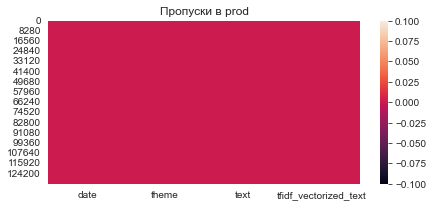

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ prod
plt.figure(figsize=(7, 3))
sns.heatmap(prod.isnull())
plt.title('–ü—Ä–æ–ø—É—Å–∫–∏ –≤ prod')
plt.show()

In [ ]:
pd.Series(prod['theme'].unique())
# themes['theme'].unique()

0      121
1      155
2      124
3      188
4       21
      ... 
224     64
225    123
226    133
227    221
228     29
Length: 229, dtype: object

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –æ–±–æ–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
prod_unique = pd.Series(prod['theme'].unique())
themes_unique = pd.Series(themes['theme'].unique())

# –ù–∞—Ö–æ–¥–∏–º –æ–±—â–∏–µ –∏ –Ω–µ–ø–∞—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
common_values = pd.Series(list(set(prod_unique) & set(themes_unique)))
prod_diff = pd.Series(list(set(prod_unique) - set(common_values)))
themes_diff = pd.Series(list(set(themes_unique) - set(common_values)))

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø–∞—Ä–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
paired_values = pd.DataFrame({
    'prod_theme': common_values.reindex(range(max(len(prod_diff), len(themes_diff)))),
    'themes_theme': common_values.reindex(range(max(len(prod_diff), len(themes_diff))))
})

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–ø–∞—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
paired_values['prod_theme'][len(common_values):] = prod_diff.values
paired_values['themes_theme'][len(common_values):] = themes_diff.values

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
paired_values.to_csv(r'C:\Users\MKW\Downloads\Telegram Desktop\common_themes.csv', sep=';', index=False, encoding='utf-8-sig')

C:\Users\4793788\AppData\Local\Temp\ipykernel_7752\2410444625.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  common_values = pd.Series(list(set(prod_unique) & set(themes_unique)))
C:\Users\4793788\AppData\Local\Temp\ipykernel_7752\2410444625.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paired_values['themes_theme'][len(common_values):] = themes_diff.values


ValueError: cannot set using a slice indexer with a different length than the value

In [ ]:
def merge_lists(prod, themes):
    # –°–æ–∑–¥–∞–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –∏–∑ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —Å–ø–∏—Å–∫–æ–≤
    set_prod = set(prod)
    set_themes = set(themes)

    # –û–±—ä–µ–¥–∏–Ω—è–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –≤—Å–µ—Ö —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤
    unique_elements = set_prod.union(set_themes)

    # –°–æ–∑–¥–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–∏–π —Å–ø–∏—Å–æ–∫
    result = []
    for element in unique_elements:
        # –î–æ–±–∞–≤–ª—è–µ–º –ø–∞—Ä—ã –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–∏–π —Å–ø–∏—Å–æ–∫
        result.append([element if element in set_prod else '', element if element in set_themes else ''])

    return result

print(merge_lists(prod['theme'].unique(), themes['theme'].unique()))

[['', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ, –ø–æ–∫–æ—Å, –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –≥–∞–∑–æ–Ω–æ–≤ / –ü–æ–∫–æ—Å –≥–∞–∑–æ–Ω–∞'], ['', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —Ä–µ–º–æ–Ω—Ç –∏ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ –ø—Ä–∏—é—Ç–æ–≤ –¥–ª—è –±–µ–∑–Ω–∞–¥–∑–æ—Ä–Ω—ã—Ö –∂–∏–≤–æ—Ç–Ω—ã—Ö / –í–æ–ª–æ–Ω—Ç–µ—Ä—ã'], ['108', ''], ['', '–ö–∞–ø–∏—Ç–∞–ª—å–Ω—ã–π —Ä–µ–º–æ–Ω—Ç –ú–ö–î / –†–µ–º–æ–Ω—Ç –±–∞–ª–∫–æ–Ω–æ–≤ –ú–ö–î'], ['', '–ö–æ–Ω—Ç–µ–π–Ω–µ—Ä–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏'], ['110', ''], ['189', ''], ['', '–ö—Ä–∏—Ç–∏–∫–∞ –æ—Ç–≤–µ—Ç–∞'], ['', '–¢–µ—Ö–Ω–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–æ–∂–∞—Ä'], ['', '–¢–µ–ø–ª–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ (—Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ –æ—Ç–æ–ø–ª–µ–Ω–∏–µ) / –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∂–∏–ª–æ–≥–æ —Ñ–æ–Ω–¥–∞ –∫ –æ—Ç–æ–ø–∏—Ç–µ–ª—å–Ω–æ–º—É —Å–µ–∑–æ–Ω—É, –æ–ø—Ä–µ—Å—Å–æ–≤–∫–∞'], ['', '–°–æ—Å—Ç–æ—è–Ω–∏–µ —Ä–µ–∫ / –°–±—Ä–æ—Å—ã '], ['', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –û–û–ü–¢'], ['', '–ü—Ä–∏—Ä–æ–¥–Ω—ã–µ –ß–° / –ü—Ä–æ–≤–∞–ª, —Ä–∞–∑–º—ã—Ç–∏–µ –≥—Ä—É–Ω—Ç–∞'], ['219', ''], ['10', ''], ['71', ''], ['194', ''], ['', '–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ, —É—Å—Ç—Ä–æ

In [ ]:
import csv

result = merge_lists(prod['theme'].unique(), themes['theme'].unique())

# –£–∫–∞–∑—ã–≤–∞–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É
file_path = r'C:\Users\4793788\PycharmProjects\pythonProject2\TextClassifier\common_themes.csv'

# –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤ CSV
with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∫–∞–∂–¥—É—é –ø–∞—Ä—É –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
    for row in result:
        writer.writerow(row)

# –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ —Ñ–∞–π–ª —É—Å–ø–µ—à–Ω–æ –∑–∞–ø–∏—Å–∞–Ω
print("–§–∞–π–ª —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω.")

–§–∞–π–ª —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω.


In [ ]:
set_prod = set(prod_new['theme'].unique())
set_themes = set(themes['theme'].unique())

# –ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è
intersection = set_prod - set_themes

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å–ø–∏—Å–æ–∫, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
result = list(intersection)

k = 110
print(list(intersection))

NameError: name 'prod_new' is not defined

In [ ]:
for i in pd.Series(prod_unique).sort_values():
    print(i)

nan
–ê–¥—Ä–µ—Å–Ω—ã–µ —É–∫–∞–∑–∞—Ç–µ–ª–∏
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ó–∏–º–Ω–∏–µ –≤–∏–¥—ã –æ—Ç–¥—ã—Ö–∞
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ö—Ä—É–ø–Ω—ã–µ –î–¢–ü
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ù–µ—Å—á–∞—Å—Ç–Ω—ã–µ —Å–ª—É—á–∞–∏ —Å —Ä–∞–±–æ—á–∏–º–∏
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –û—Ç–∫—Ä—ã—Ç—ã–µ –∏ —Å–ª–æ–º–∞–Ω–Ω—ã–µ –ª—é–∫–∏
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü–∞–¥–µ–Ω–∏–µ —Å–Ω–µ–≥–∞ –∏ —Å–æ—Å—É–ª–µ–∫
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –ü—Ä–æ–ø–∞–≤—à–∏–µ –Ω–∞ –≤–æ–¥–µ
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –°–ª–æ–º–∞–Ω–Ω—ã–µ –¥–µ—Ç—Å–∫–∏–µ –∏ —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ –ø–ª–æ—â–∞–¥–∫–∏
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –¢–µ—Ä–∞–∫—Ç (–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ)
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–∫–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –£–¥–∞—Ä—ã —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç –æ–±—ä–µ–∫—Ç–æ–≤ –ö–ì–•
–ê–Ω—Ç—Ä–æ–ø–æ–≥–µ–Ω–Ω—ã–µ –ß–° / –Ø–º—ã, –Ω–∞—Ä—É—à–µ–Ω–∏—è –ø–æ–∫—Ä—ã—Ç–∏—è
–ë–∏—Ç—Ü–µ–≤—Å–∫–∏–π –ª–µ—Å
–ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—